# Risk Analytics in banking and financial services

-  ***Minimise the risk of losing money while lending to cistomers***

You have to use EDA to analyse the patterns present in the data. 
This will ensure that the applicants capable of repaying the loan are not rejected.

Two types of risks are associated with the bank’s loan approval decision:

1.  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2.  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions:

-  denying the loan
-  reducing the amount of loan
-  lending (to risky applicants) at a higher interest rate, etc. 

This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study

Need to understand the driving factors (variables) behind loan default i.e. variables which are strong indicators of default.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

In [124]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [126]:
# read application data
app_df = pd.read_csv("application_data.csv")
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
0               Y             0      202500.00000  406597.50000  24700.50000   
1               N             0      270000.00000 1293502.50000  35698.50000   
2               Y             0       67500.00000  135000.00000   6750.00000   
3               Y             0      135000.00000  312682.50000  29686.50000   
4               Y             0      121500.00000  513000.00000  21865.50000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0     351000.00000   Unaccompanied          Working   
1    1129500.00000          Family    State servant   
2     135000.00000   Unaccompanied          Working   
3     297000.00000   Unaccompanied          Working   
4     513000.00000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.01880       -9461           -637        -3648.00000   
1                     0.00354      -16765          -1188        -1186.00000   
2                     0.01003      -19046           -225        -4260.00000   
3                     0.00802      -19005          -3039        -9833.00000   
4                     0.02866      -19932          -3038        -4311.00000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531     26.00000           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers          1.00000   
1                 1           1           0      Core staff          2.00000   
2                 1           1           0        Laborers          1.00000   
3                 1           0           0        Laborers          2.00000   
4                 1           0           0      Core staff          1.00000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2            

In [3]:
# check number of applicants and its attributes in application data
app_df.shape

(307511, 122)

###### data set contains ~300k rows and 122 attributes (columns)

In [4]:
app_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### Data Understanding and Data Cleaning

#### Identify Missing Value and Missing Value Handling

In [5]:
# find null value count % per column in descending order
((app_df.isnull().sum()/app_df.shape[0]) * 100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [127]:
# it is to display all rows
pd.set_option("display.max_rows", None)

In [7]:
((app_df.isnull().sum()/app_df.shape[0]) * 100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

***it is statistically incorrect if we impute >25 - 30% missing data as this method develops reasonable guesses leads to bias statistical analysis because lack of natural variation.***

***In theory, Imputation method would work if missing value % is low.***

***lets drop the columns having >= 40% missing value as "OCCUPATION_TYPE" is at the edge and it is important column to analyse   so we can impute missing value in this column.***

In [128]:
null_perc = ((app_df.isnull().sum()/app_df.shape[0]) * 100).sort_values(ascending=False)

In [129]:
drop_col = null_perc[null_perc >= 40].keys()

In [130]:
drop_col

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [131]:
app_df1 = app_df.drop(drop_col,axis=1)

In [132]:
pd.set_option("display.max_columns", None) # it is to display all columns
app_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
0               Y             0      202500.00000  406597.50000  24700.50000   
1               N             0      270000.00000 1293502.50000  35698.50000   
2               Y             0       67500.00000  135000.00000   6750.00000   
3               Y             0      135000.00000  312682.50000  29686.50000   
4               Y             0      121500.00000  513000.00000  21865.50000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0     351000.00000   Unaccompanied          Working   
1    1129500.00000          Family    State servant   
2     135000.00000   Unaccompanied          Working   
3     297000.00000   Unaccompanied          Working   
4     513000.00000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.01880       -9461           -637        -3648.00000   
1                     0.00354      -16765          -1188        -1186.00000   
2                     0.01003      -19046           -225        -4260.00000   
3                     0.00802      -19005          -3039        -9833.00000   
4                     0.02866      -19932          -3038        -4311.00000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers          1.00000   
1                 1           1           0      Core staff          2.00000   
2                 1           1           0        Laborers          1.00000   
3                 1           0           0        Laborers          2.00000   
4                 1           0           0      Core staff          1.00000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0 

***lets drop those columns does not understand the relevance with loan applicant data e.g. EXT_SOURCE_2 and EXT_SOURCE_3***

In [133]:
app_df1.drop(["EXT_SOURCE_2","EXT_SOURCE_3"],axis=1,inplace=True)

In [134]:
app_df1.shape # after dropping we have 71 columns

(307511, 71)

***There are 20 columns gathering availibity of 20 documets to the lenders so let’s add up all values from FLAG_DOCUMENT* columns into new column that will give count of total document provided out of 20 documents and then drop all those columns as not required analyses independently as name of document is not mapped.***

In [135]:
app_df1['FLAG_ALL_DOCUMENT'] = app_df1.iloc[:,45:65].sum(axis =1)

In [136]:
app_df1.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
              'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
              'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
              'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [137]:
app_df1.shape

(307511, 52)

##### lets find what are the column and its data type to impute missing value

In [138]:
miss_col = pd.DataFrame(((app_df1.isnull().sum()/app_df1.shape[0]) * 100).sort_values(ascending=False))
miss_col.reset_index(level=0,inplace=True)
miss_col.rename(columns={0:"Miss%"},inplace=True)

In [139]:
miss_col[miss_col["Miss%"] > 0]

index    Miss%
0              OCCUPATION_TYPE 31.34555
1   AMT_REQ_CREDIT_BUREAU_YEAR 13.50163
2    AMT_REQ_CREDIT_BUREAU_QRT 13.50163
3    AMT_REQ_CREDIT_BUREAU_MON 13.50163
4   AMT_REQ_CREDIT_BUREAU_WEEK 13.50163
5    AMT_REQ_CREDIT_BUREAU_DAY 13.50163
6   AMT_REQ_CREDIT_BUREAU_HOUR 13.50163
7              NAME_TYPE_SUITE  0.42015
8     OBS_30_CNT_SOCIAL_CIRCLE  0.33202
9     OBS_60_CNT_SOCIAL_CIRCLE  0.33202
10    DEF_60_CNT_SOCIAL_CIRCLE  0.33202
11    DEF_30_CNT_SOCIAL_CIRCLE  0.33202
12             AMT_GOODS_PRICE  0.09040
13                 AMT_ANNUITY  0.00390
14             CNT_FAM_MEMBERS  0.00065
15      DAYS_LAST_PHONE_CHANGE  0.00033

In [140]:
df_dt = pd.DataFrame(app_df1.dtypes)
df_dt.reset_index(level=0,inplace=True)
df_dt.rename(columns={0:"Dtype"},inplace=True)

In [141]:
miss_dt = pd.merge(left=miss_col,right=df_dt,how='inner',on="index")
miss_dt[miss_dt["Miss%"] > 0]

index    Miss%    Dtype
0              OCCUPATION_TYPE 31.34555   object
1   AMT_REQ_CREDIT_BUREAU_YEAR 13.50163  float64
2    AMT_REQ_CREDIT_BUREAU_QRT 13.50163  float64
3    AMT_REQ_CREDIT_BUREAU_MON 13.50163  float64
4   AMT_REQ_CREDIT_BUREAU_WEEK 13.50163  float64
5    AMT_REQ_CREDIT_BUREAU_DAY 13.50163  float64
6   AMT_REQ_CREDIT_BUREAU_HOUR 13.50163  float64
7              NAME_TYPE_SUITE  0.42015   object
8     OBS_30_CNT_SOCIAL_CIRCLE  0.33202  float64
9     OBS_60_CNT_SOCIAL_CIRCLE  0.33202  float64
10    DEF_60_CNT_SOCIAL_CIRCLE  0.33202  float64
11    DEF_30_CNT_SOCIAL_CIRCLE  0.33202  float64
12             AMT_GOODS_PRICE  0.09040  float64
13                 AMT_ANNUITY  0.00390  float64
14             CNT_FAM_MEMBERS  0.00065  float64
15      DAYS_LAST_PHONE_CHANGE  0.00033  float64

#### OCCUPATION_TYPE
***Type of occupation client possess*** 

In [142]:
app_df1.OCCUPATION_TYPE.isnull().sum()

96391

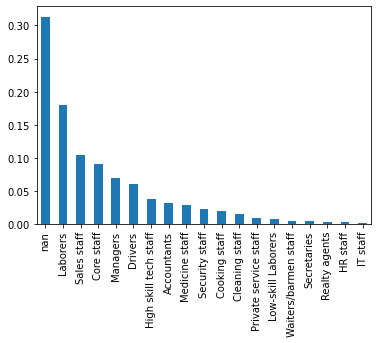

In [143]:
app_df1.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False).plot.bar()
plt.show()

***We cannot impute mode (Laboreres) occupation since imputing 30 % data with ~17 % data does not make sense.  so new category can be created for missing value as it is categorical variable.***

In [144]:
app_df1.OCCUPATION_TYPE.fillna("Missing",inplace=True)

In [145]:
app_df1.OCCUPATION_TYPE.isnull().sum()

0

#### NAME_TYPE_SUITE
***It says does client is accompanied with family members / any other while filling loan application.***

In [146]:
app_df1.NAME_TYPE_SUITE.isnull().sum()

1292

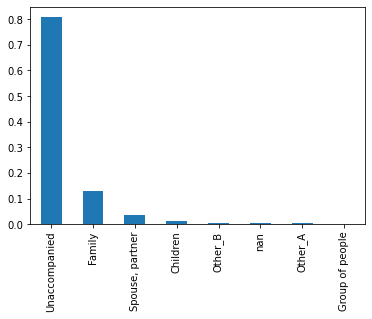

In [147]:
app_df1.NAME_TYPE_SUITE.value_counts(normalize=True,dropna=False).plot.bar()
plt.show()

***Here we can impute mode (Unaccompanied) since imputing 0.42 % data with ~80 % of data does make sense and it is categorical variable also.***

In [148]:
app_df1.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)

In [149]:
app_df1.NAME_TYPE_SUITE.isnull().sum()

0

#### Impute Missing value for Numerical variables

***There are 6 columns starts with AMT_REQ_CREDIT_BUREAU collecting the clients' credit enquiries before loan application in just different time window, hence let’s collect all information in one time window (ultimately 1 coloum)***

In [150]:
app_df1[(app_df1.AMT_REQ_CREDIT_BUREAU_YEAR.isnull()) & (app_df1.AMT_REQ_CREDIT_BUREAU_QRT.isnull()) & 
        (app_df1.AMT_REQ_CREDIT_BUREAU_MON.isnull()) & (app_df1.AMT_REQ_CREDIT_BUREAU_WEEK.isnull()) &
        (app_df1.AMT_REQ_CREDIT_BUREAU_DAY.isnull()) & (app_df1.AMT_REQ_CREDIT_BUREAU_HOUR.isnull())][["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
 "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
dtype: int64

***The same sate of applicants has null value across all above columns and as per the description in data dictionary, it is understood that if we add up all enquiry request count from below variables that will give total enquiries in one year before application.***

In [151]:
app_df1.iloc[:,45:51].head()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0.00000                    0.00000   
1                     0.00000                    0.00000   
2                     0.00000                    0.00000   
3                         NaN                        NaN   
4                     0.00000                    0.00000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                     0.00000                    0.00000   
1                     0.00000                    0.00000   
2                     0.00000                    0.00000   
3                         NaN                        NaN   
4                     0.00000                    0.00000   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                    0.00000                     1.00000  
1                    0.00000                     0.00000  
2                    0.00000                     0.00000  
3                        NaN                         NaN  
4                    0.00000                     0.00000

In [152]:
app_df1['ALL_REQ_CREDIT_BUREAU_YEAR'] = app_df1.iloc[:,45:51].sum(axis =1,skipna = False)

In [153]:

app_df1.drop(["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
        "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"],axis=1,inplace=True)

In [154]:
app_df1.shape

(307511, 47)

In [156]:
app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [157]:
app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.describe()

count   265992.00000
mean         2.48061
std          2.28833
min          0.00000
25%          1.00000
50%          2.00000
75%          4.00000
max        262.00000
Name: ALL_REQ_CREDIT_BUREAU_YEAR, dtype: float64

###### missing value can be imputed with median looking at difference between max and 75 percentile value shows variable has extreme outlier.

In [158]:
app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.fillna(app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.median(),inplace=True)

In [159]:
app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

###### lets impute missing values for following features
-  OBS_30_CNT_SOCIAL_CIRCLE
-  OBS_60_CNT_SOCIAL_CIRCLE
-  DEF_60_CNT_SOCIAL_CIRCLE
-  DEF_30_CNT_SOCIAL_CIRCLE
-  AMT_GOODS_PRICE
-  AMT_ANNUITY
-  CNT_FAM_MEMBERS
-  DAYS_LAST_PHONE_CHANGE


***OBS_30_CNT_SOCIAL_CIRCLE***

It denotes number of clients' observations in social circle / network in last 30 DPD (days past due - it shows the number of days by which you have missed an EMI)

In [161]:
app_df1.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [162]:
app_df1.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.00000
mean         1.42225
std          2.40099
min          0.00000
25%          0.00000
50%          0.00000
75%          2.00000
max        348.00000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

##### missing value can be imputed with median looking at difference between max and 75 percentile value shows variable has extreme outlier.

In [163]:
app_df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df1.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df1.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

***OBS_60_CNT_SOCIAL_CIRCLE***

In [164]:
app_df1.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [165]:
app_df1.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count   306490.00000
mean         1.40529
std          2.37980
min          0.00000
25%          0.00000
50%          0.00000
75%          2.00000
max        344.00000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

##### missing value can be imputed with median looking at difference between max and 75 percentile value shows variable has extreme outlier.

In [166]:
app_df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df1.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df1.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

***DEF_60_CNT_SOCIAL_CIRCLE***

It denotes number of clients' observations in social circle / network in last 30 DPD defaulted (days past due - it shows the number of days by which you have missed an EMI)

In [167]:
app_df1.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [168]:
app_df1.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count   306490.00000
mean         0.10005
std          0.36229
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         24.00000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

###### lets impute missing value with median since the variable has an extreme outlier

In [169]:
app_df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df1.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df1.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

***DEF_30_CNT_SOCIAL_CIRCLE***

In [170]:
app_df1.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [171]:
app_df1.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.00000
mean         0.14342
std          0.44670
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         34.00000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

###### lets impute missing value with median since the variable has an extreme outlier

In [172]:
app_df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df1.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df1.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

***AMT_GOODS_PRICE***

***It is the price of the goods for which the loan is given***

In [173]:
app_df1.AMT_GOODS_PRICE.isnull().sum()

278

In [174]:
app_df1.AMT_GOODS_PRICE.describe()

count    307233.00000
mean     538396.20743
std      369446.46054
min       40500.00000
25%      238500.00000
50%      450000.00000
75%      679500.00000
max     4050000.00000
Name: AMT_GOODS_PRICE, dtype: float64

In [175]:
# lets supress sceintific notation
pd.options.display.float_format = '{:.5f}'.format
app_df1.AMT_GOODS_PRICE.describe()

count    307233.00000
mean     538396.20743
std      369446.46054
min       40500.00000
25%      238500.00000
50%      450000.00000
75%      679500.00000
max     4050000.00000
Name: AMT_GOODS_PRICE, dtype: float64

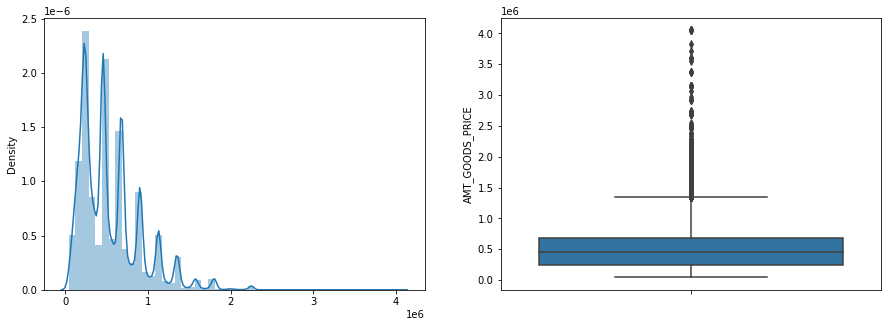

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(x=app_df1.AMT_GOODS_PRICE)
plt.subplot(1,2,2)
sns.boxplot(data=app_df1,y="AMT_GOODS_PRICE")
plt.show()

###### lets impute missing value with median since the variable is not normally distributed and has few outliers

In [176]:
app_df1.AMT_GOODS_PRICE.fillna(app_df1.AMT_GOODS_PRICE.median(),inplace=True)
app_df1.AMT_GOODS_PRICE.isnull().sum()

0

***AMT_ANNUITY***

***It is the amount of loan repayment in installments***

In [177]:
app_df1.AMT_ANNUITY.isnull().sum()

12

In [178]:
app_df1.AMT_ANNUITY.describe()

count   307499.00000
mean     27108.57391
std      14493.73732
min       1615.50000
25%      16524.00000
50%      24903.00000
75%      34596.00000
max     258025.50000
Name: AMT_ANNUITY, dtype: float64

##### lets see distribution as no big difference sees in mean and median 

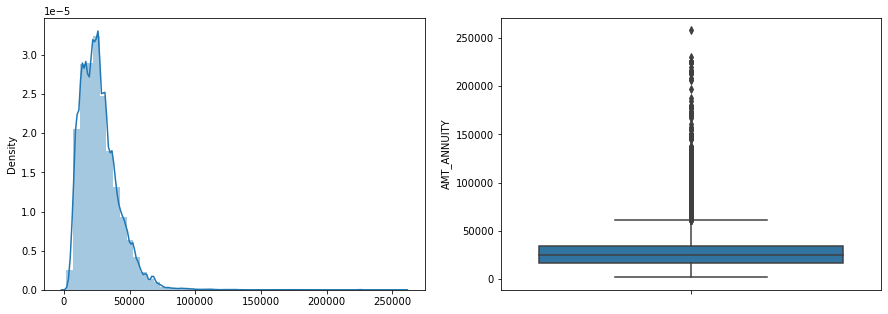

In [585]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(x=app_df1.AMT_ANNUITY)
plt.subplot(1,2,2)
sns.boxplot(data=app_df1,y="AMT_ANNUITY")
plt.show()

###### It has more or less normal distribution , seems skewness just because of few outliers, use median for imputation

In [179]:
app_df1.AMT_ANNUITY.fillna(app_df1.AMT_ANNUITY.median(),inplace=True)
app_df1.AMT_ANNUITY.isnull().sum()

0

***CNT_FAM_MEMBERS***

***The count of family members of client*** 

In [180]:
app_df1.CNT_FAM_MEMBERS.isnull().sum()

2

In [181]:
app_df1.CNT_FAM_MEMBERS.describe()

count   307509.00000
mean         2.15267
std          0.91068
min          1.00000
25%          2.00000
50%          2.00000
75%          3.00000
max         20.00000
Name: CNT_FAM_MEMBERS, dtype: float64

###### no such difference in mean and median however lets impute median since family members shall not be in decimals.

In [182]:
app_df1.CNT_FAM_MEMBERS.fillna(app_df1.CNT_FAM_MEMBERS.median(),inplace=True)
app_df1.CNT_FAM_MEMBERS.isnull().sum()

0

***DAYS_LAST_PHONE_CHANGE***

***How many days before application did client change phone***

In [184]:
app_df1.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [185]:
app_df1.DAYS_LAST_PHONE_CHANGE.describe()

count   307510.00000
mean      -962.85879
std        826.80849
min      -4292.00000
25%      -1570.00000
50%       -757.00000
75%       -274.00000
max          0.00000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

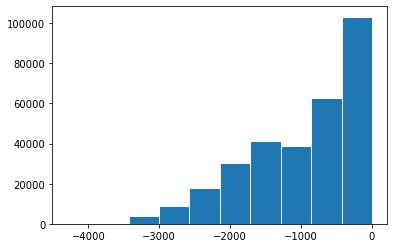

In [186]:
plt.hist(app_df1.DAYS_LAST_PHONE_CHANGE,edgecolor = 'white')
plt.show()

###### the variable has negative values however naturally this shall be positive values so let’s convert to positive numbers first before imputing missing value.

###### lets find any other column has negative numbers?

In [187]:
num_var = pd.DataFrame(app_df1.dtypes[(app_df1.dtypes == "int64") | (app_df1.dtypes == "float64")])
num_var

num_var.reset_index(level=0,inplace=True)
num_var.head()

index        0
0        SK_ID_CURR    int64
1            TARGET    int64
2      CNT_CHILDREN    int64
3  AMT_INCOME_TOTAL  float64
4        AMT_CREDIT  float64

In [188]:
num_var.rename(columns={0:"dtype","index":"col_name"},inplace=True)
num_var.head()

col_name    dtype
0        SK_ID_CURR    int64
1            TARGET    int64
2      CNT_CHILDREN    int64
3  AMT_INCOME_TOTAL  float64
4        AMT_CREDIT  float64

In [189]:
num_var_df = app_df1[num_var.col_name]

In [190]:
num_var_df.columns[(num_var_df < 0).any()]

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

###### all the above columns values can be converted to postive numbers.

In [191]:
app_df1[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE']] = app_df1[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE']].abs()

In [75]:
app_df1.DAYS_LAST_PHONE_CHANGE.describe()

count   307510.00000
mean       962.85879
std        826.80849
min          0.00000
25%        274.00000
50%        757.00000
75%       1570.00000
max       4292.00000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [192]:
app_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
0               Y             0      202500.00000  406597.50000  24700.50000   
1               N             0      270000.00000 1293502.50000  35698.50000   
2               Y             0       67500.00000  135000.00000   6750.00000   
3               Y             0      135000.00000  312682.50000  29686.50000   
4               Y             0      121500.00000  513000.00000  21865.50000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0     351000.00000   Unaccompanied          Working   
1    1129500.00000          Family    State servant   
2     135000.00000   Unaccompanied          Working   
3     297000.00000   Unaccompanied          Working   
4     513000.00000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.01880        9461            637         3648.00000   
1                     0.00354       16765           1188         1186.00000   
2                     0.01003       19046            225         4260.00000   
3                     0.00802       19005           3039         9833.00000   
4                     0.02866       19932           3038         4311.00000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers          1.00000   
1                 1           1           0      Core staff          2.00000   
2                 1           1           0        Laborers          1.00000   
3                 1           0           0        Laborers          2.00000   
4                 1           0           0      Core staff          1.00000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0 

In [193]:
app_df1.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [194]:
app_df1.DAYS_LAST_PHONE_CHANGE.fillna(app_df1.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)
app_df1.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [195]:
app_df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

## Outlier Detection and Handling - Sanity checks
once completed missing value handling tasks, the next step is to analyse outlier and if required to impute with approriate method and ensure that the data 'makes sense'.  
the data needs to be factually correct apart from being of the correct data type.

In [603]:
app_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
0               Y             0      202500.00000  406597.50000  24700.50000   
1               N             0      270000.00000 1293502.50000  35698.50000   
2               Y             0       67500.00000  135000.00000   6750.00000   
3               Y             0      135000.00000  312682.50000  29686.50000   
4               Y             0      121500.00000  513000.00000  21865.50000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0     351000.00000   Unaccompanied          Working   
1    1129500.00000          Family    State servant   
2     135000.00000   Unaccompanied          Working   
3     297000.00000   Unaccompanied          Working   
4     513000.00000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.01880        9461            637         3648.00000   
1                     0.00354       16765           1188         1186.00000   
2                     0.01003       19046            225         4260.00000   
3                     0.00802       19005           3039         9833.00000   
4                     0.02866       19932           3038         4311.00000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers          1.00000   
1                 1           1           0      Core staff          2.00000   
2                 1           1           0        Laborers          1.00000   
3                 1           0           0        Laborers          2.00000   
4                 1           0           0      Core staff          1.00000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0 

### Identify data types correctness

In [80]:
app_df1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

***Following columns' data types shall not be float so lets change to int***

DAYS_REGISTRATION              float64 

CNT_FAM_MEMBERS                float64

OBS_30_CNT_SOCIAL_CIRCLE       float64

DEF_30_CNT_SOCIAL_CIRCLE       float64

OBS_60_CNT_SOCIAL_CIRCLE       float64

DEF_60_CNT_SOCIAL_CIRCLE       float64

DAYS_LAST_PHONE_CHANGE         float64

ALL_REQ_CREDIT_BUREAU_YEAR     float64

In [196]:
app_df1.DAYS_REGISTRATION = app_df1.DAYS_REGISTRATION.astype('int64')
app_df1.CNT_FAM_MEMBERS = app_df1.CNT_FAM_MEMBERS.astype('int64')
app_df1.OBS_30_CNT_SOCIAL_CIRCLE = app_df1.OBS_30_CNT_SOCIAL_CIRCLE.astype('int64')
app_df1.DEF_30_CNT_SOCIAL_CIRCLE = app_df1.DEF_30_CNT_SOCIAL_CIRCLE.astype('int64')
app_df1.OBS_60_CNT_SOCIAL_CIRCLE = app_df1.OBS_60_CNT_SOCIAL_CIRCLE.astype('int64')
app_df1.DEF_60_CNT_SOCIAL_CIRCLE = app_df1.DEF_60_CNT_SOCIAL_CIRCLE.astype('int64')
app_df1.DAYS_LAST_PHONE_CHANGE = app_df1.DAYS_LAST_PHONE_CHANGE.astype('int64')
app_df1.ALL_REQ_CREDIT_BUREAU_YEAR = app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.astype('int64')

In [197]:
app_df1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

### Identify Important Features from the data and categorize into categorical and numerical list

In [198]:
cat_var = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE",
           "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE"]
num_var = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","DAYS_EMPLOYED",
           "CNT_FAM_MEMBERS","ALL_REQ_CREDIT_BUREAU_YEAR"]

###### lets check all unique values from selected categorical varaibles

In [199]:
for i in cat_var:
    print(i,":",app_df1[i].unique())

NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['M' 'F' 'XNA']
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Missing' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staf

In [200]:
app_df1.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [201]:
app_df1[app_df1.CODE_GENDER == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
35657                Y             0      207000.00000 382500.00000   
38566                Y             2      157500.00000 270000.00000   
83382                Y             1      135000.00000 405000.00000   
189640               Y             0      247500.00000 540000.00000   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657   19125.00000     337500.00000   Unaccompanied               Working   
38566   13500.00000     225000.00000          Family               Working   
83382   20250.00000     225000.00000   Unaccompanied               Working   
189640  27000.00000     900000.00000   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                      0.02071       20232          10044   
38566                      0.02639       13717           2797   
83382                      0.03579       10647           1228   
189640                     0.03579        9649           2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657               10024             3537           1               1   
38566                2241             4659           1               1   
83382                 183             1671           1               1   
189640               4099             2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Missing                2                     3   
38566   Low-skill Laborers                4                     2   
83382           Core staff                3                     2   
189640             Missing                2                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0

In [202]:
app_df1.CODE_GENDER.value_counts(normalize=True)*100

F     65.83439
M     34.16431
XNA    0.00130
Name: CODE_GENDER, dtype: float64

##### just 4 entries , so we can treat this is nothing but missing value and impute XNA with mode (i.e. Female here)

In [203]:
app_df1.CODE_GENDER.replace("XNA","F",inplace=True)

In [204]:
app_df1.CODE_GENDER.value_counts(normalize=True)*100

F   65.83569
M   34.16431
Name: CODE_GENDER, dtype: float64

***ORGANIZATION_TYPE***

***Type of organization where client works***

In [205]:
# lets see XNA count
app_df1.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3   22.11043
XNA                      18.00716
Self-employed            12.49126
Other                     5.42517
Medicine                  3.63987
Business Entity Type 2    3.43175
Government                3.38329
School                    2.89193
Trade: type 7             2.54658
Kindergarten              2.23732
Construction              2.18561
Business Entity Type 1    1.94595
Transport: type 4         1.75538
Trade: type 3             1.13557
Industry: type 9          1.09525
Industry: type 3          1.06598
Security                  1.05590
Housing                   0.96192
Industry: type 11         0.87932
Military                  0.85655
Bank                      0.81526
Agriculture               0.79802
Police                    0.76127
Transport: type 2         0.71672
Postal                    0.70144
Security Ministries       0.64193
Trade: type 2             0.61786
Restaurant                0.58892
Services                  0.51218
University    

In [206]:
app_df1[app_df1.ORGANIZATION_TYPE == 'XNA'].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8       100011       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
38      100045       0         Cash loans           F            N   
43      100050       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
8                Y             0      112500.00000 1019610.00000  33826.50000   
11               Y             0       38419.15500  148365.00000  10678.50000   
23               Y             0       83250.00000  239850.00000  23850.00000   
38               Y             0       99000.00000  247275.00000  17338.50000   
43               Y             0      108000.00000  746280.00000  42970.50000   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8      913500.00000        Children        Pensioner   
11     135000.00000        Children        Pensioner   
23     225000.00000   Unaccompanied        Pensioner   
38     225000.00000   Unaccompanied        Pensioner   
43     675000.00000   Unaccompanied        Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8   Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special               Married  House / apartment   
23  Secondary / secondary special               Married  House / apartment   
38  Secondary / secondary special               Married  House / apartment   
43               Higher education  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8                      0.01863       20099         365243               7427   
11                     0.01522       20417         365243               5246   
23                     0.00630       24827         365243               9012   
38                     0.00621       23920         365243               9817   
43                     0.01097       23548         365243               5745   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
8              3514           1               0                0   
11             2512           1               0                0   
23             3684           1               0                0   
38             4969           1               0                0   
43             4576           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
8                  1           0           0         Missing                2   
11                 1           1           0         Missing                2   
23                 1           1           0         Missing                2   
38                 1           1           0         Missing                2   
43                 1           0           0         Missing                1   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
8                      2                            2   
11                     2                            2   
23                     3                            3   
38                     2                            2   
43                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
8                   WEDNESDAY                       14   
11                     FRIDAY                        7   
23                     FRIDAY                       12   
38                     FRIDAY                       11   
43                  WEDNESDAY                        9   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
8                            0                           0   
11                           0                           0   
23                           0     

***it looks like there is some relation between NAME_INCOME_TYPE and ORGANIZATION_TYPE since XNA ties with Pensioner because pensioner does not have organization type in reality.***

***lets explore further to prove the Missing at Random case***

In [207]:
app_df1.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [208]:
app_df1[(app_df1.ORGANIZATION_TYPE == 'XNA') & (app_df1.NAME_INCOME_TYPE == "Pensioner")][["ORGANIZATION_TYPE","NAME_INCOME_TYPE"]].shape

(55352, 2)

***yes,the combination count is almost same so you can impute ORGANIZATION_TYPE XNA with Pensioner***

In [209]:
app_df1.ORGANIZATION_TYPE.replace("XNA","Pensioner",inplace=True)

###### lets check all unique values from selected numerical varaibles

In [210]:
for i in num_var:
    print(i,":",app_df1[i].unique())

CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
DAYS_BIRTH : [ 9461 16765 19046 ...  7951  7857 25061]
DAYS_EMPLOYED : [  637  1188   225 ... 12971 11084  8694]
CNT_FAM_MEMBERS : [ 1  2  3  4  5  6  9  7  8 10 13 14 12 20 15 16 11]
ALL_REQ_CREDIT_BUREAU_YEAR : [  1   0   2   4   5   3   6   7   8   9  10  12  11  14  18  16  15  19
  13  20  17  28  27  23  30  24  21  22 262  31]


###### there are two numerical variables from "num_var" DAYS_BIRTH and DAYS_EMPLOYED has values in days can be converted to years to represnet "Age of applicant" and "Current work experience" respectively.

In [211]:
app_df1["CLIENT_AGE"] = round(app_df1.DAYS_BIRTH/365,0)

In [212]:
app_df1[["DAYS_BIRTH","CLIENT_AGE"]].head()

DAYS_BIRTH  CLIENT_AGE
0        9461    26.00000
1       16765    46.00000
2       19046    52.00000
3       19005    52.00000
4       19932    55.00000

In [213]:
app_df1.CLIENT_AGE = app_df1.CLIENT_AGE.astype('int64')

In [214]:
app_df1[["DAYS_BIRTH","CLIENT_AGE"]].head()

DAYS_BIRTH  CLIENT_AGE
0        9461          26
1       16765          46
2       19046          52
3       19005          52
4       19932          55

In [215]:
app_df1["CLIENT_CURR_WORK_EXP"] = round(app_df1.DAYS_EMPLOYED/365,0)

In [216]:
app_df1[["DAYS_EMPLOYED","CLIENT_CURR_WORK_EXP"]].head()

DAYS_EMPLOYED  CLIENT_CURR_WORK_EXP
0            637               2.00000
1           1188               3.00000
2            225               1.00000
3           3039               8.00000
4           3038               8.00000

In [217]:
app_df1.CLIENT_CURR_WORK_EXP = app_df1.CLIENT_CURR_WORK_EXP.astype('int64')

In [218]:
app_df1[["DAYS_EMPLOYED","CLIENT_CURR_WORK_EXP"]].head()

DAYS_EMPLOYED  CLIENT_CURR_WORK_EXP
0            637                     2
1           1188                     3
2            225                     1
3           3039                     8
4           3038                     8

In [219]:
app_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
0               Y             0      202500.00000  406597.50000  24700.50000   
1               N             0      270000.00000 1293502.50000  35698.50000   
2               Y             0       67500.00000  135000.00000   6750.00000   
3               Y             0      135000.00000  312682.50000  29686.50000   
4               Y             0      121500.00000  513000.00000  21865.50000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0     351000.00000   Unaccompanied          Working   
1    1129500.00000          Family    State servant   
2     135000.00000   Unaccompanied          Working   
3     297000.00000   Unaccompanied          Working   
4     513000.00000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.01880        9461            637               3648   
1                     0.00354       16765           1188               1186   
2                     0.01003       19046            225               4260   
3                     0.00802       19005           3039               9833   
4                     0.02866       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0 

***lets drop DAYS_BIRTH and DAYS_EMPLOYED column as not needed now***

In [220]:
app_df1.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis =1,inplace = True)

In [221]:
app_df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCI

In [222]:
num_var = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","CLIENT_AGE","CLIENT_CURR_WORK_EXP",
           "CNT_FAM_MEMBERS","ALL_REQ_CREDIT_BUREAU_YEAR"]

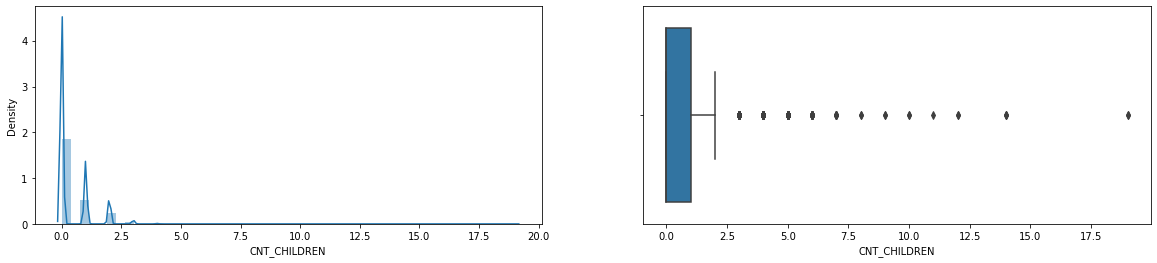

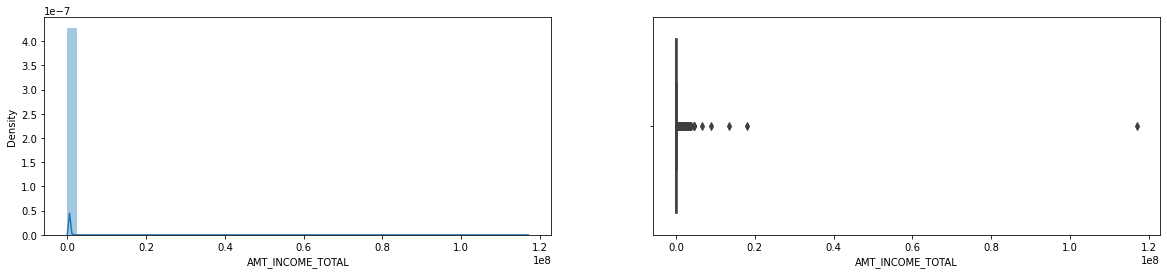

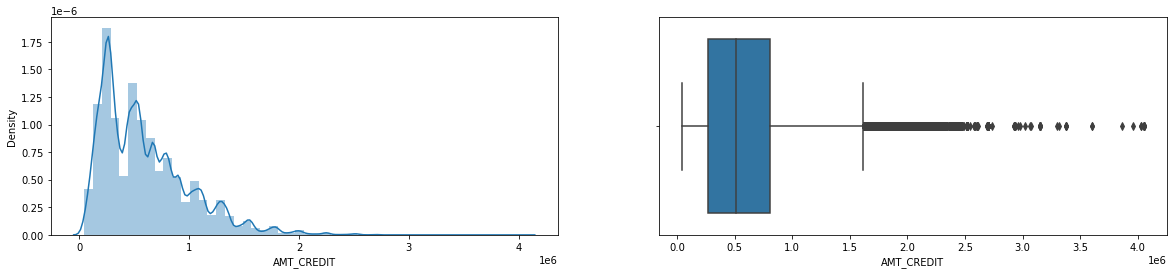

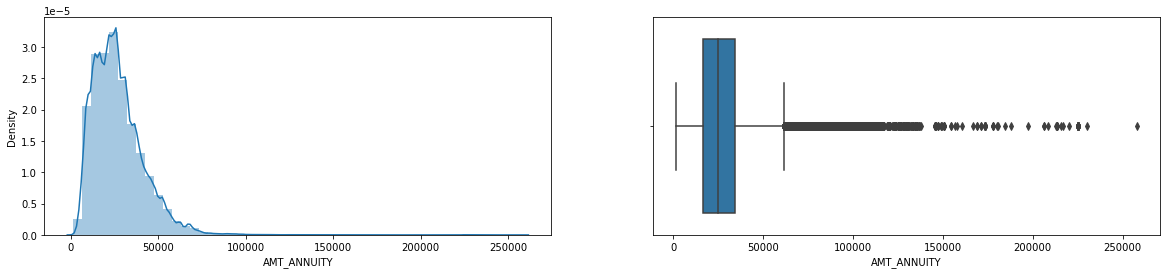

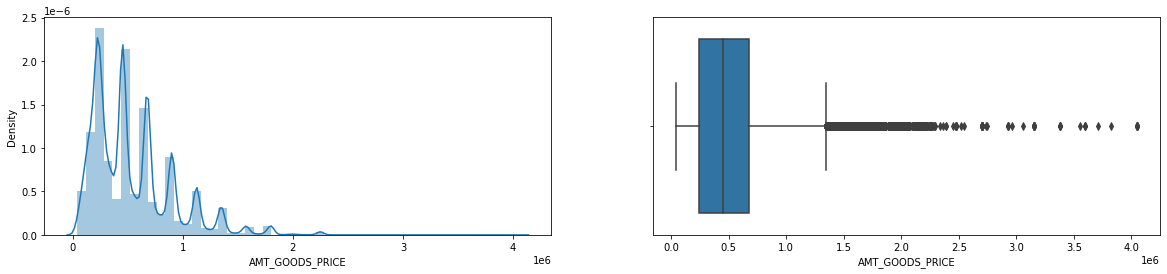

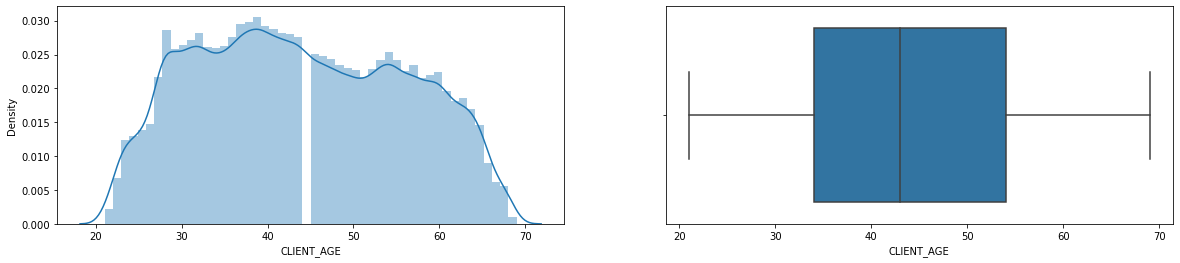

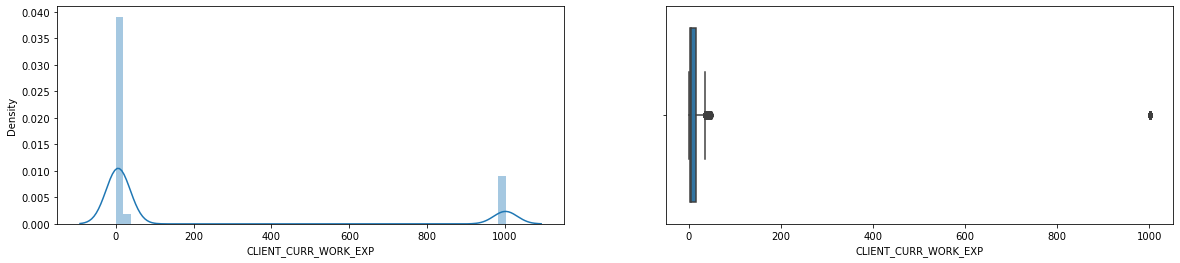

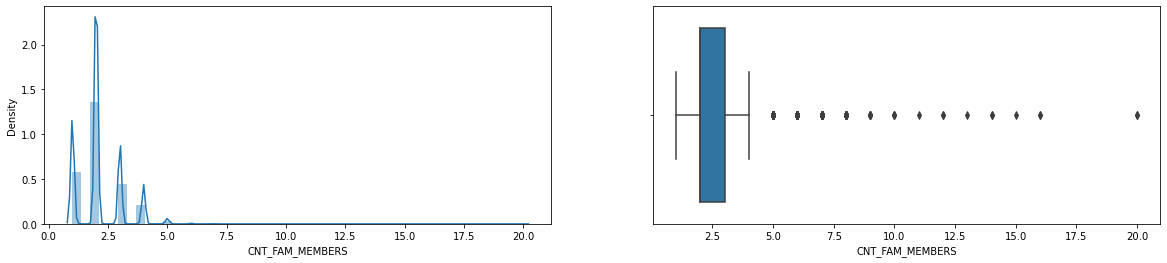

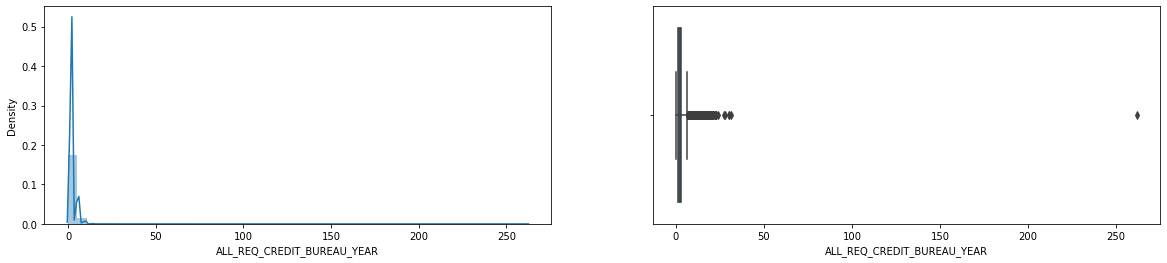

In [223]:
for i in num_var:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.distplot(app_df1[i])
    plt.subplot(1,2,2)
    sns.boxplot(app_df1[i])
    plt.show()

-  ***All above variables have outliers as clearly seen in the box plots that there are data points lies beyond upper whiskers.***

-  ***There are few variables like CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_ANNUITY, CLIENT_CURR_WORK_EXP, CNT_FAM_MEMBERS, ALL_REQ_CREDIT_BUREAU_YEAR having extreme point outliers (very far away from upper limit) causes unnatural skewed distribution.***

-  ***AMT_GOODS_PRICE, AMT_ANNUITY and AMT_CREDIT variables have outliers however they look like natural spread (all data points tightly connecting to each other with upper limit data points)***

###### Handling outlier for CNT_CHILDREN as naturally its very rare having more that 17 children in one family

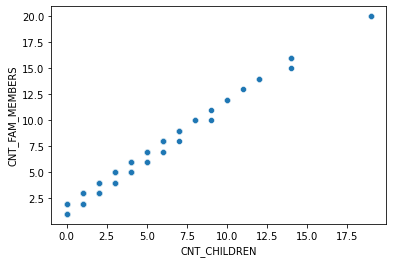

In [224]:
sns.scatterplot(data=app_df1,x="CNT_CHILDREN",y="CNT_FAM_MEMBERS")
plt.show()

In [225]:
app_df1.CNT_CHILDREN.describe()

count   307511.00000
mean         0.41705
std          0.72212
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max         19.00000
Name: CNT_CHILDREN, dtype: float64

In [226]:
# IQR
p75 = app_df1.CNT_CHILDREN.quantile(0.75)
p25 = app_df1.CNT_CHILDREN.quantile(0.25)
p50 = app_df1.CNT_CHILDREN.quantile(0.50)
IQR = p75 - p25
#upper limit
up_lmt = p75 + (1.5 * IQR)
print(up_lmt)
print(p50)
# imputing with median becasue upper limit is in float and count of children should not be in float.
app_df1.CNT_CHILDREN = np.where(app_df1.CNT_CHILDREN > up_lmt,int(p50),app_df1.CNT_CHILDREN)

2.5
0.0


In [227]:
app_df1.CNT_CHILDREN.describe()

count   307511.00000
mean         0.37272
std          0.63857
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          2.00000
Name: CNT_CHILDREN, dtype: float64

###### Handling outlier for CNT_FAM_MEMBERS as naturally its very rare having more that 17 members in familiy and scatter plot shows that this is may be because of CNT_CHILDREN variable

In [228]:
app_df1.CNT_FAM_MEMBERS.describe()

count   307511.00000
mean         2.15266
std          0.91068
min          1.00000
25%          2.00000
50%          2.00000
75%          3.00000
max         20.00000
Name: CNT_FAM_MEMBERS, dtype: float64

In [229]:
# IQR
p75 = app_df1.CNT_FAM_MEMBERS.quantile(0.75)
p25 = app_df1.CNT_FAM_MEMBERS.quantile(0.25)
p50 = app_df1.CNT_FAM_MEMBERS.quantile(0.50)
IQR = p75 - p25
#upper limit
up_lmt = p75 + (1.5 * IQR)
print(up_lmt)
print(p50)
# imputing with median becasue upper limit is in float and count of family members should not be in float.
app_df1.CNT_FAM_MEMBERS = np.where(app_df1.CNT_FAM_MEMBERS > up_lmt,int(p50),app_df1.CNT_FAM_MEMBERS)

4.5
2.0


In [230]:
app_df1.CNT_FAM_MEMBERS.describe()

count   307511.00000
mean         2.11105
std          0.83702
min          1.00000
25%          2.00000
50%          2.00000
75%          3.00000
max          4.00000
Name: CNT_FAM_MEMBERS, dtype: float64

In [231]:
app_df1.CLIENT_CURR_WORK_EXP.describe()

count   307511.00000
mean       185.60802
std        382.16589
min          0.00000
25%          3.00000
50%          6.00000
75%         16.00000
max       1001.00000
Name: CLIENT_CURR_WORK_EXP, dtype: float64

###### Handling outlier for CLIENT_CURR_WORK_EXP 
***1000 years of experience is not natural so imput this outlier with median value as the distribution is not normal.***

In [232]:
exp_max = app_df1.CLIENT_CURR_WORK_EXP.max()
exp_median = app_df1.CLIENT_CURR_WORK_EXP.median()
print(exp_max)
print(exp_median)

app_df1.CLIENT_CURR_WORK_EXP = np.where(app_df1.CLIENT_CURR_WORK_EXP == exp_max,int(exp_median),app_df1.CLIENT_CURR_WORK_EXP)

1001
6.0


In [234]:
app_df1.CLIENT_CURR_WORK_EXP.describe()

count   307511.00000
mean         6.43677
std          5.80929
min          0.00000
25%          3.00000
50%          6.00000
75%          8.00000
max         49.00000
Name: CLIENT_CURR_WORK_EXP, dtype: float64

In [235]:
app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.describe()

count   307511.00000
mean         2.41572
std          2.13458
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max        262.00000
Name: ALL_REQ_CREDIT_BUREAU_YEAR, dtype: float64

###### 262 credit beuro enquiry requests in one year is also doubtfull so lets imput this one with median as the distribution is not normal

In [236]:
cb_max = app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.max()
cb_median = app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.median()
print(cb_max)
print(cb_median)

app_df1.ALL_REQ_CREDIT_BUREAU_YEAR = np.where(app_df1.ALL_REQ_CREDIT_BUREAU_YEAR == cb_max,int(cb_median),app_df1.ALL_REQ_CREDIT_BUREAU_YEAR)

262
2.0


In [240]:
app_df1.ALL_REQ_CREDIT_BUREAU_YEAR.describe()

count   307511.00000
mean         2.41487
std          2.08262
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max         31.00000
Name: ALL_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [241]:
app_df1.AMT_INCOME_TOTAL.describe()

count      307511.00000
mean       168797.91930
std        237123.14628
min         25650.00000
25%        112500.00000
50%        147150.00000
75%        202500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

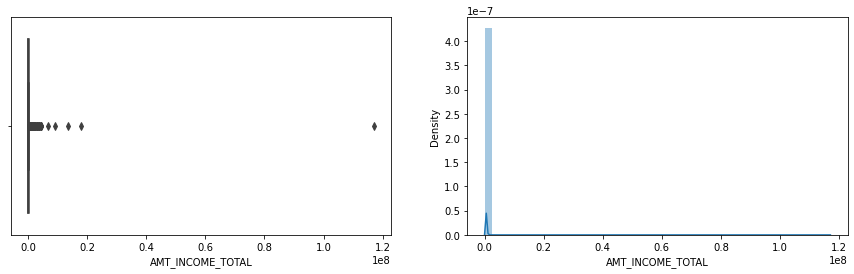

In [242]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x=app_df1.AMT_INCOME_TOTAL)
plt.subplot(1,2,2)
sns.distplot(app_df1.AMT_INCOME_TOTAL)
plt.show()

###### this variable has extreme outliers, becasue of this cannot get any insight from distribution plot so lets see for which occupation the oulier exist as income mostly related to occupation type.

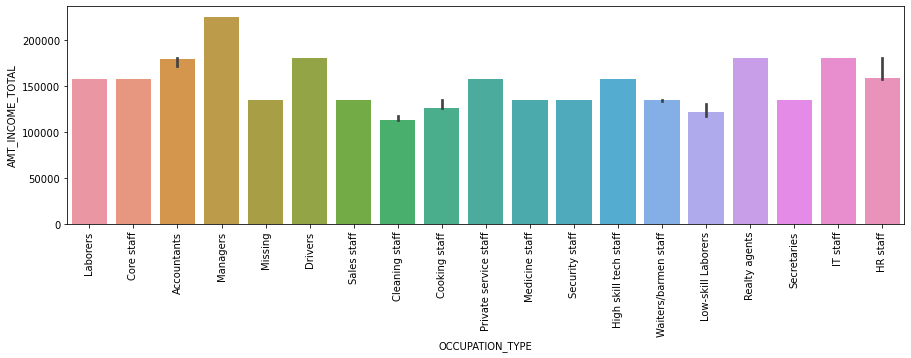

In [244]:
plt.figure(figsize=(15,4))
sns.barplot(data=app_df1,x="OCCUPATION_TYPE",y="AMT_INCOME_TOTAL",estimator=np.median)
plt.xticks(rotation = 90)
plt.show()

###### median income varies across occupation type - managers having highest income whereas cleaning staff in low income group so lets see outlier in income per occupation type and handle per occupation type.

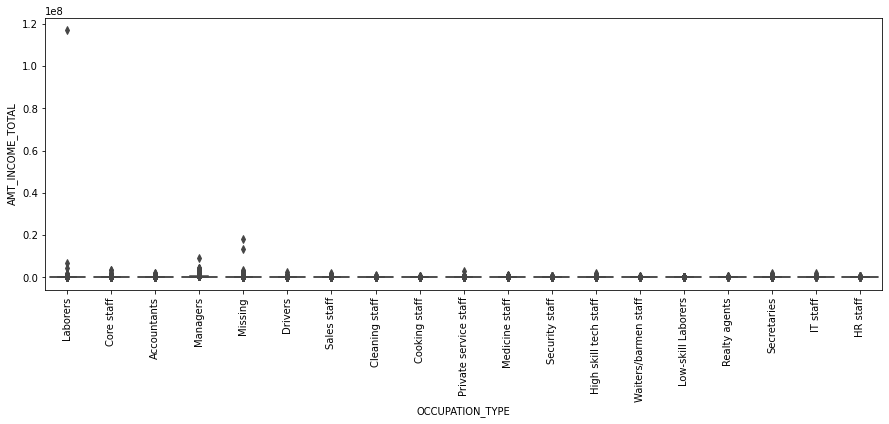

In [245]:
plt.figure(figsize=(15,5))
sns.boxplot(data=app_df1,x="OCCUPATION_TYPE",y="AMT_INCOME_TOTAL")
plt.xticks(rotation = 90)
plt.show()

In [246]:
occ_lst = app_df1.OCCUPATION_TYPE.unique()

In [247]:
occ_lst

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Missing',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

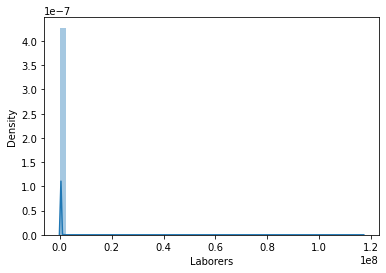

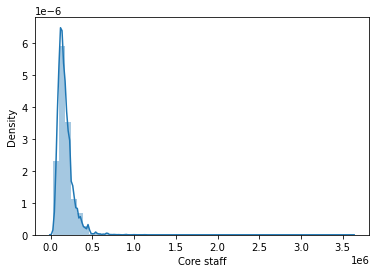

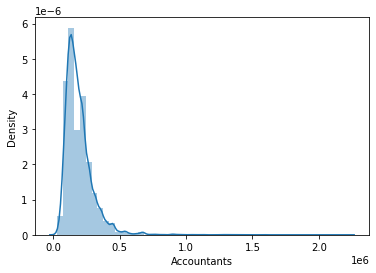

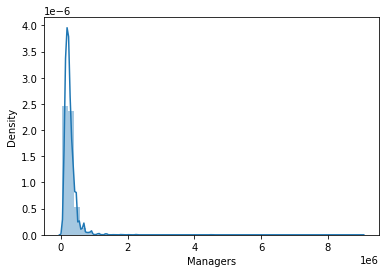

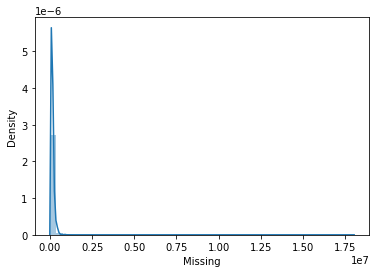

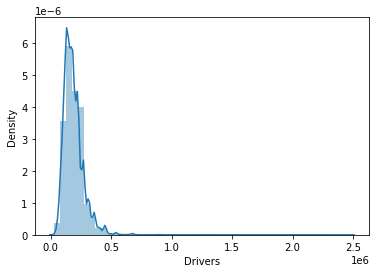

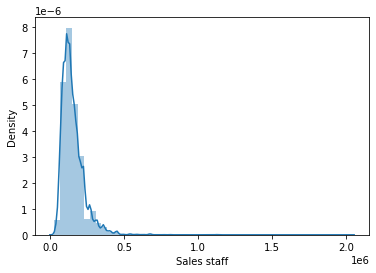

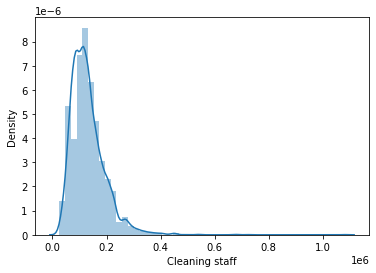

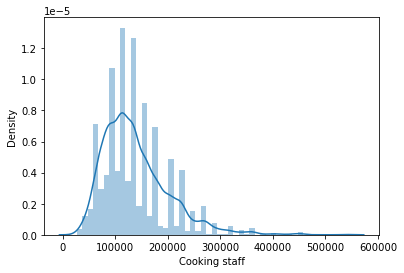

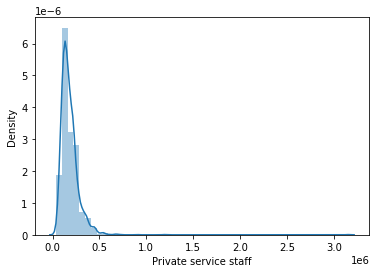

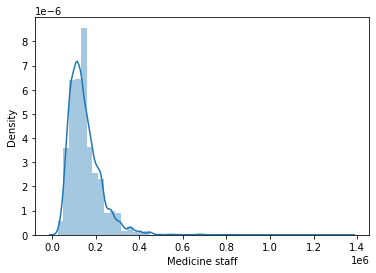

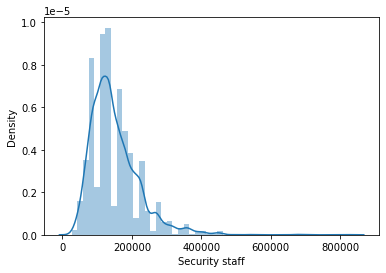

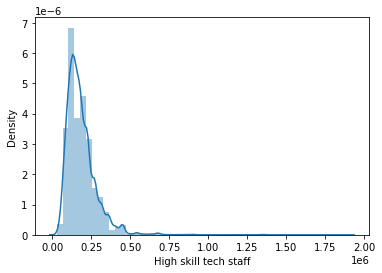

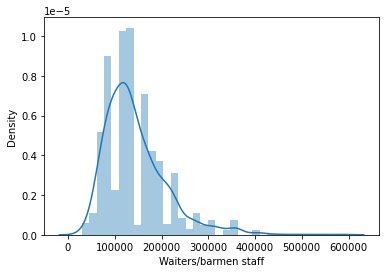

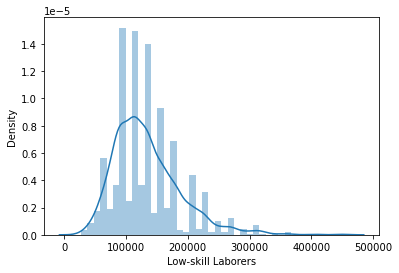

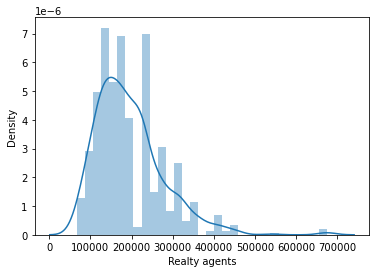

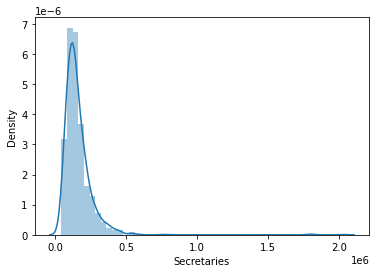

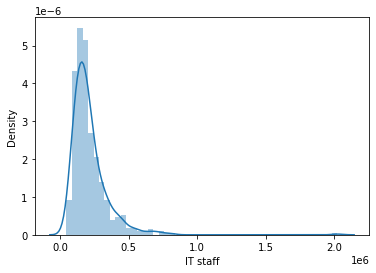

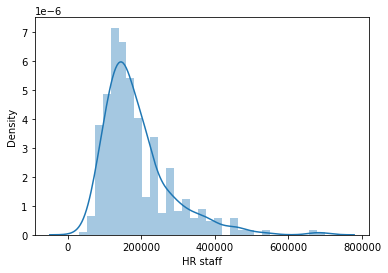

In [248]:
occ_lst
for i in occ_lst:
    sns.distplot(app_df1[app_df1.OCCUPATION_TYPE == i].AMT_INCOME_TOTAL)
    plt.xlabel(i)
    plt.show()
    

###### distribution of income variable is skewed for all occupation types so imput outlier by using IQR method

#### Outlier capping with upper limit

In [250]:
app_df2 = app_df1.copy()

In [251]:
# IQR and upper_liimit for Laborers


for i in occ_lst:
    p75 = app_df2[app_df2.OCCUPATION_TYPE == i].AMT_INCOME_TOTAL.quantile(0.75)
    p25 = app_df2[app_df2.OCCUPATION_TYPE == i].AMT_INCOME_TOTAL.quantile(0.25)
    p50 = app_df2[app_df2.OCCUPATION_TYPE == i].AMT_INCOME_TOTAL.quantile(0.50)
    iqr = p75 - p25

#upper_liimit
    up_lmt = p75 + (1.5 * iqr)
#lower_limit
    low_lmt = p25 - (1.5 * iqr)

    app_df2.AMT_INCOME_TOTAL = np.where((app_df2.AMT_INCOME_TOTAL > up_lmt) & (app_df2.OCCUPATION_TYPE == i ),up_lmt,
                                        np.where((app_df2.AMT_INCOME_TOTAL < low_lmt) & (app_df2.OCCUPATION_TYPE == i ),low_lmt,app_df2.AMT_INCOME_TOTAL
                                                ))

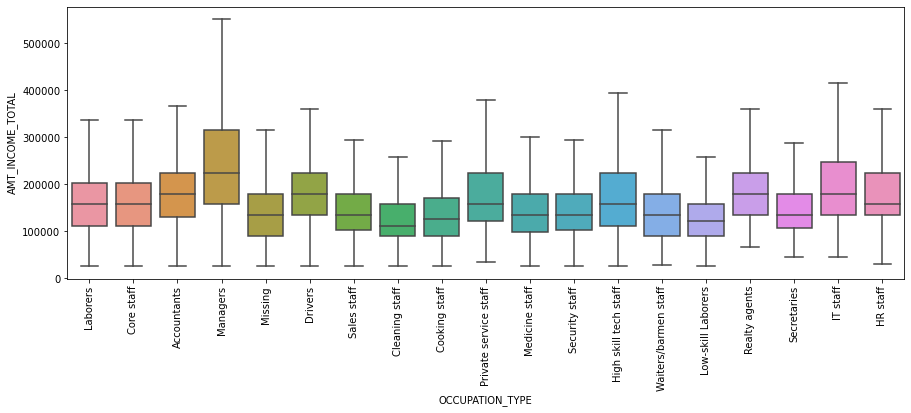

In [252]:
plt.figure(figsize=(15,5))
sns.boxplot(data=app_df2,x="OCCUPATION_TYPE",y="AMT_INCOME_TOTAL")
plt.xticks(rotation = 90)
plt.show()

## Identify if there is data imbalance in the data. Find the ratio of data imbalance.

#### lets find distribution of target variable

As per data dictionary:

Target

-  1 - client with payment difficulties (defaulter)  
-  0 - all other cases (repayer)

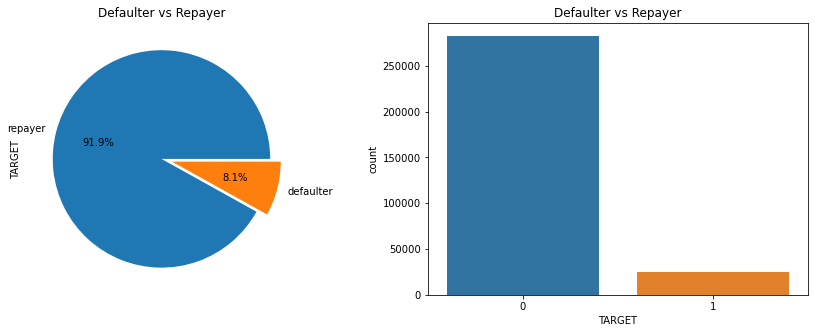

In [649]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
explode = (0,0.1)
app_df2.TARGET.value_counts().plot.pie(labels = ["repayer","defaulter"],autopct = "%1.1f%%",explode = explode)
plt.title("Defaulter vs Repayer",loc="center")
plt.subplot(1,2,2)
sns.countplot(x=app_df2.TARGET)
plt.title("Defaulter vs Repayer",loc="center")
plt.show()

In [804]:
# imbalance ratio - majority class vs minority class
IR = round(len(app_df2[app_df2.TARGET == 0]) / len(app_df2[app_df2.TARGET == 1]),2)
IR

11.39

#### it seems only 8.1 % applicants are having difficulties in repayment and imbalance ratio is 11.39 - every single defaulter there is 11 non-defaulter

## Univariate Analysis

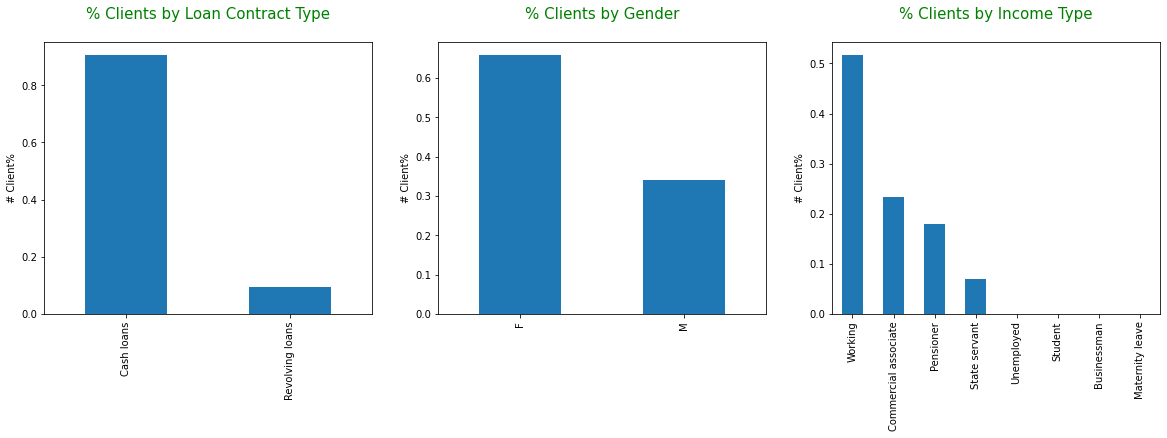

In [253]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
app_df2.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.ylabel("# Client%")
plt.title("% Clients by Loan Contract Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,3,2)
app_df2.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.ylabel("# Client%")
plt.title("% Clients by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,3,3)
app_df2.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.ylabel("# Client%")
plt.title("% Clients by Income Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

***~85% clients goes for cash loan compared to revolving loan.***

***~65 of clients are female taken a loan.*** 

***~50% of clients are working professionals taken a loan.***

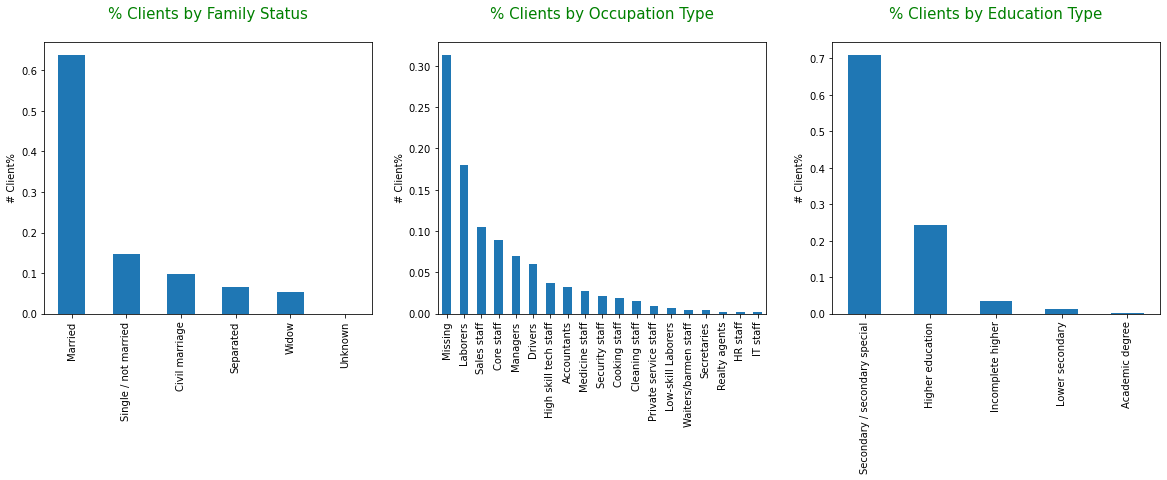

In [254]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
app_df2.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.ylabel("# Client%")
plt.title("% Clients by Family Status\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,3,2)
app_df2.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.ylabel("# Client%")
plt.title("% Clients by Occupation Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,3,3)
app_df2.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.ylabel("# Client%")
plt.title("% Clients by Education Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

***It is observed that Married clients are prone to the loans compare to widow and separated.***

***~30% of clients’ occupation is missing taken loan.***  

***~70% of clients are secondary educated taken loan.***

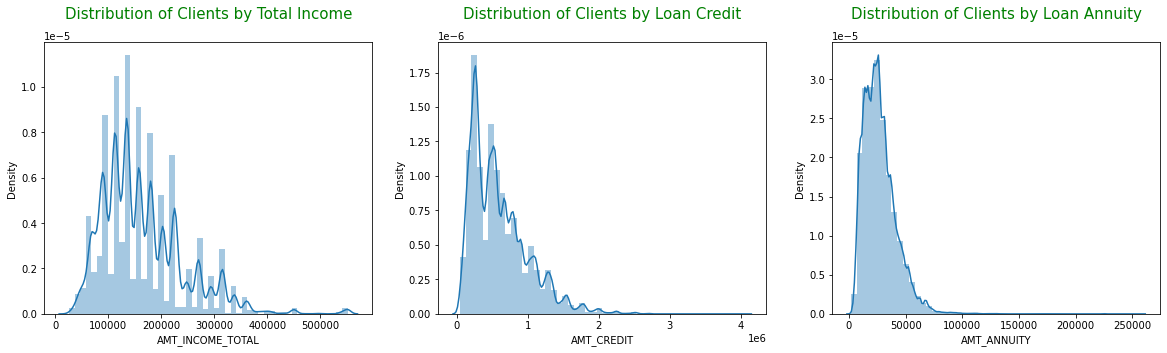

In [658]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(app_df2.AMT_INCOME_TOTAL)
plt.title("Distribution of Clients by Total Income\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,3,2)
sns.distplot(app_df2.AMT_CREDIT)
plt.title("Distribution of Clients by Loan Credit\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,3,3)
sns.distplot(app_df2.AMT_ANNUITY)
plt.title("Distribution of Clients by Loan Annuity\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

***Clients with income ranging from 100k to 200k prone to loan.***

***Distribution in loan credit is normal except few extreme anomalies and loan credit is ranging from 1 millions to 1.5 millions.***

***Loan repayment installment amount is ranging from 20k to 50k.***

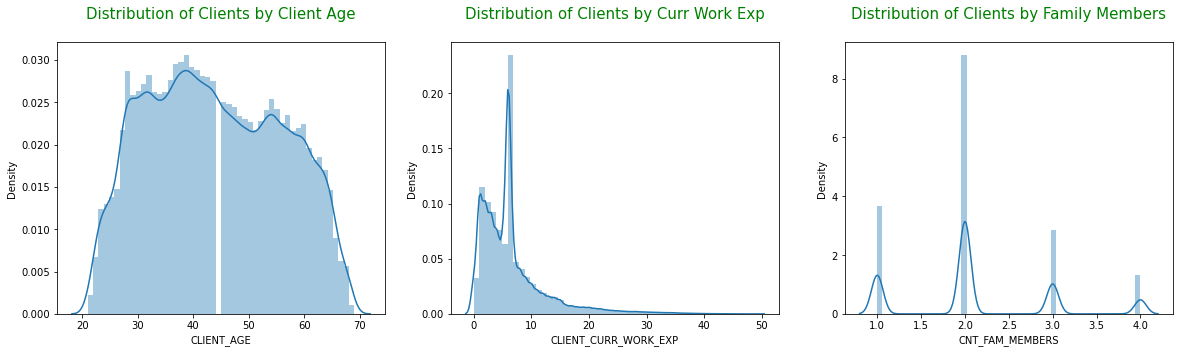

In [255]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(app_df2.CLIENT_AGE)
plt.title("Distribution of Clients by Client Age\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,3,2)
sns.distplot(app_df2.CLIENT_CURR_WORK_EXP)
plt.title("Distribution of Clients by Curr Work Exp\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,3,3)
sns.distplot(app_df2.CNT_FAM_MEMBERS)
plt.title("Distribution of Clients by Family Members\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

***I can see client age is normally distributed however the age group 30 to 50 is highly tending towards loan.***

***Distribution of family members are kind of multimodal, majority of clients having 2 members in family.***

***Clients with 5-10 years of experience are taken loan in majority.***

## Segmented Analysis w.r.t to the target variable

In [256]:
def_df = app_df2[app_df1.TARGET == 1]
rpy_df = app_df2[app_df1.TARGET == 0]

In [257]:
def_df.describe()

SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  24825.00000 24825.00000   24825.00000       24825.00000   24825.00000   
mean  277449.16794     1.00000       0.40765      157917.56701  557778.52767   
std   102383.12346     0.00000       0.65532       72222.48255  346433.23565   
min   100002.00000     1.00000       0.00000       25650.00000   45000.00000   
25%   189555.00000     1.00000       0.00000      112500.00000  284400.00000   
50%   276291.00000     1.00000       0.00000      135000.00000  497520.00000   
75%   366050.00000     1.00000       1.00000      202500.00000  733315.50000   
max   456254.00000     1.00000       2.00000      551250.00000 4027680.00000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  24825.00000      24825.00000                 24825.00000   
mean   26481.74429     488939.44495                     0.01913   
std    12450.67700     311506.71272                     0.01190   
min     2722.50000      45000.00000                     0.00053   
25%    17361.00000     238500.00000                     0.00963   
50%    25263.00000     450000.00000                     0.01863   
75%    32976.00000     675000.00000                     0.02516   
max   149211.00000    3600000.00000                     0.07251   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count        24825.00000      24825.00000 24825.00000     24825.00000   
mean          4487.12701       2732.09962     1.00000         0.87952   
std           3299.65024       1516.97531     0.00000         0.32553   
min              0.00000          0.00000     1.00000         0.00000   
25%           1671.00000       1392.00000     1.00000         1.00000   
50%           4056.00000       2797.00000     1.00000         1.00000   
75%           6646.00000       4119.00000     1.00000         1.00000   
max          22928.00000       6207.00000     1.00000         1.00000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
count      24825.00000       24825.00000 24825.00000 24825.00000   
mean           0.23782           0.99819     0.24495     0.05535   
std            0.42576           0.04254     0.43007     0.22866   
min            0.00000           0.00000     0.00000     0.00000   
25%            0.00000           1.00000     0.00000     0.00000   
50%            0.00000           1.00000     0.00000     0.00000   
75%            0.00000           1.00000     0.00000     0.00000   
max            1.00000           1.00000     1.00000     1.00000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count      24825.00000           24825.00000                  24825.00000   
mean           2.12910               2.15364                      2.13482   
std            0.86125               0.50505                      0.49991   
min            1.00000               1.00000                      1.00000   
25%            2.00000               2.00000                      2.00000   
50%            2.00000               2.00000                      2.00000   
75%            3.00000               2.00000                      2.00000   
max            4.00000               3.00000                      3.00000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count              24825.00000                 24825.00000   
mean                  11.79710                     0.01744   
std                    3.28430                     0.13091   
min                    0.00000                     0.00000   
25%                   10.00000                     0.00000   
50%                   12.00000                     0.00000   
75%                   14.00000                     0.00000   
max                   23.00000                     1.00000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                 24825.00000                  24825.00000   
mean                      0

In [258]:
rpy_df.describe()

SK_ID_CURR       TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count 282686.00000 282686.00000  282686.00000      282686.00000  282686.00000   
mean  278244.74454      0.00000       0.36966      164306.35595  602648.28200   
std   102825.77695      0.00000       0.63699       78172.61344  406845.90771   
min   100003.00000      0.00000       0.00000       25650.00000   45000.00000   
25%   189103.25000      0.00000       0.00000      112500.00000  270000.00000   
50%   278362.50000      0.00000       0.00000      148500.00000  517788.00000   
75%   367241.50000      0.00000       1.00000      202500.00000  810000.00000   
max   456255.00000      0.00000       2.00000      551250.00000 4050000.00000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count 282686.00000     282686.00000                282686.00000   
mean   27163.52739     542652.48465                     0.02102   
std    14658.00345     373625.99729                     0.01398   
min     1615.50000      40500.00000                     0.00029   
25%    16456.50000     238500.00000                     0.01001   
50%    24876.00000     450000.00000                     0.01885   
75%    34749.00000     685002.37500                     0.02866   
max   258025.50000    4050000.00000                     0.07251   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   FLAG_MOBIL  FLAG_EMP_PHONE  \
count       282686.00000     282686.00000 282686.00000    282686.00000   
mean          5029.94107       3017.21979      1.00000         0.81465   
std           3538.46448       1506.61409      0.00188         0.38858   
min              0.00000          0.00000      0.00000         0.00000   
25%           2045.00000       1755.00000      1.00000         1.00000   
50%           4544.00000       3295.00000      1.00000         1.00000   
75%           7550.00000       4313.00000      1.00000         1.00000   
max          24672.00000       7197.00000      1.00000         1.00000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE   FLAG_PHONE   FLAG_EMAIL  \
count     282686.00000      282686.00000 282686.00000 282686.00000   
mean           0.19599           0.99813      0.28424      0.05684   
std            0.39696           0.04322      0.45105      0.23154   
min            0.00000           0.00000      0.00000      0.00000   
25%            0.00000           1.00000      0.00000      0.00000   
50%            0.00000           1.00000      0.00000      0.00000   
75%            0.00000           1.00000      1.00000      0.00000   
max            1.00000           1.00000      1.00000      1.00000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     282686.00000          282686.00000                 282686.00000   
mean           2.10946               2.04358                      2.02245   
std            0.83485               0.50842                      0.50197   
min            1.00000               1.00000                      1.00000   
25%            2.00000               2.00000                      2.00000   
50%            2.00000               2.00000                      2.00000   
75%            2.00000               2.00000                      2.00000   
max            4.00000               3.00000                      3.00000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             282686.00000                282686.00000   
mean                  12.08681                     0.01494   
std                    3.26317                     0.12132   
min                    0.00000                     0.00000   
25%                   10.00000                     0.00000   
50%                   12.00000                     0.00000   
75%                   14.00000                     0.00000   
max                   23.00000                     1.00000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                282686.00000                 282686.

In [259]:
def_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
0                Y             0      202500.00000  406597.50000  24700.50000   
26               Y             0      112500.00000  979992.00000  27076.50000   
40               Y             0      202500.00000 1193580.00000  35028.00000   
42               N             0      135000.00000  288873.00000  16258.50000   
81               Y             0       81000.00000  252000.00000  14593.50000   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0      351000.00000   Unaccompanied               Working   
26     702000.00000   Unaccompanied               Working   
40     855000.00000   Unaccompanied  Commercial associate   
42     238500.00000   Unaccompanied               Working   
81     252000.00000   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                      0.01880               3648             2120   
26                     0.01803               6573             1827   
40                     0.02516               1182             1029   
42                     0.00730                 45             4409   
81                     0.02866               5391             4199   

    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0            1               1                0                 1           1   
26           1               1                0                 1           0   
40           1               1                0                 1           0   
42           1               1                1                 1           1   
81           1               0                0                 1           0   

    FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            0        Laborers                1                     2   
26           0   Cooking staff                1                     3   
40           0        Laborers                2                     2   
42           0     Sales staff                2                     3   
81           0         Missing                2                     2   

    REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                             2                  WEDNESDAY   
26                            2                     MONDAY   
40                            2                    TUESDAY   
42                            3                   THURSDAY   
81                            2                   THURSDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0

In [260]:
rpy_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
1               N             0      270000.00000 1293502.50000  35698.50000   
2               Y             0       67500.00000  135000.00000   6750.00000   
3               Y             0      135000.00000  312682.50000  29686.50000   
4               Y             0      121500.00000  513000.00000  21865.50000   
5               Y             0       99000.00000  490495.50000  27517.50000   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1    1129500.00000           Family    State servant   
2     135000.00000    Unaccompanied          Working   
3     297000.00000    Unaccompanied          Working   
4     513000.00000    Unaccompanied          Working   
5     454500.00000  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
1                     0.00354               1186              291           1   
2                     0.01003               4260             2531           1   
3                     0.00802               9833             2437           1   
4                     0.02866               4311             3458           1   
5                     0.03579               4970              477           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   
5               1                1                 1           1           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1      Core staff                2                     1   
2        Laborers                1                     2   
3        Laborers                2                     2   
4      Core staff                1                     2   
5        Laborers                2                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   
5                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4             

### Segmented Univariate Analysis of categorical variable

In [262]:
cat_var_pi = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY"]

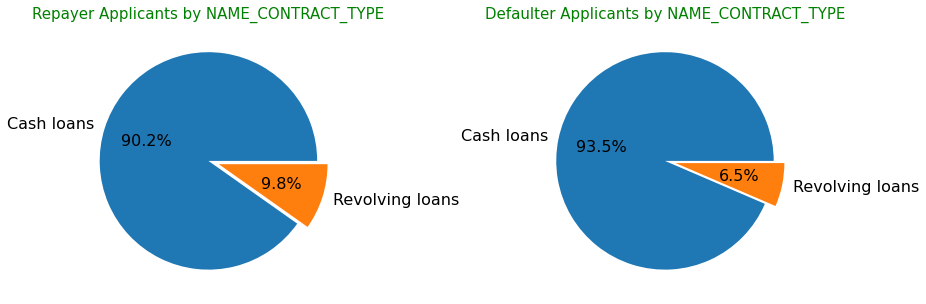

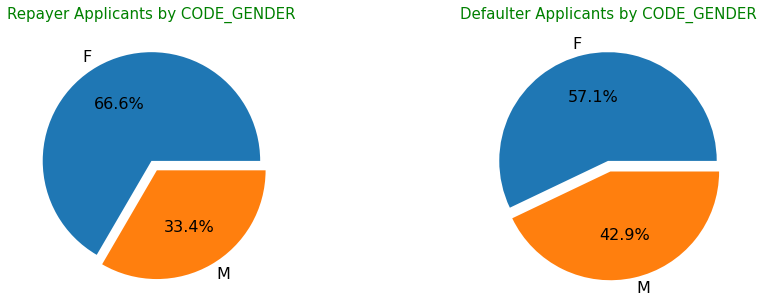

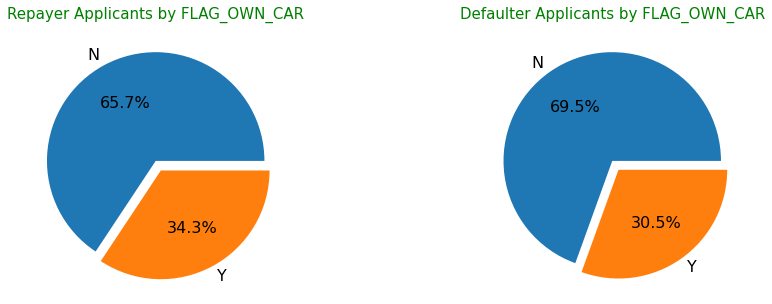

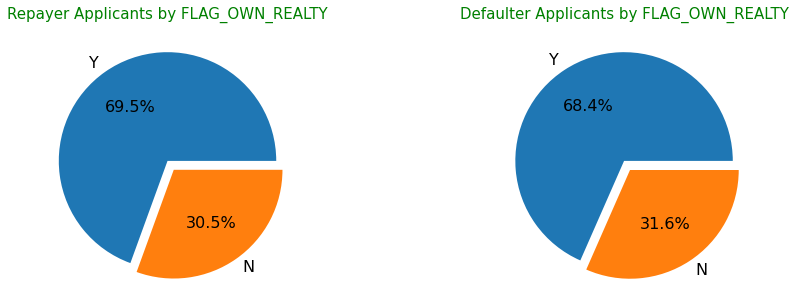

In [263]:
for i in cat_var_pi:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    
    explode = (0,0.1)
    plt.pie(rpy_df[i].value_counts(normalize=True),labels=rpy_df[i].value_counts(normalize=True).keys(),
            autopct="%1.1f%%",explode = explode,
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
    plt.title(f"Repayer Applicants by {i}",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    
   
    plt.subplot(1,2,2)
    explode = (0,0.1)
    plt.pie(def_df[i].value_counts(normalize=True),labels=def_df[i].value_counts(normalize=True).keys(),
            autopct="%1.1f%%",explode = explode,
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
    plt.title(f"Defaulter Applicants by {i}",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    plt.show()

###### Insights
1. ***NAME_CONTRACT_TYPE: Defaulter applicants taken more cash loan compare to repayer applicants***
2. ***CODE_GENDER : Female applied for loan higher than male and distance between male and female % for defaulter applicants is less compare to repayer applicants - meaning it seems comparatively male defaulters are more compare to male repayers.***
3. ***FLAG_OWN_CAR : Who does not have car they are slightly more in defaulter group.***
4. ***FLAG_OWN_REALTY : It seems there is no influence of property for getting loan.***

In [264]:
cat_var_bar = ["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE","NAME_TYPE_SUITE"]

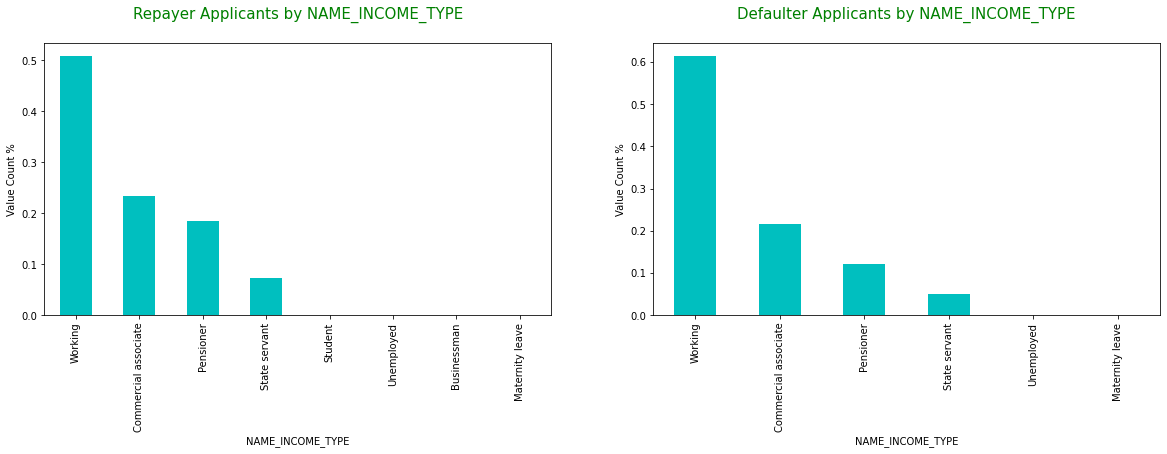

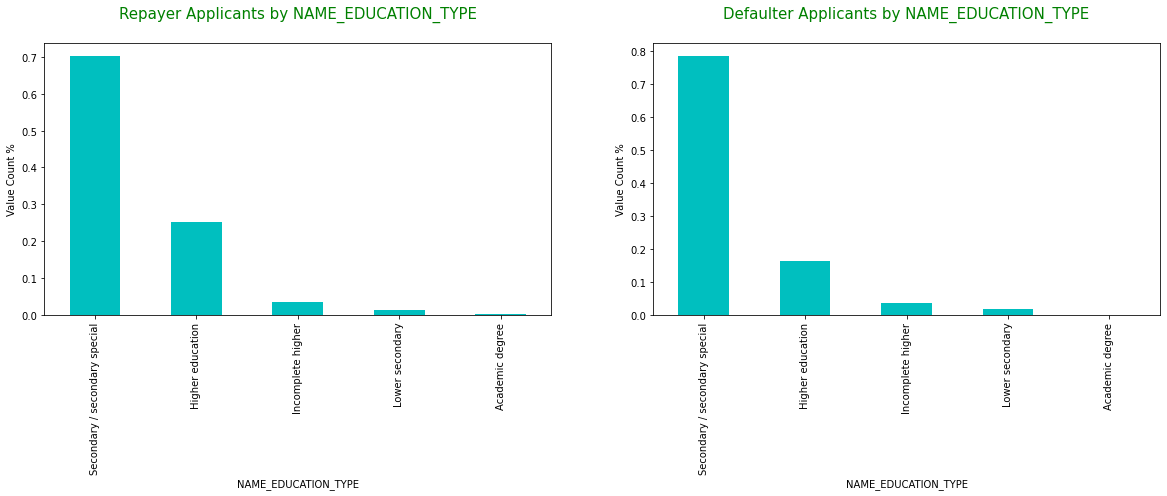

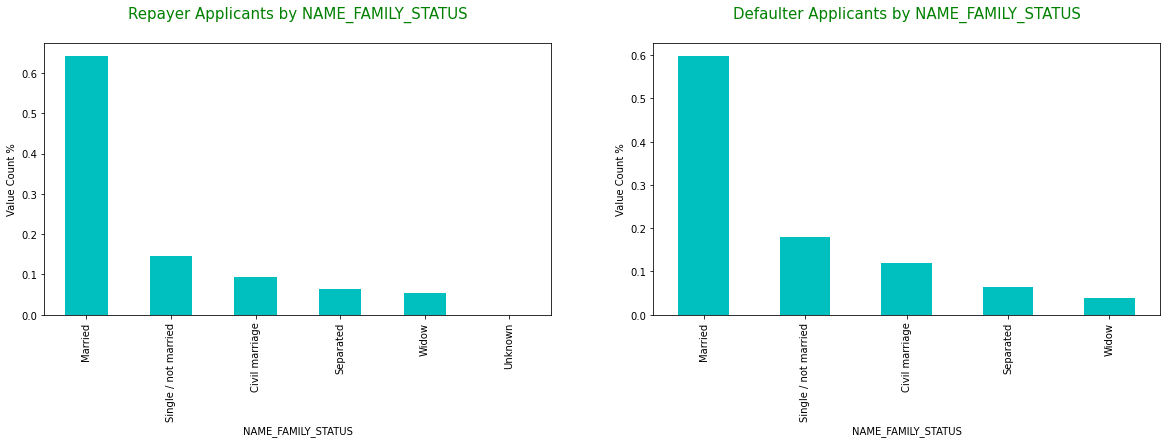

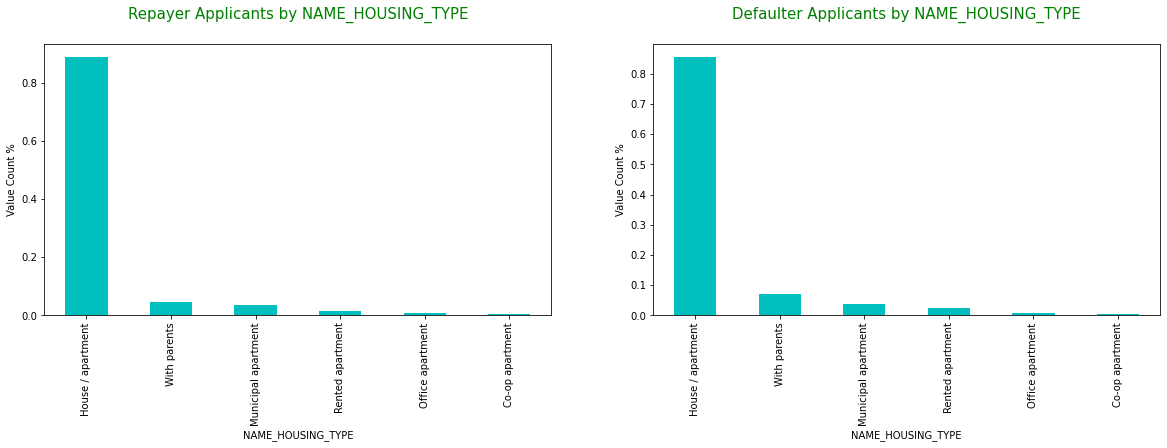

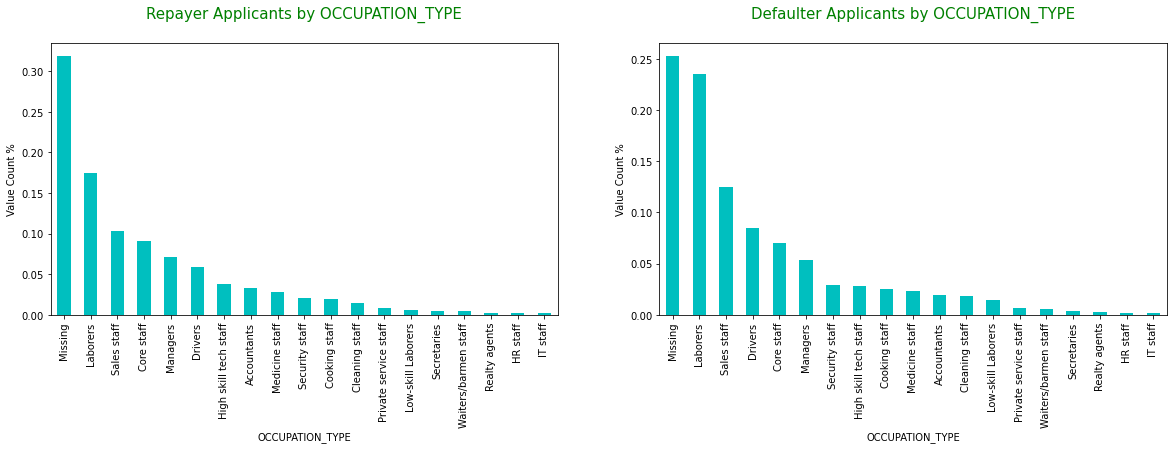

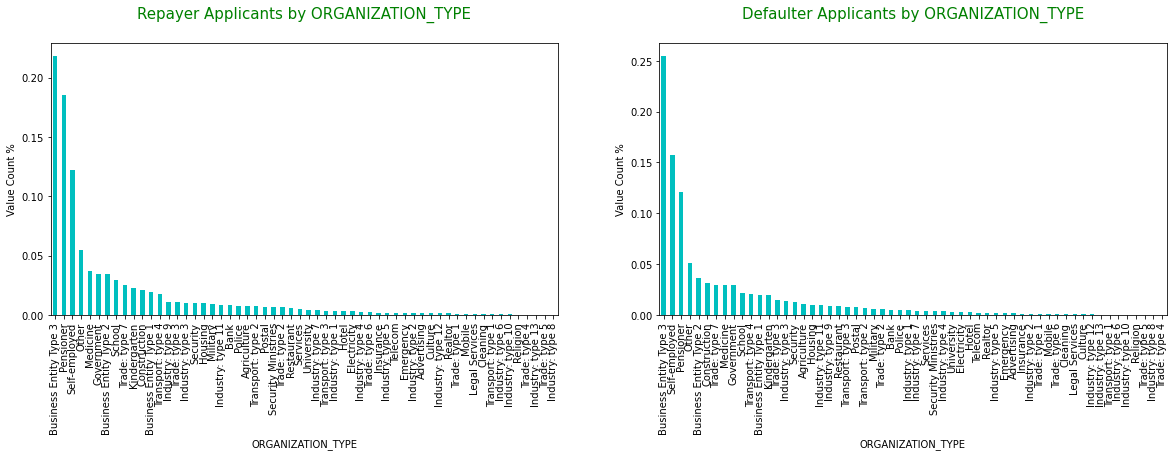

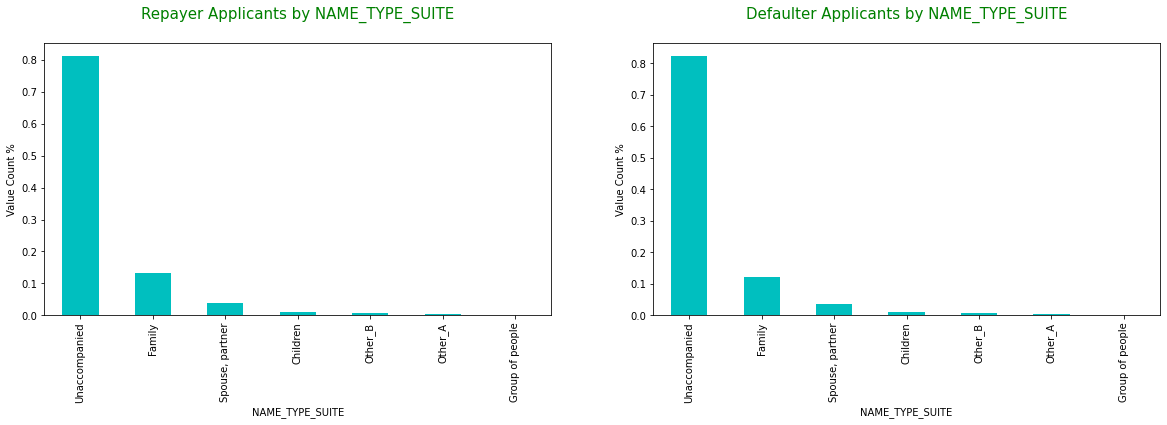

In [265]:
for i in cat_var_bar:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    rpy_df[i].value_counts(normalize=True).plot.bar(color='c')
    plt.xlabel(f"{i}")
    plt.ylabel("Value Count %")
    plt.title(f"Repayer Applicants by {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    
    plt.subplot(1,2,2)
    def_df[i].value_counts(normalize=True).plot.bar(color='c')
    plt.xlabel(f"{i}")
    plt.ylabel("Value Count %")
    plt.title(f"Defaulter Applicants by {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    plt.show()

#### NAME_INCOME_TYPE
-  ***clients from working professionals and commercial associates applied for loan almost 70% of the whole.***
-  ***Working professionals having high risk to default, and businessman and state servants has less risk to default.***


#### NAME_EDUCATION_TYPE
-  ***almost 70% population is coming from Secondary / secondary special applied for loan.***
-  ***risk to default lies with Secondary / secondary special clients.***


#### NAME_FAMILY_STATUS
-  ***those who are married applied for loan in majority (almost 60%) compared to others and very low % of widow applied for loan compared to others***
-  ***risk to default lies with Single / not married clients.*** 


#### NAME_HOUSING_TYPE
-  ***those who are living with parents and own house / apartment applied for loan in majority compare to others.***
-  ***Clients living with parents are slightly risk to default.*** 


#### OCCUPATION_TYPE
-  ***customers from Occupation type Missing, Laboreres, Sales staff, Drivers, and Managers applied for loan in highest number compared to others in both category (repayer and defaulter)***
-  ***customers from IT, HR, Realty, Secretaries, Waiters/barman staff applied for loan in very low number compared to others in both category (repayer and defaulter)***
-  ***Leboreres, Sales staff and Drivers are high risk to default***

### Univariate Analysis of numerical variables

In [270]:
num_var = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","CLIENT_AGE","CLIENT_CURR_WORK_EXP",
           "CNT_FAM_MEMBERS","ALL_REQ_CREDIT_BUREAU_YEAR"]

In [268]:
num_var = ["CNT_FAM_MEMBERS"]

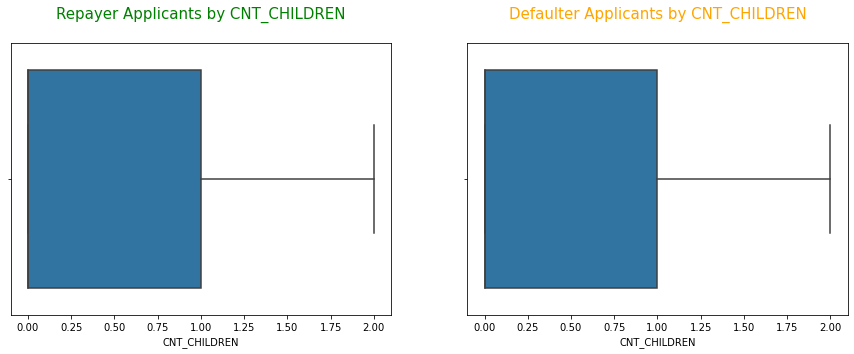

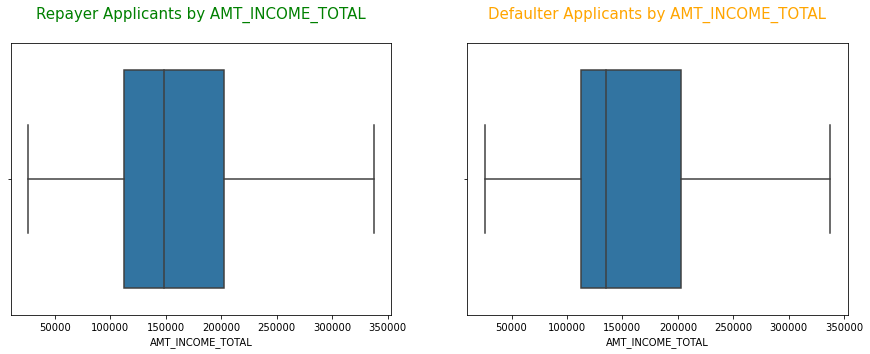

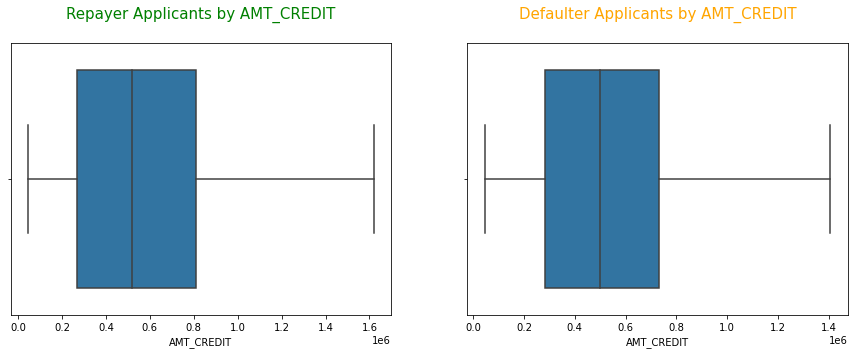

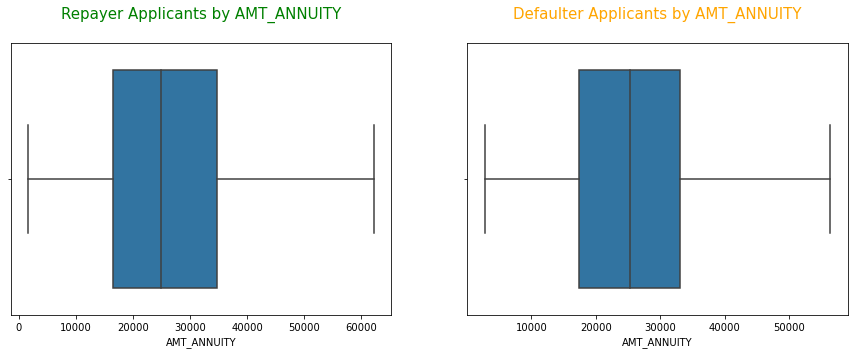

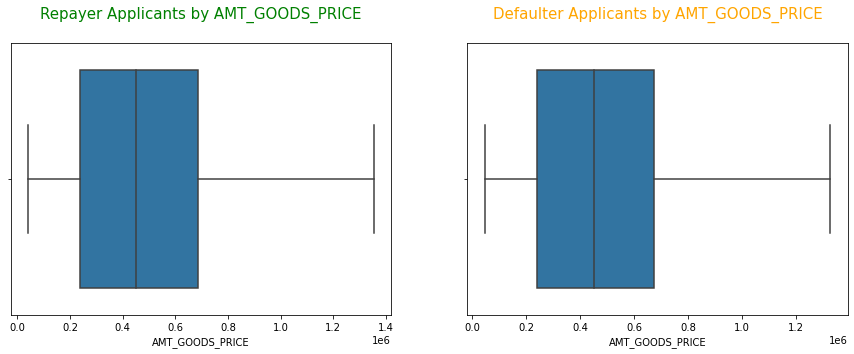

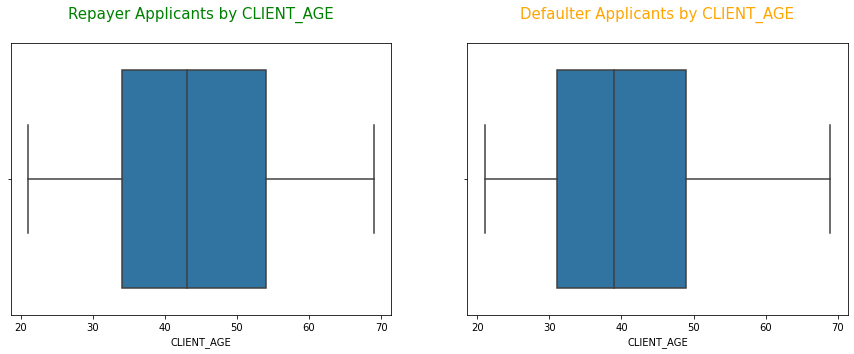

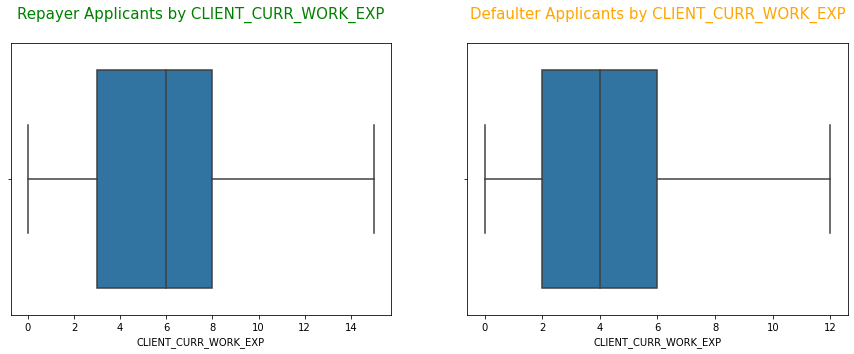

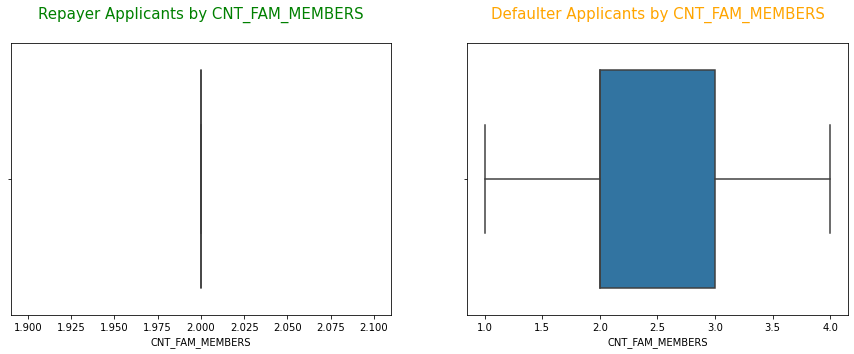

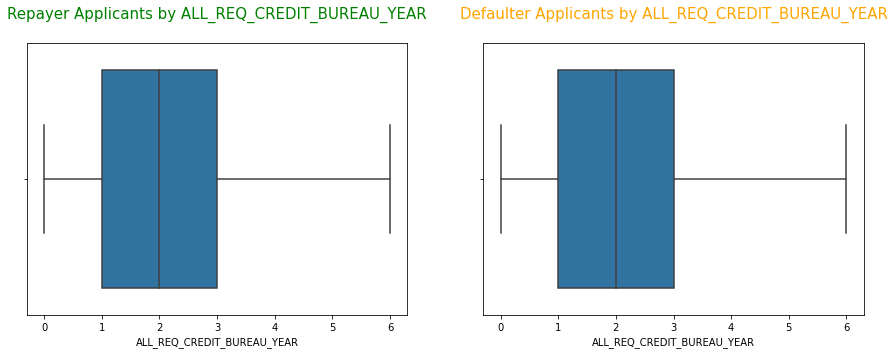

In [271]:
for i in num_var:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(rpy_df[i],showfliers = False)
    plt.title(f"Repayer Applicants by {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    plt.subplot(1,2,2)
    sns.boxplot(def_df[i],showfliers = False)
    plt.title(f"Defaulter Applicants by {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
    plt.show()

#### CNT_CHILDREN
-  ***In both target category, majority of the clients have either 0 or 1 child.***
#### AMT_INCOME_TOTAL
-  ***median income of defaulter is slightly lower than repayer median income***
#### AMT_CREDIT
-  ***in both target category, amount of loan credit range is same.***
#### AMT_ANNUITY
-  ***in both target category, amount of loan installment range is same.***
#### AMT_GOODS_PRICE
-  ***in both target category, amount of loan installment range is same.  this variable has outlier***
#### CLIENT_AGE
-  ***50% of repayer clients are in 35-55 age group and defaulter clients are in 30-50 age group.  It seems slightly younger clients are risk to default.***
#### CLIENT_CURR_WORK_EXP
-  ***in both target category,50 of the data lies between 0-10 years of work experience.***
#### CNT_FAM_MEMBERS
-  ***Clients in defaulter category have 2-3 family members whereas repayer clients have 2 family members in majority.  Clients with more family members could be risk to default.***

## Bivariate Analysis

### Numerical vs Numerical Association

***lets analyse for the repayer clients***

<Figure size 1440x360 with 0 Axes>

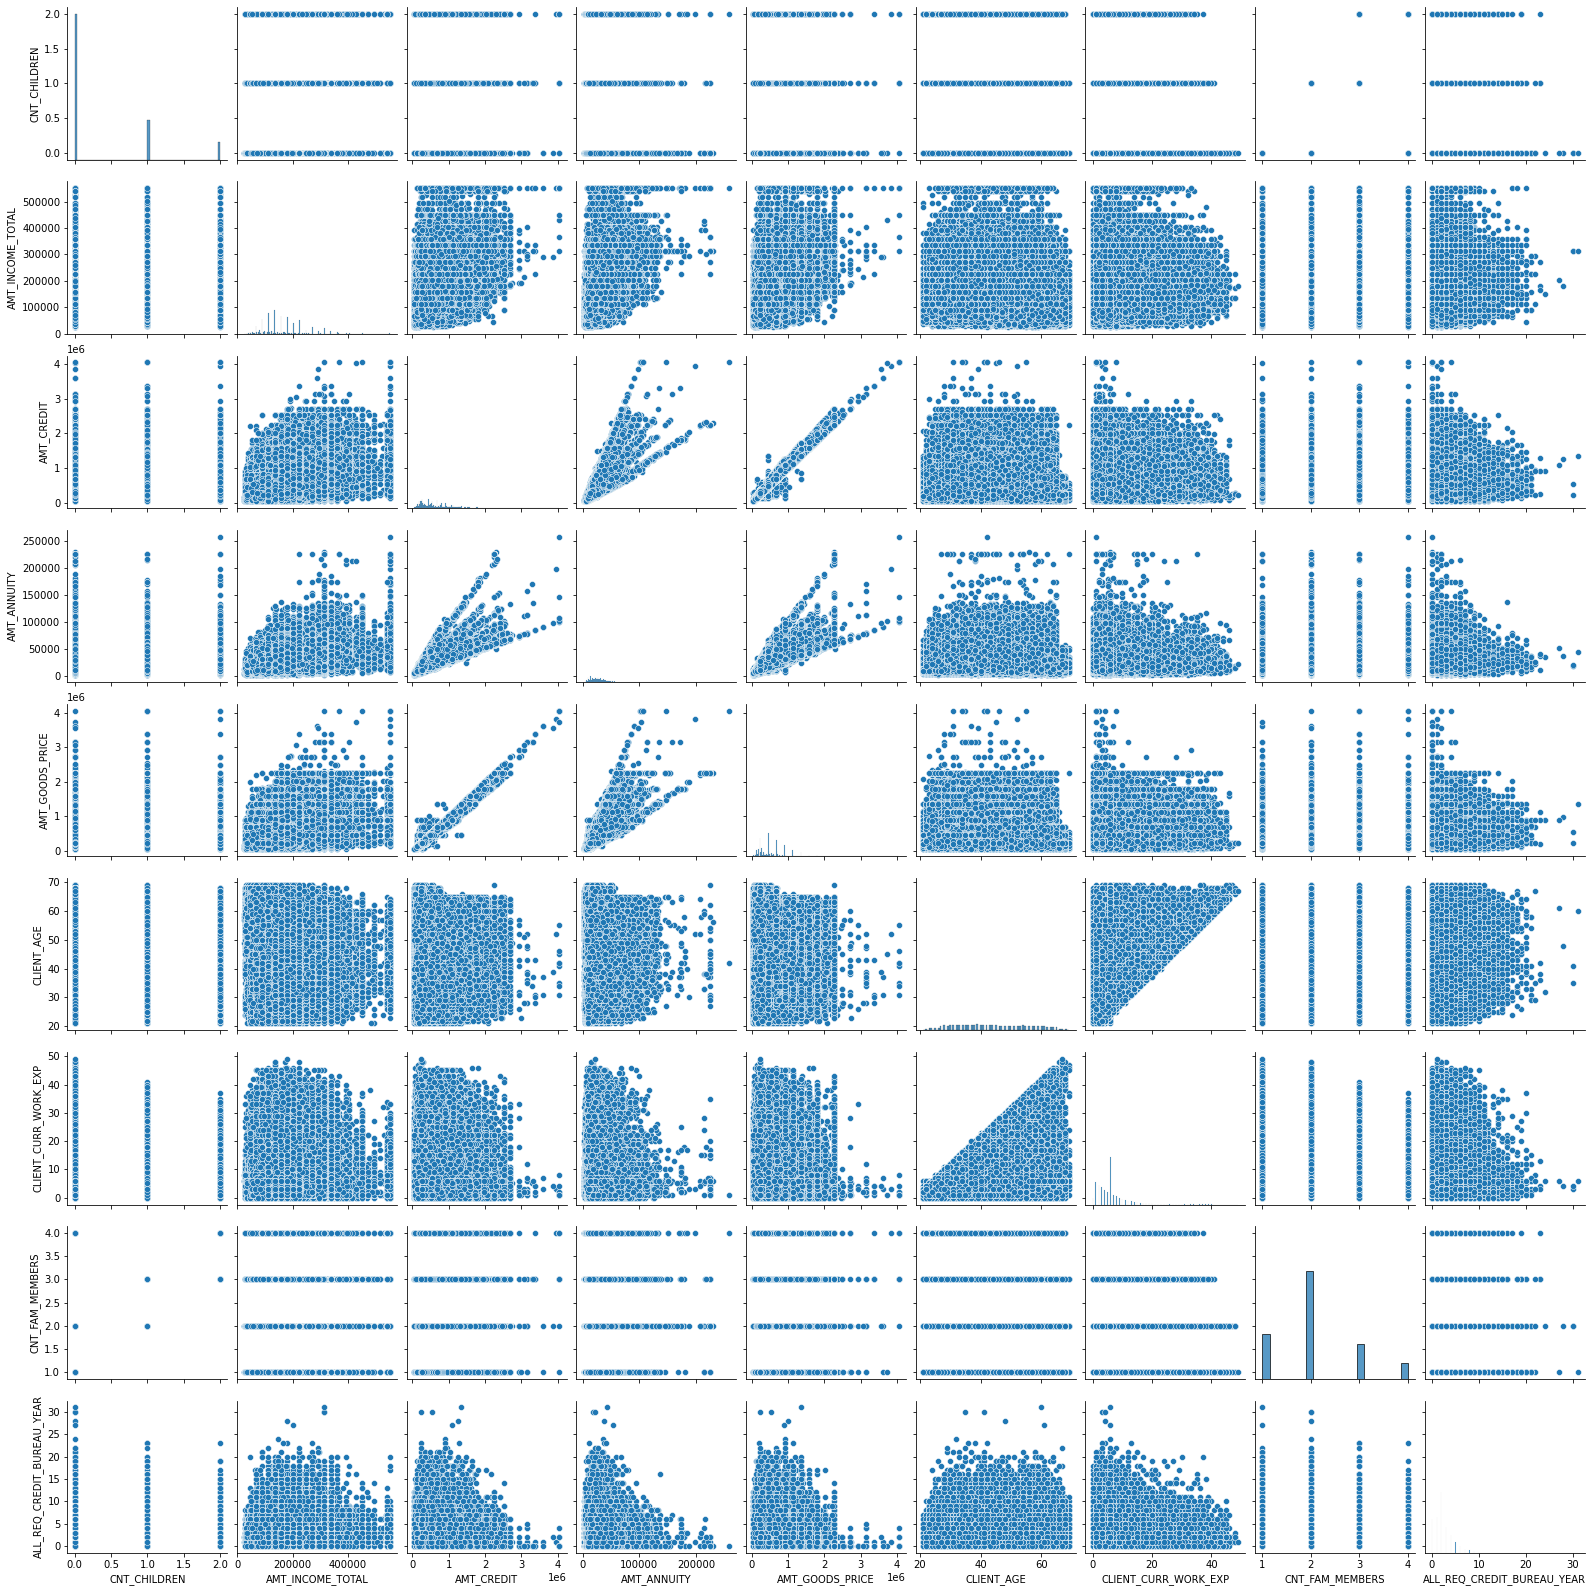

In [272]:
plt.figure(figsize=(20,5))
sns.pairplot(data=rpy_df,vars=num_var)
plt.show()

In [116]:
rpy_df[num_var].corr()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.00000           0.03527     0.00232   
AMT_INCOME_TOTAL                 0.03527           1.00000     0.41251   
AMT_CREDIT                       0.00232           0.41251     1.00000   
AMT_ANNUITY                      0.01917           0.48708     0.77130   
AMT_GOODS_PRICE                 -0.00125           0.41802     0.98702   
CLIENT_AGE                      -0.34326          -0.08371     0.04737   
CLIENT_CURR_WORK_EXP            -0.06124           0.03595     0.08058   
CNT_FAM_MEMBERS                  0.85117           0.04413     0.06870   
ALL_REQ_CREDIT_BUREAU_YEAR      -0.03961           0.07465    -0.00824   

                            AMT_ANNUITY  AMT_GOODS_PRICE  CLIENT_AGE  \
CNT_CHILDREN                    0.01917         -0.00125    -0.34326   
AMT_INCOME_TOTAL                0.48708          0.41802    -0.08371   
AMT_CREDIT                      0.77130          0.98702     0.04737   
AMT_ANNUITY                     1.00000          0.77642    -0.01225   
AMT_GOODS_PRICE                 0.77642          1.00000     0.04464   
CLIENT_AGE                     -0.01225          0.04464     1.00000   
CLIENT_CURR_WORK_EXP            0.04882          0.08161     0.25918   
CNT_FAM_MEMBERS                 0.07819          0.06719    -0.28355   
ALL_REQ_CREDIT_BUREAU_YEAR      0.01207         -0.00931     0.06185   

                            CLIENT_CURR_WORK_EXP  CNT_FAM_MEMBERS  \
CNT_CHILDREN                            -0.06124          0.85117   
AMT_INCOME_TOTAL                         0.03595          0.04413   
AMT_CREDIT                               0.08058          0.06870   
AMT_ANNUITY                              0.04882          0.07819   
AMT_GOODS_PRICE                          0.08161          0.06719   
CLIENT_AGE                               0.25918         -0.28355   
CLIENT_CURR_WORK_EXP                     1.00000         -0.02664   
CNT_FAM_MEMBERS                         -0.02664          1.00000   
ALL_REQ_CREDIT_BUREAU_YEAR               0.01047         -0.02566   

                            ALL_REQ_CREDIT_BUREAU_YEAR  
CNT_CHILDREN                                  -0.03961  
AMT_INCOME_TOTAL                               0.07465  
AMT_CREDIT                                    -0.00824  
AMT_ANNUITY                                    0.01207  
AMT_GOODS_PRICE                               -0.00931  
CLIENT_AGE                                     0.06185  
CLIENT_CURR_WORK_EXP                           0.01047  
CNT_FAM_MEMBERS                               -0.02566  
ALL_REQ_CREDIT_BUREAU_YEAR                     1.00000

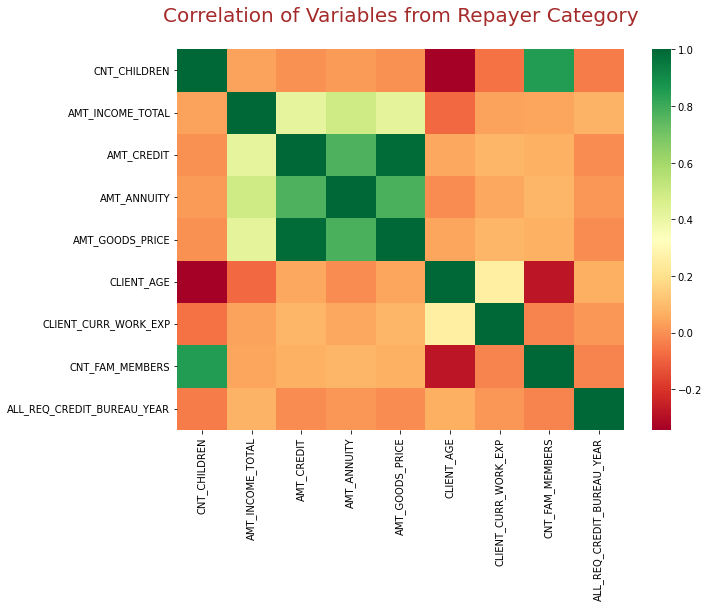

In [837]:
plt.figure(figsize=(10,7))
sns.heatmap(rpy_df[num_var].corr(),cmap="RdYlGn")
plt.title("Correlation of Variables from Repayer Category\n",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'brown'})
plt.show()

***lets analyse for the defaulter clients***

<Figure size 1440x360 with 0 Axes>

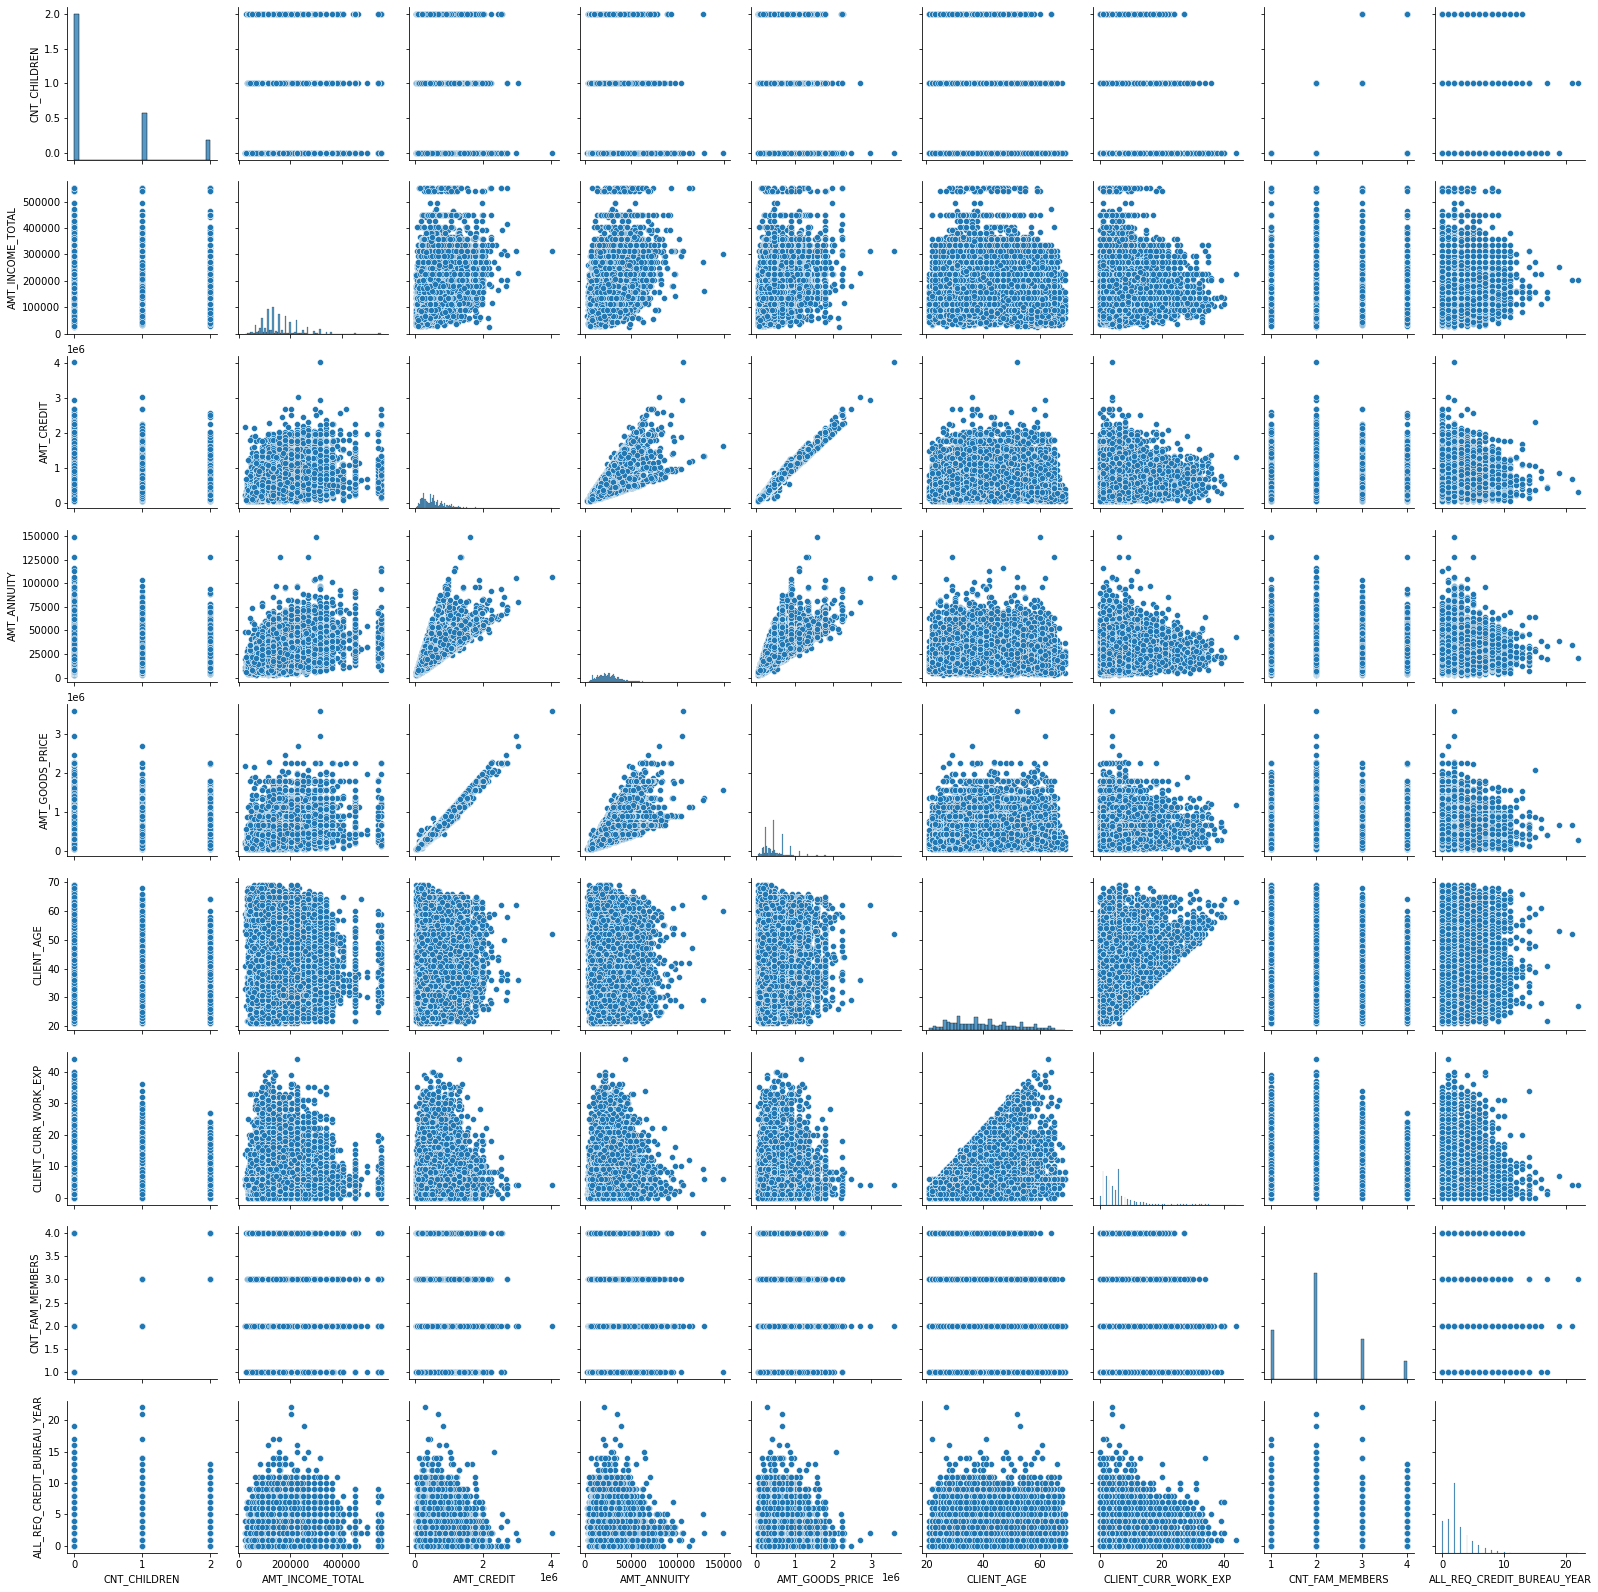

In [273]:
plt.figure(figsize=(20,5))
sns.pairplot(data=def_df,vars=num_var)
plt.show()

In [117]:
def_df[num_var].corr()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.00000           0.00544    -0.00492   
AMT_INCOME_TOTAL                 0.00544           1.00000     0.35409   
AMT_CREDIT                      -0.00492           0.35409     1.00000   
AMT_ANNUITY                      0.02972           0.43227     0.75219   
AMT_GOODS_PRICE                 -0.01134           0.35492     0.98278   
CLIENT_AGE                      -0.26783          -0.00409     0.13507   
CLIENT_CURR_WORK_EXP            -0.05212           0.01512     0.09909   
CNT_FAM_MEMBERS                  0.85268           0.01199     0.05323   
ALL_REQ_CREDIT_BUREAU_YEAR      -0.03119           0.08678    -0.00997   

                            AMT_ANNUITY  AMT_GOODS_PRICE  CLIENT_AGE  \
CNT_CHILDREN                    0.02972         -0.01134    -0.26783   
AMT_INCOME_TOTAL                0.43227          0.35492    -0.00409   
AMT_CREDIT                      0.75219          0.98278     0.13507   
AMT_ANNUITY                     1.00000          0.75230     0.01403   
AMT_GOODS_PRICE                 0.75230          1.00000     0.13553   
CLIENT_AGE                      0.01403          0.13553     1.00000   
CLIENT_CURR_WORK_EXP            0.03691          0.10464     0.30105   
CNT_FAM_MEMBERS                 0.07760          0.04975    -0.20229   
ALL_REQ_CREDIT_BUREAU_YEAR      0.00670         -0.01016     0.07614   

                            CLIENT_CURR_WORK_EXP  CNT_FAM_MEMBERS  \
CNT_CHILDREN                            -0.05212          0.85268   
AMT_INCOME_TOTAL                         0.01512          0.01199   
AMT_CREDIT                               0.09909          0.05323   
AMT_ANNUITY                              0.03691          0.07760   
AMT_GOODS_PRICE                          0.10464          0.04975   
CLIENT_AGE                               0.30105         -0.20229   
CLIENT_CURR_WORK_EXP                     1.00000         -0.01549   
CNT_FAM_MEMBERS                         -0.01549          1.00000   
ALL_REQ_CREDIT_BUREAU_YEAR               0.02806         -0.00832   

                            ALL_REQ_CREDIT_BUREAU_YEAR  
CNT_CHILDREN                                  -0.03119  
AMT_INCOME_TOTAL                               0.08678  
AMT_CREDIT                                    -0.00997  
AMT_ANNUITY                                    0.00670  
AMT_GOODS_PRICE                               -0.01016  
CLIENT_AGE                                     0.07614  
CLIENT_CURR_WORK_EXP                           0.02806  
CNT_FAM_MEMBERS                               -0.00832  
ALL_REQ_CREDIT_BUREAU_YEAR                     1.00000

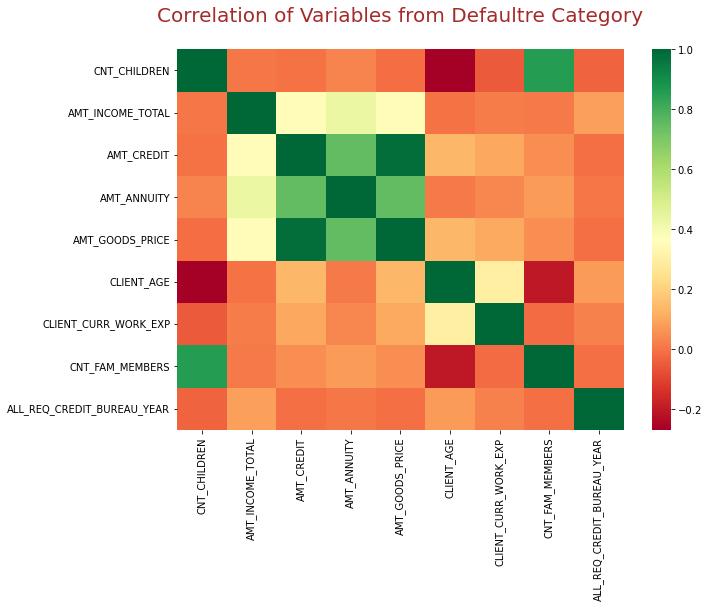

In [838]:
plt.figure(figsize=(10,7))
sns.heatmap(def_df[num_var].corr(),cmap="RdYlGn")
plt.title("Correlation of Variables from Defaultre Category\n",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'brown'})
plt.show()

## Find top 10 correlation matrix from repayer dataframe

In [992]:
#lets collect all numerical variables
#rpy_df.select_dtypes(include='number')
num_dtypes = ['int64','float64']
num_dtypes_rpy_df = rpy_df.select_dtypes(include=num_dtypes)

In [993]:
num_dtypes_rpy_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
1      100003       0             0      270000.00000 1293502.50000   
2      100004       0             0       67500.00000  135000.00000   
3      100006       0             0      135000.00000  312682.50000   
4      100007       0             0      121500.00000  513000.00000   
5      100008       0             0       99000.00000  490495.50000   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
1  35698.50000    1129500.00000                     0.00354   
2   6750.00000     135000.00000                     0.01003   
3  29686.50000     297000.00000                     0.00802   
4  21865.50000     513000.00000                     0.02866   
5  27517.50000     454500.00000                     0.03579   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1         1186.00000              291           1               1   
2         4260.00000             2531           1               1   
3         9833.00000             2437           1               1   
4         4311.00000             3458           1               1   
5         4970.00000              477           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
1                0                 1           1           0                2   
2                1                 1           1           0                1   
3                0                 1           0           0                2   
4                0                 1           0           0                1   
5                1                 1           1           0                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   
5                     2                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  \
1                       0                        0                   1.00000   
2                       0                        0                   0.00000   
3                       0                        0                   2.00000   
4                       1                        1                   0.00000   
5                       0                        0                   0.00000   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
1                   0.00000                   1.00000   
2                   0.00000                   0.00000   
3                   0.00000                   2.00000   
4                   0.00000                   0.00000   
5                   0.00000                   0.00000   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_ALL_DOCUMENT  \
1                   0.00000               828.00000                  1   
2                   0.00000               815.00000                  0   
3                   0.00000               617.

In [994]:
num_dtypes_rpy_df.drop(['SK_ID_CURR','TARGET'],axis = 1,inplace =True)

In [995]:
num_dtypes_rpy_df.head()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1             0      270000.00000 1293502.50000  35698.50000    1129500.00000   
2             0       67500.00000  135000.00000   6750.00000     135000.00000   
3             0      135000.00000  312682.50000  29686.50000     297000.00000   
4             0      121500.00000  513000.00000  21865.50000     513000.00000   
5             0       99000.00000  490495.50000  27517.50000     454500.00000   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
1                     0.00354         1186.00000              291           1   
2                     0.01003         4260.00000             2531           1   
3                     0.00802         9833.00000             2437           1   
4                     0.02866         4311.00000             3458           1   
5                     0.03579         4970.00000              477           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   
5               1                1                 1           1           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   
5                2                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1                   1.00000                   0.00000   
2                   0.00000                   0.00000   
3                   2.00000                   0.00000   
4                   0.00000                   0.00000   
5                   0.00000                   0.00000   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1                   1.00000                   0.00000               828.00000   
2                   0.00000                   0.00000               815.00000   
3                   2.00000                   0.00000               617.00000   
4                   0.00000                   0.00000              1106.00000   
5                   0.00000                   0.00000              2536.00000   

   FLAG_ALL_DOCUMENT  ALL_REQ_CREDIT_BUREAU_YEAR  CLIENT_AGE  \
1                  1    

In [996]:
corr_matrix_rpy = num_dtypes_rpy_df.corr(method='pearson')
sorted_corr_matrix_rpy = corr_matrix_rpy.unstack().sort_values()
print(sorted_corr_matrix_rpy)

FLAG_EMP_PHONE               CLIENT_AGE                    -0.62199
CLIENT_AGE                   FLAG_EMP_PHONE                -0.62199
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.53900
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.53900
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.53730
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.53730
CLIENT_AGE                   CNT_CHILDREN                  -0.34326
CNT_CHILDREN                 CLIENT_AGE                    -0.34326
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT          -0.28406
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START       -0.28406
CLIENT_AGE                   CNT_FAM_MEMBERS               -0.28355
CNT_FAM_MEMBERS              CLIENT_AGE                    -0.28355
DAYS_ID_PUBLISH              FLAG_EMP_PHONE                -0.27547
FLAG_EMP_PHONE               DAYS_ID_PUBLISH               -0.27547
HOUR_APPR_PROCESS_START      REGION_RATING_CLIEN

In [997]:
type(sorted_corr_matrix_rpy)

pandas.core.series.Series

In [998]:
corr_matrix_rpy_df = pd.DataFrame(sorted_corr_matrix_rpy)
corr_matrix_rpy_df.reset_index(level=0,inplace=True)
corr_matrix_rpy_df.reset_index(level=0,inplace=True)
corr_matrix_rpy_df.rename(columns={'index':'var1','level_0':'var2',0:'corr_val'},inplace=True)
#corr_matrix_rpy_df.drop_duplicates(subset=['var1','var2','corr_val'],inplace=True)

In [999]:
corr_matrix_rpy_df = corr_matrix_rpy_df[~(corr_matrix_rpy_df.corr_val == 1.)]

In [1000]:
corr_matrix_rpy_df.sort_values(by='corr_val',ascending=False).head(10)

var1                         var2  corr_val
1055     OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE   0.99851
1054     OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE   0.99851
1053              AMT_GOODS_PRICE                   AMT_CREDIT   0.98702
1052                   AMT_CREDIT              AMT_GOODS_PRICE   0.98702
1051         REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   0.95015
1050  REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT   0.95015
1049   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   0.86186
1048  LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION   0.86186
1047     DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE   0.85937
1046     DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE   0.85937

In [1001]:
corr_matrix_rpy_df.sort_values(by='corr_val',ascending=True).head(10)

var1                         var2  corr_val
0                   CLIENT_AGE               FLAG_EMP_PHONE  -0.62199
1               FLAG_EMP_PHONE                   CLIENT_AGE  -0.62199
2         REGION_RATING_CLIENT   REGION_POPULATION_RELATIVE  -0.53900
3   REGION_POPULATION_RELATIVE         REGION_RATING_CLIENT  -0.53900
4  REGION_RATING_CLIENT_W_CITY   REGION_POPULATION_RELATIVE  -0.53730
5   REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY  -0.53730
6                 CNT_CHILDREN                   CLIENT_AGE  -0.34326
7                   CLIENT_AGE                 CNT_CHILDREN  -0.34326
9      HOUR_APPR_PROCESS_START         REGION_RATING_CLIENT  -0.28406
8         REGION_RATING_CLIENT      HOUR_APPR_PROCESS_START  -0.28406

###### it seems this matrix has duplicate correlation - showing same correlation just by interchanging x and y, hence lets remove unnecessary data.

In [1009]:
## keep upper triangular values of correlation matrix and make null for lower triangular values
upp_corr_matrix_rpy = corr_matrix_rpy.where(np.triu(np.ones(corr_matrix_rpy.shape),k=1).astype(np.bool))
upp_corr_matrix_rpy
# convert to 1-d series and drop null
uniq_corr_matrix_rpy = upp_corr_matrix_rpy.unstack().dropna()
uniq_corr_matrix_rpy
# sort
sorted_uniq_corr_matrix_rpy = uniq_corr_matrix_rpy.sort_values(ascending=False)
print(sorted_uniq_corr_matrix_rpy)
# create df
corr_matrix_rpy_df = pd.DataFrame(sorted_uniq_corr_matrix_rpy)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.99851
AMT_GOODS_PRICE              AMT_CREDIT                     0.98702
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.95015
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.86186
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.85937
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.85117
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83038
AMT_GOODS_PRICE              AMT_ANNUITY                    0.77642
AMT_ANNUITY                  AMT_CREDIT                     0.77130
                             AMT_INCOME_TOTAL               0.48708
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.44610
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY         0.43551
AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.41802
AMT_CREDIT                   AMT_INCOME_TOTAL               0.41251
REG_CITY_NOT_LIVE_CITY       REG_REGION_NOT_LIVE

In [1011]:
corr_matrix_rpy_df.reset_index(level=0,inplace=True)
corr_matrix_rpy_df.reset_index(level=0,inplace=True)
corr_matrix_rpy_df.rename(columns={'index':'var1','level_0':'var2',0:'corr_val'},inplace=True)

In [1020]:
corr_matrix_rpy_df.head(10)

var1                         var2  corr_val
0    OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE   0.99851
1                  AMT_CREDIT              AMT_GOODS_PRICE   0.98702
2        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   0.95015
3  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   0.86186
4    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE   0.85937
5                CNT_CHILDREN              CNT_FAM_MEMBERS   0.85117
6      REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY   0.83038
7                 AMT_ANNUITY              AMT_GOODS_PRICE   0.77642
8                  AMT_CREDIT                  AMT_ANNUITY   0.77130
9            AMT_INCOME_TOTAL                  AMT_ANNUITY   0.48708

## Find top 10 correlation matrix from defaulter dataframe

In [1022]:
num_dtypes = ['int64','float64']
num_dtypes_def_df = def_df.select_dtypes(include=num_dtypes)
num_dtypes_def_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
0       100002       1             0      202500.00000  406597.50000   
26      100031       1             0      112500.00000  979992.00000   
40      100047       1             0      202500.00000 1193580.00000   
42      100049       1             0      135000.00000  288873.00000   
81      100096       1             0       81000.00000  252000.00000   

    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0   24700.50000     351000.00000                     0.01880   
26  27076.50000     702000.00000                     0.01803   
40  35028.00000     855000.00000                     0.02516   
42  16258.50000     238500.00000                     0.00730   
81  14593.50000     252000.00000                     0.02866   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0          3648.00000             2120           1               1   
26         6573.00000             1827           1               1   
40         1182.00000             1029           1               1   
42           45.00000             4409           1               1   
81         5391.00000             4199           1               0   

    FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0                 0                 1           1           0   
26                0                 1           0           0   
40                0                 1           0           0   
42                1                 1           1           0   
81                0                 1           0           0   

    CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                 1                     2                            2   
26                1                     3                            2   
40                2                     2                            2   
42                2                     3                            3   
81                2                     2                            2   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                       0                        0   
81                       0                       0                        0   

    OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                    2.00000                   2.00000   
26                  10.00000                   1.00000   
40                   0.00000                   0.00000   
42                   1.00000                   0.00000   
81                   1.00000                   1.00000   

    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                    2.00000                   2.00000   
26                  10.00000                   0.00000   
40                   0.00000                   0.00000   
42                   1.00000                   0.00000   
81                   1.00000                   1.00000   

    DAYS_LAST_PHONE_CH

In [1023]:
num_dtypes_def_df.drop(['SK_ID_CURR','TARGET'],axis = 1,inplace =True)

In [1024]:
num_dtypes_def_df.head()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
0              0      202500.00000  406597.50000  24700.50000   
26             0      112500.00000  979992.00000  27076.50000   
40             0      202500.00000 1193580.00000  35028.00000   
42             0      135000.00000  288873.00000  16258.50000   
81             0       81000.00000  252000.00000  14593.50000   

    AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  \
0      351000.00000                     0.01880         3648.00000   
26     702000.00000                     0.01803         6573.00000   
40     855000.00000                     0.02516         1182.00000   
42     238500.00000                     0.00730           45.00000   
81     252000.00000                     0.02866         5391.00000   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   
40             1029           1               1                0   
42             4409           1               1                1   
81             4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                  1           1           0                1   
26                 1           0           0                1   
40                 1           0           0                2   
42                 1           1           0                2   
81                 1           0           0                2   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                       0                        0   
81                       0                       0                        0   

    OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                    2.00000                   2.00000   
26                  10.00000                   1.00000   
40                   0.00000                   0.00000   
42                   1.00000                   0.00000   
81                   1.00000                   1.00000   

    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                    2.00000                   2.00000   
26                  10.00000                   0.00000   
40                   0.00000                   0.00000   
42                   1.00000                   0.00000   
81                   1.00000                   1.00000   

    DAYS_LAST_PHONE_CHANGE  FLAG_ALL_DOCUMENT  ALL_REQ_CREDIT_BUREAU_YEAR  \
0               1134.00000                  1                    

In [1025]:
corr_matrix_def = num_dtypes_def_df.corr(method='pearson')

In [1026]:
## keep upper triangular values of correlation matrix and make null for lower triangular values
upp_corr_matrix_def = corr_matrix_def.where(np.triu(np.ones(corr_matrix_def.shape),k=1).astype(np.bool))
upp_corr_matrix_def
# convert to 1-d series and drop null
uniq_corr_matrix_def = upp_corr_matrix_def.unstack().dropna()
uniq_corr_matrix_def
# sort
sorted_uniq_corr_matrix_def = uniq_corr_matrix_def.sort_values(ascending=False)
print(sorted_uniq_corr_matrix_def)
# create df
corr_matrix_def_df = pd.DataFrame(sorted_uniq_corr_matrix_def)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.99827
AMT_GOODS_PRICE              AMT_CREDIT                     0.98278
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.95664
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.86902
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.85268
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.84789
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.77854
AMT_GOODS_PRICE              AMT_ANNUITY                    0.75230
AMT_ANNUITY                  AMT_CREDIT                     0.75219
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.49794
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY         0.47205
AMT_ANNUITY                  AMT_INCOME_TOTAL               0.43227
AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.35492
AMT_CREDIT                   AMT_INCOME_TOTAL               0.35409
OBS_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_C

In [1027]:
corr_matrix_def_df.reset_index(level=0,inplace=True)
corr_matrix_def_df.reset_index(level=0,inplace=True)
corr_matrix_def_df.rename(columns={'index':'var1','level_0':'var2',0:'corr_val'},inplace=True)

In [1028]:
corr_matrix_def_df.head(10)

var1                         var2  corr_val
0    OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE   0.99827
1                  AMT_CREDIT              AMT_GOODS_PRICE   0.98278
2        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   0.95664
3    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE   0.86902
4                CNT_CHILDREN              CNT_FAM_MEMBERS   0.85268
5  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   0.84789
6      REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY   0.77854
7                 AMT_ANNUITY              AMT_GOODS_PRICE   0.75230
8                  AMT_CREDIT                  AMT_ANNUITY   0.75219
9  REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION   0.49794

### Numerical vs Categorical Variables

In [120]:
num_var = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","CLIENT_AGE","CLIENT_CURR_WORK_EXP",
           "CNT_FAM_MEMBERS","ALL_REQ_CREDIT_BUREAU_YEAR"]
cat_var = ["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE",
           "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE"]

###### Gender vs AMT_INCOME_TOTAL

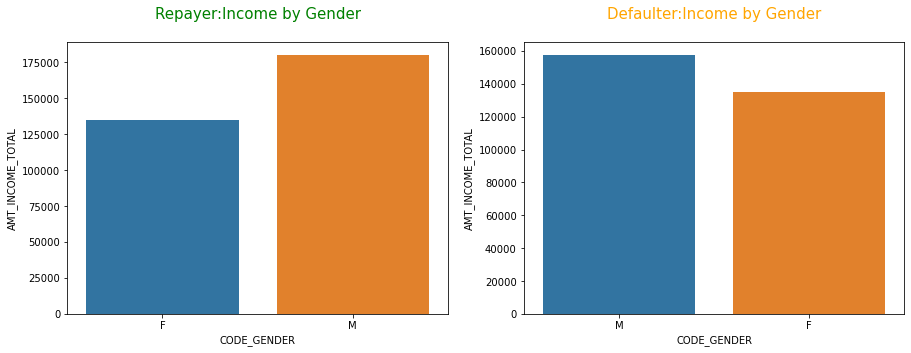

In [839]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="CODE_GENDER",y="AMT_INCOME_TOTAL",estimator=np.median)
plt.title(f"Repayer:Income by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="CODE_GENDER",y="AMT_INCOME_TOTAL",estimator=np.median)
plt.title(f"Defaulter:Income by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

##### Gender vs AMT_CREDIT

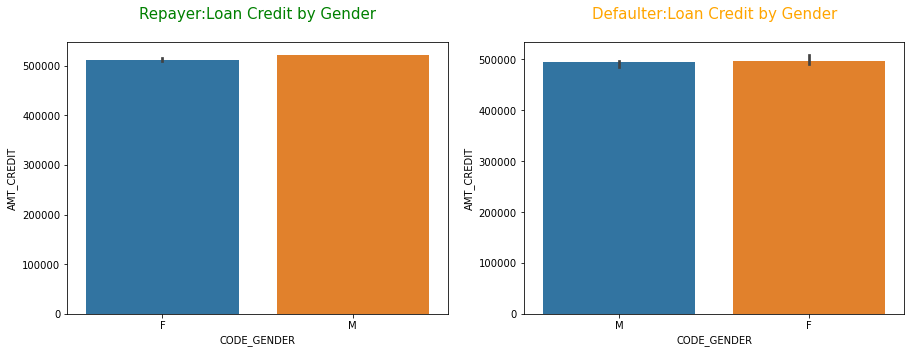

In [140]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="CODE_GENDER",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Repayer:Loan Credit by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="CODE_GENDER",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Defaulter:Loan Credit by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

##### Gender vs AMT_ANNUITY

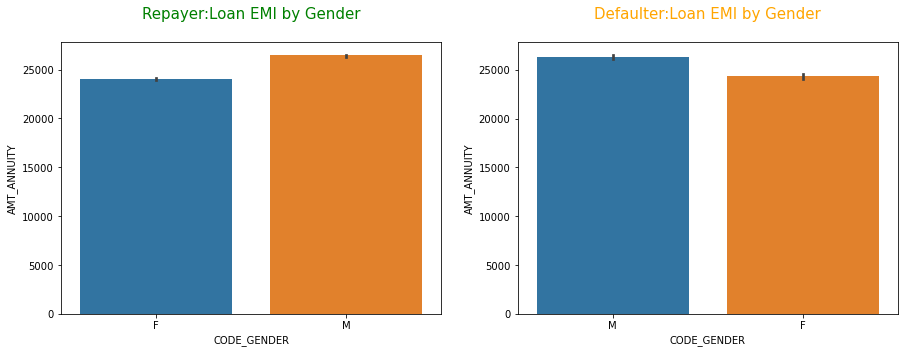

In [141]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="CODE_GENDER",y="AMT_ANNUITY",estimator=np.median)
plt.title(f"Repayer:Loan EMI by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="CODE_GENDER",y="AMT_ANNUITY",estimator=np.median)
plt.title(f"Defaulter:Loan EMI by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

###### Female has lower loan annuity compare to Male clients in both target category

###### Gender vs CLIENT_AGE

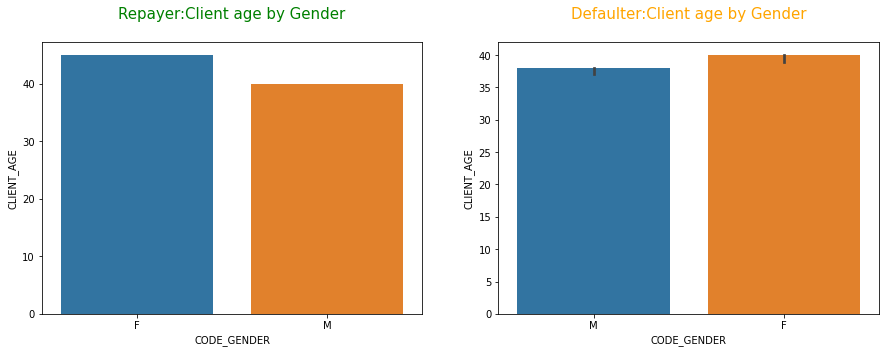

In [840]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="CODE_GENDER",y="CLIENT_AGE",estimator=np.median)
plt.title(f"Repayer:Client age by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="CODE_GENDER",y="CLIENT_AGE",estimator=np.median)
plt.title(f"Defaulter:Client age by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

###### Female client age is slightly more than male clients in both target category

###### Gender vs CLIENT_CURR_WORK_EXP

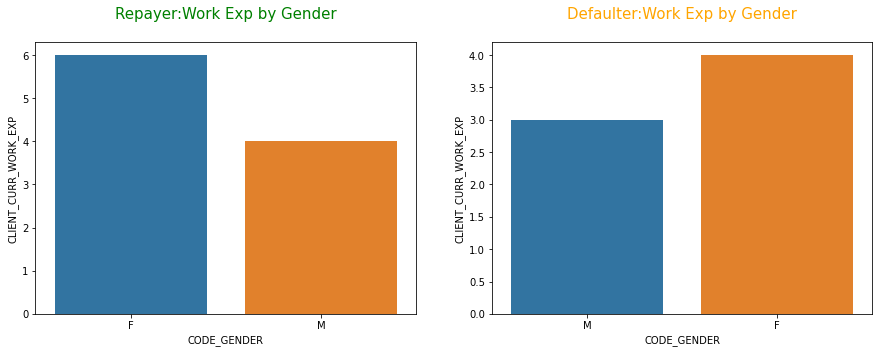

In [144]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="CODE_GENDER",y="CLIENT_CURR_WORK_EXP",estimator=np.median)
plt.title(f"Repayer:Work Exp by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="CODE_GENDER",y="CLIENT_CURR_WORK_EXP",estimator=np.median)
plt.title(f"Defaulter:Work Exp by Gender\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

###### Female clients having more work experience than male clients in both target category

###### NAME_CONTRACT_TYPE vs AMT_CREDIT

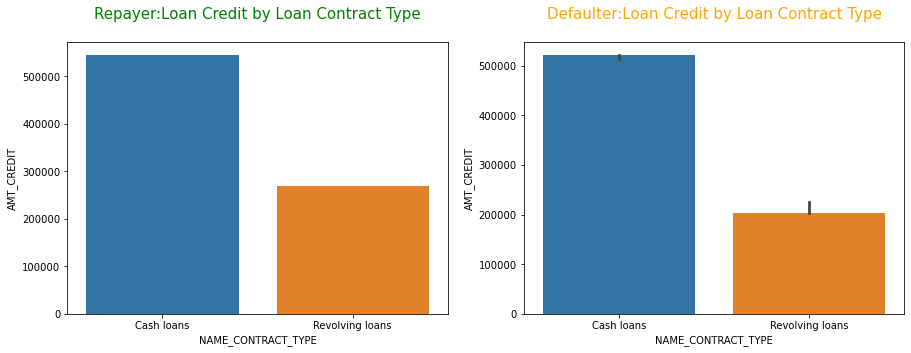

In [145]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="NAME_CONTRACT_TYPE",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Repayer:Loan Credit by Loan Contract Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="NAME_CONTRACT_TYPE",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Defaulter:Loan Credit by Loan Contract Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

###### Cash loans types has more loan credits compare to revolving loan type in both target category

###### FLAG_OWN_CAR vs AMT_CREDIT

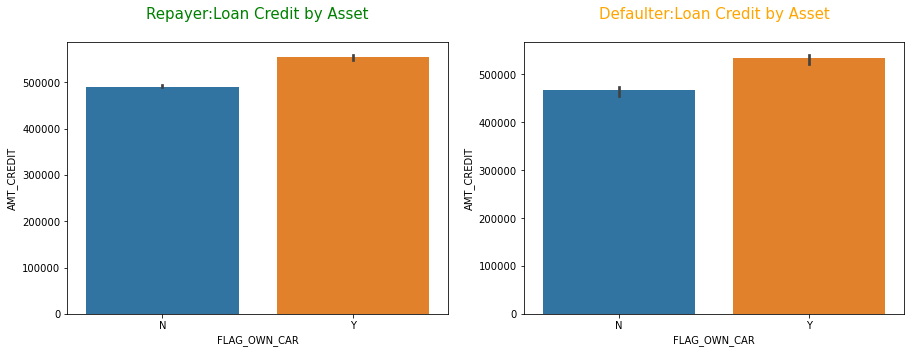

In [146]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="FLAG_OWN_CAR",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Repayer:Loan Credit by Asset\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="FLAG_OWN_CAR",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Defaulter:Loan Credit by Asset\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

###### Clients having car has eligible for more loan credit than clients who dont own car in both target category.

###### FLAG_OWN_REALTY vs AMT_CREDIT

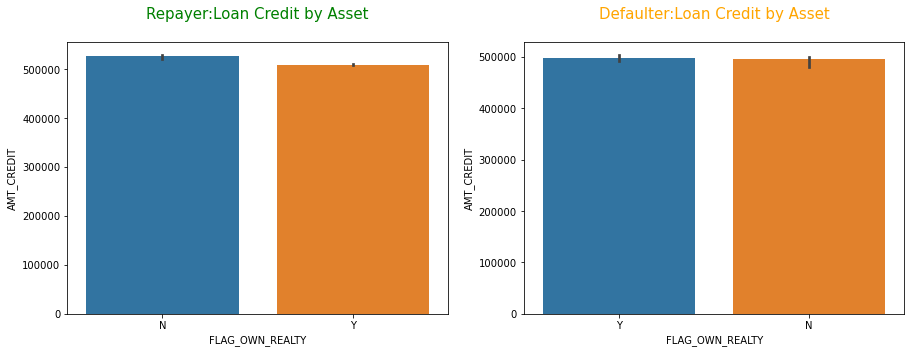

In [147]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="FLAG_OWN_REALTY",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Repayer:Loan Credit by Asset\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="FLAG_OWN_REALTY",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Defaulter:Loan Credit by Asset\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

###### Clients who dont own property get more loan credit comapre to clients who owns property may be this is because of home loan type

###### NAME_HOUSING_TYPE vs AMT_CREDIT

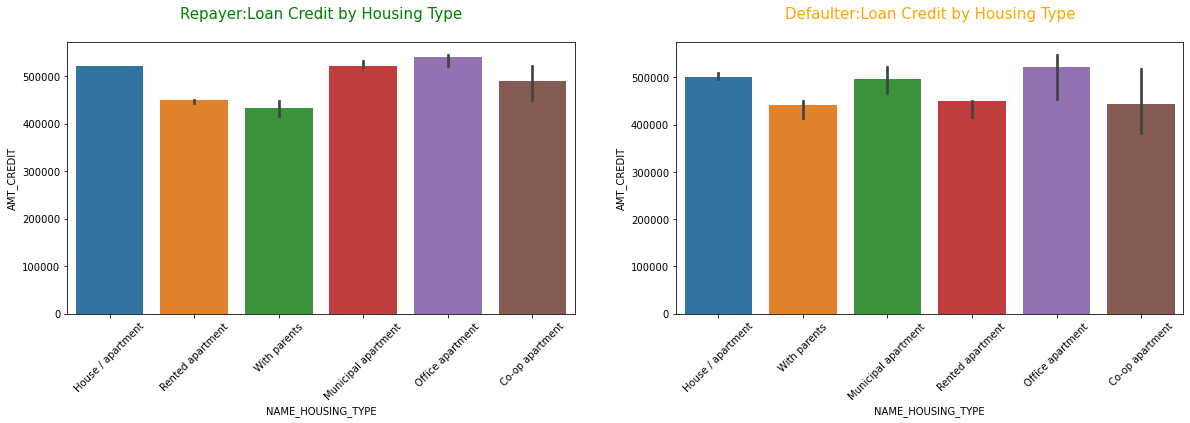

In [148]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="NAME_HOUSING_TYPE",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Repayer:Loan Credit by Housing Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="NAME_HOUSING_TYPE",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Defaulter:Loan Credit by Housing Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.xticks(rotation = 45)
plt.show()

###### clients lives with parents and in rented apartments are less eligible for loan credit comapre to clients who lives in own house or office apartments in both target category.

###### NAME_EDUCATION_TYPE vs AMT_CREDIT

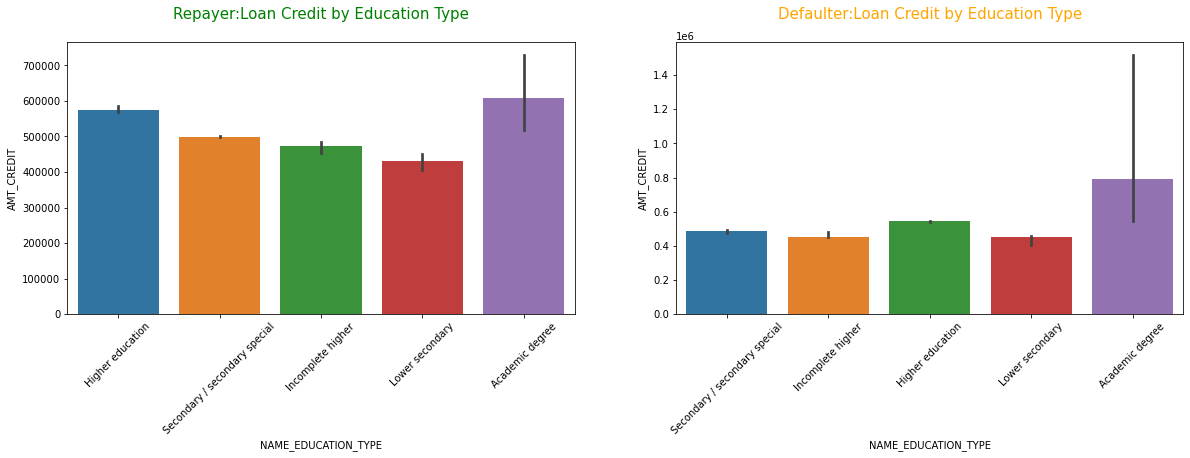

In [149]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=rpy_df,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Repayer:Loan Credit by Education Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.barplot(data=def_df,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Defaulter:Loan Credit by Education Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.xticks(rotation = 45)
plt.show()

###### Clients with higher education and academic degree are more eligible for more loan credit  comapre to incomplete higher and lower secondary education in both target categroy


###### OCCUPATION_TYPE vs AMT_CREDIT 

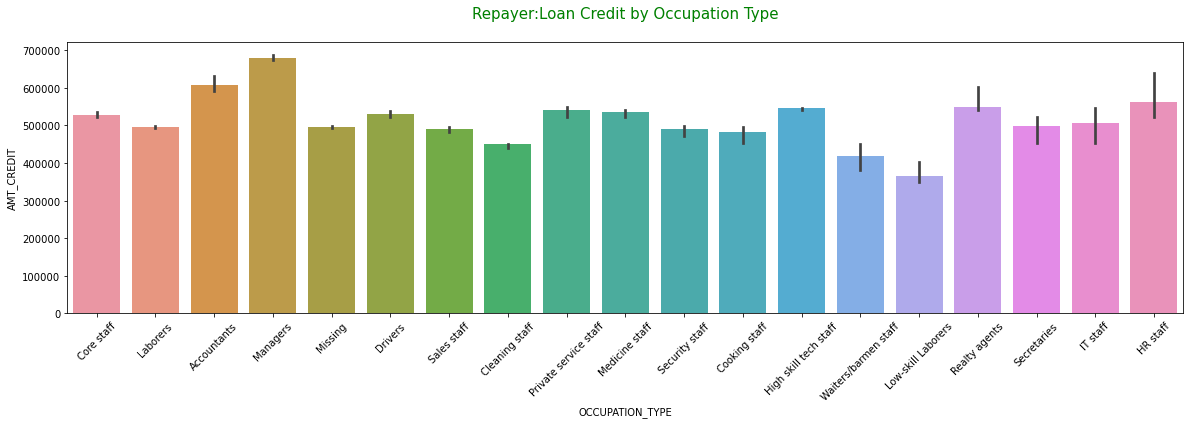

In [158]:
plt.figure(figsize=(20,5))

sns.barplot(data=rpy_df,x="OCCUPATION_TYPE",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Repayer:Loan Credit by Occupation Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation = 45)
plt.show()


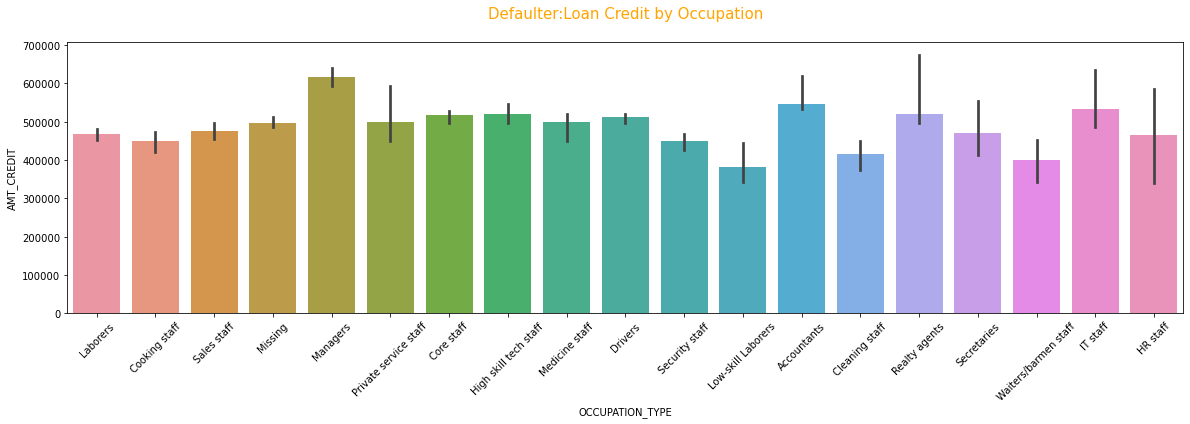

In [153]:
plt.figure(figsize=(20,5))
sns.barplot(data=def_df,x="OCCUPATION_TYPE",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Defaulter:Loan Credit by Occupation\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.xticks(rotation = 45)
plt.show()

###### Clients with accountat and manager role are eligible for more loan credit compare to low skilled laboreres and waiters in both target category

### Categorical vs Categorical Associations

###### NAME_CONTRACT_TYPE vs CODE_GENDER

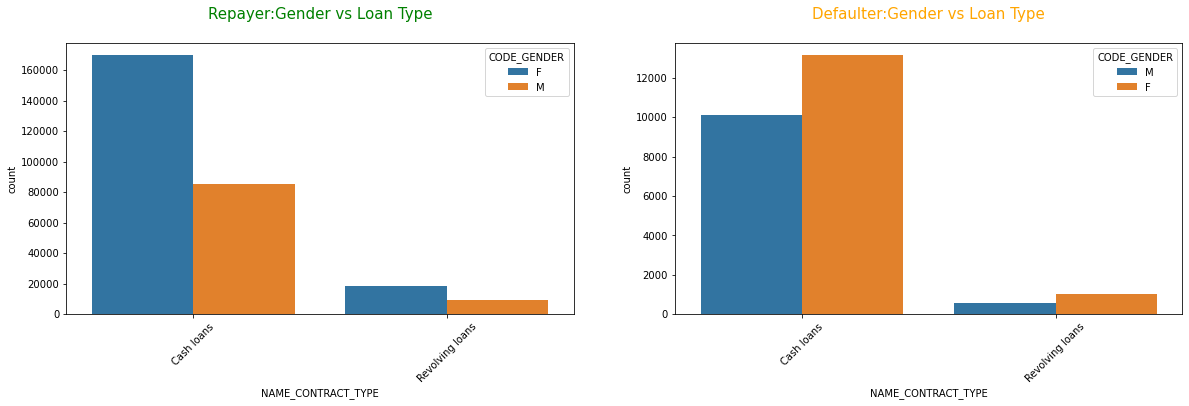

In [163]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=rpy_df,x="NAME_CONTRACT_TYPE",hue="CODE_GENDER")
plt.title(f"Repayer:Gender vs Loan Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(data=def_df,x="NAME_CONTRACT_TYPE",hue="CODE_GENDER")
plt.title(f"Defaulter:Gender vs Loan Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.xticks(rotation = 45)

plt.show()

###### lets derive categorical variable from AMT_INCOME_TOTAL

In [164]:
rpy_df.AMT_INCOME_TOTAL.describe()

count   282686.00000
mean    164306.35595
std      78172.61344
min      25650.00000
25%     112500.00000
50%     148500.00000
75%     202500.00000
max     551250.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [167]:
pd.cut(x=rpy_df.AMT_INCOME_TOTAL,bins=[25000,75000,225000,600000],labels=["Low","Medium","High"]).head()

1      High
2       Low
3    Medium
4    Medium
5    Medium
Name: AMT_INCOME_TOTAL, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [168]:
rpy_df.AMT_INCOME_TOTAL.head()

1   270000.00000
2    67500.00000
3   135000.00000
4   121500.00000
5    99000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [172]:
rpy_df["Income Group"] = pd.cut(x=rpy_df.AMT_INCOME_TOTAL,bins=[25000,75000,225000,600000],labels=["Low","Medium","High"])

In [170]:
def_df.AMT_INCOME_TOTAL.describe()

count    24825.00000
mean    157917.56701
std      72222.48255
min      25650.00000
25%     112500.00000
50%     135000.00000
75%     202500.00000
max     551250.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [171]:
pd.cut(x=def_df.AMT_INCOME_TOTAL,bins=[25000,75000,225000,600000],labels=["Low","Medium","High"]).head()

0     Medium
26    Medium
40    Medium
42    Medium
81    Medium
Name: AMT_INCOME_TOTAL, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [173]:
def_df.AMT_INCOME_TOTAL.head()

0    202500.00000
26   112500.00000
40   202500.00000
42   135000.00000
81    81000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [174]:
def_df["Income Group"] = pd.cut(x=def_df.AMT_INCOME_TOTAL,bins=[25000,75000,225000,600000],labels=["Low","Medium","High"])

###### Income Group vs CODE_GENDER

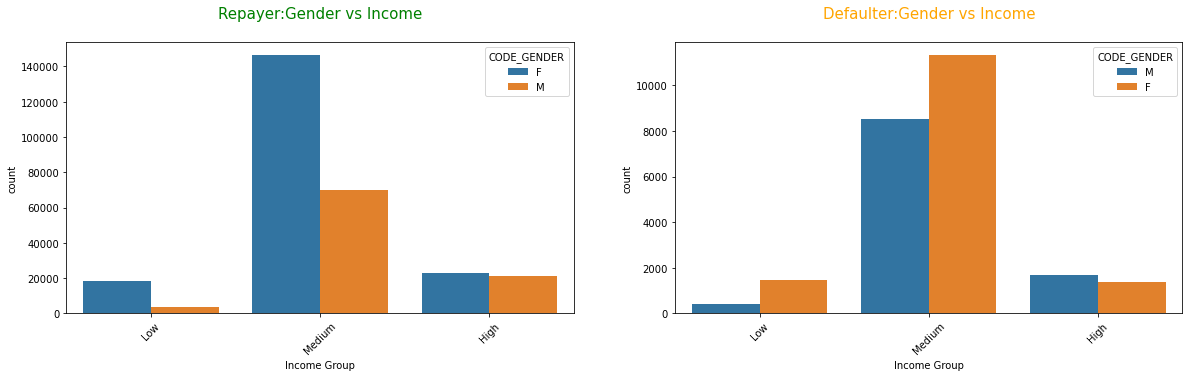

In [176]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=rpy_df,x="Income Group",hue="CODE_GENDER")
plt.title(f"Repayer:Gender vs Income\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(data=def_df,x="Income Group",hue="CODE_GENDER")
plt.title(f"Defaulter:Gender vs Income\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.xticks(rotation = 45)

plt.show()

###### lets derive categorical variable from AMT_CREDIT

In [177]:
rpy_df.AMT_CREDIT.describe()

count    282686.00000
mean     602648.28200
std      406845.90771
min       45000.00000
25%      270000.00000
50%      517788.00000
75%      810000.00000
max     4050000.00000
Name: AMT_CREDIT, dtype: float64

In [178]:
pd.cut(x=rpy_df.AMT_CREDIT,bins=[45000,100000,1000000,4100000],labels=["Small LOan","Medium Loan","Big Loan"]).head()

1       Big Loan
2    Medium Loan
3    Medium Loan
4    Medium Loan
5    Medium Loan
Name: AMT_CREDIT, dtype: category
Categories (3, object): ['Small LOan' < 'Medium Loan' < 'Big Loan']

In [179]:
rpy_df.AMT_CREDIT.head()

1   1293502.50000
2    135000.00000
3    312682.50000
4    513000.00000
5    490495.50000
Name: AMT_CREDIT, dtype: float64

In [180]:
rpy_df["LOAN_AMT_CATEGORY"] = pd.cut(x=rpy_df.AMT_CREDIT,bins=[45000,100000,1000000,4100000],labels=["Small Loan","Medium Loan","Big Loan"])

In [181]:
def_df.AMT_CREDIT.describe()

count     24825.00000
mean     557778.52767
std      346433.23565
min       45000.00000
25%      284400.00000
50%      497520.00000
75%      733315.50000
max     4027680.00000
Name: AMT_CREDIT, dtype: float64

In [182]:
pd.cut(x=def_df.AMT_CREDIT,bins=[45000,100000,1000000,4100000],labels=["Small Loan","Medium Loan","Big Loan"]).head()

0     Medium Loan
26    Medium Loan
40       Big Loan
42    Medium Loan
81    Medium Loan
Name: AMT_CREDIT, dtype: category
Categories (3, object): ['Small Loan' < 'Medium Loan' < 'Big Loan']

In [183]:
def_df.AMT_CREDIT.head()

0     406597.50000
26    979992.00000
40   1193580.00000
42    288873.00000
81    252000.00000
Name: AMT_CREDIT, dtype: float64

In [184]:
def_df["LOAN_AMT_CATEGORY"] = pd.cut(x=def_df.AMT_CREDIT,bins=[45000,100000,1000000,4100000],labels=["Small Loan","Medium Loan","Big Loan"])

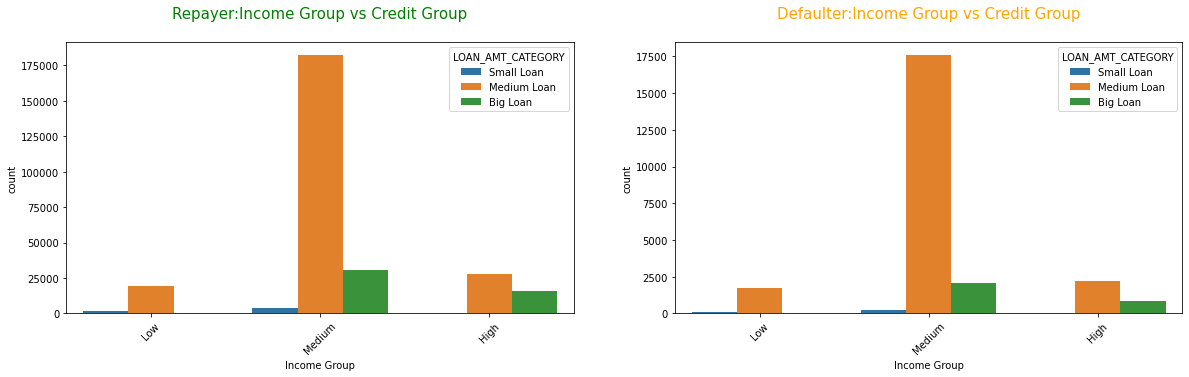

In [187]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=rpy_df,x="Income Group",hue="LOAN_AMT_CATEGORY")
plt.title(f"Repayer:Income Group vs Credit Group\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(data=def_df,x="Income Group",hue="LOAN_AMT_CATEGORY")
plt.title(f"Defaulter:Income Group vs Credit Group\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.xticks(rotation = 45)

plt.show()

###### big loan is not given to low income group clients and Count of medium range loan is high in medium income group only in both target category.  

# EDA on previous application data

In [274]:
# read previous application data
pre_app_df = pd.read_csv("previous_application.csv")
pre_app_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans   1730.43000      17145.00000   
1     2802425      108129         Cash loans  25188.61500     607500.00000   
2     2523466      122040         Cash loans  15060.73500     112500.00000   
3     2819243      176158         Cash loans  47041.33500     450000.00000   
4     1784265      202054         Cash loans  31924.39500     337500.00000   

    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.00000           0.00000      17145.00000                   SATURDAY   
1 679671.00000               NaN     607500.00000                   THURSDAY   
2 136444.50000               NaN     112500.00000                    TUESDAY   
3 470790.00000               NaN     450000.00000                     MONDAY   
4 404055.00000               NaN     337500.00000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1            0.00000                0.18283   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                   0.86734                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0     12.00000           middle  POS mobile with interest        365243.00000   
1     36.00000       low_action          Cash X-Sell: low        365243.00000   
2     12.00000             high         Cash X-Sell: high        365243.00000   
3     12.00000           middle       Cash X-Sell: middle        365243.00000   
4     24.00000             high         Cash Street: high                 NaN   

In [362]:
pre_app_df.shape

(1670214, 37)

In [363]:
pre_app_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Missing Value Handling

###### seems few colums having null values lets see the percentage

In [364]:
((pre_app_df.isnull().sum()/pre_app_df.shape[0]) * 100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED      99.64370
RATE_INTEREST_PRIMARY         99.64370
AMT_DOWN_PAYMENT              53.63648
RATE_DOWN_PAYMENT             53.63648
NAME_TYPE_SUITE               49.11975
NFLAG_INSURED_ON_APPROVAL     40.29813
DAYS_TERMINATION              40.29813
DAYS_LAST_DUE                 40.29813
DAYS_LAST_DUE_1ST_VERSION     40.29813
DAYS_FIRST_DUE                40.29813
DAYS_FIRST_DRAWING            40.29813
AMT_GOODS_PRICE               23.08177
AMT_ANNUITY                   22.28667
CNT_PAYMENT                   22.28637
PRODUCT_COMBINATION            0.02072
AMT_CREDIT                     0.00006
NAME_YIELD_GROUP               0.00000
NAME_PORTFOLIO                 0.00000
NAME_SELLER_INDUSTRY           0.00000
SELLERPLACE_AREA               0.00000
CHANNEL_TYPE                   0.00000
NAME_PRODUCT_TYPE              0.00000
SK_ID_PREV                     0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_CLIENT_TYPE               0.00000
CODE_REJECT_REASON       

#### lets drop missing value columns. 
it is statistically incorrect if we impute >25 - 30% missing data as this method develops reasonable guesses leads to bias statistical analysis becasue lack of natural variation.

In theory, Imputation method would work if missing value % is low.

lets drop the columns having >= 40% missing value

In [275]:
pre_null_perc = ((pre_app_df.isnull().sum()/pre_app_df.shape[0]) * 100).sort_values(ascending=False)

In [276]:
pre_drop_col = pre_null_perc[pre_null_perc >= 40].keys()

In [277]:
pre_drop_col

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')

In [278]:
pre_app_df1 = pre_app_df.drop(pre_drop_col,axis=1)

In [279]:
pre_app_df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans   1730.43000      17145.00000   
1     2802425      108129         Cash loans  25188.61500     607500.00000   
2     2523466      122040         Cash loans  15060.73500     112500.00000   
3     2819243      176158         Cash loans  47041.33500     450000.00000   
4     1784265      202054         Cash loans  31924.39500     337500.00000   

    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.00000      17145.00000                   SATURDAY   
1 679671.00000     607500.00000                   THURSDAY   
2 136444.50000     112500.00000                    TUESDAY   
3 470790.00000     450000.00000                     MONDAY   
4 404055.00000     337500.00000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0     12.00000           middle  POS mobile with interest  
1     36.00000       low_action          Cash X-Sell: low  
2     12.00000             high         Cash X-Sell: high  
3     12.00000           middle       Cash X-Sell: middle  
4     24.00000             high         Cash Street: high

In [280]:
pre_app_df1.shape

(1670214, 26)

In [281]:
((pre_app_df1.isnull().sum()/pre_app_df1.shape[0]) * 100).sort_values(ascending=False)

AMT_GOODS_PRICE               23.08177
AMT_ANNUITY                   22.28667
CNT_PAYMENT                   22.28637
PRODUCT_COMBINATION            0.02072
AMT_CREDIT                     0.00006
CODE_REJECT_REASON             0.00000
NAME_YIELD_GROUP               0.00000
NAME_SELLER_INDUSTRY           0.00000
SELLERPLACE_AREA               0.00000
CHANNEL_TYPE                   0.00000
NAME_PRODUCT_TYPE              0.00000
NAME_PORTFOLIO                 0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_CLIENT_TYPE               0.00000
SK_ID_PREV                     0.00000
NAME_PAYMENT_TYPE              0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_STATUS           0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
HOUR_APPR_PROCESS_START        0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
AMT_APPLICATION                0.00000
NAME_CONTRACT_TYPE             0.00000
DAYS_DECISION            

###### Missing value Imputation

In [282]:
pre_app_df1.AMT_GOODS_PRICE.isnull().sum()

385515

In [283]:
pre_app_df1.AMT_GOODS_PRICE.describe()

count   1284699.00000
mean     227847.27928
std      315396.55794
min           0.00000
25%       50841.00000
50%      112320.00000
75%      234000.00000
max     6905160.00000
Name: AMT_GOODS_PRICE, dtype: float64

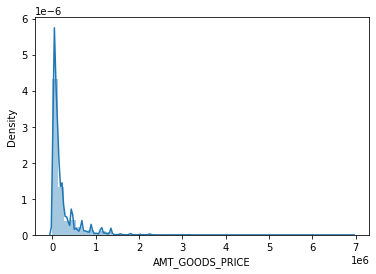

In [284]:
sns.distplot(pre_app_df1.AMT_GOODS_PRICE)
plt.show()

###### lets impute with median as distribution is not normal

In [285]:
pre_app_df1.AMT_GOODS_PRICE.fillna(pre_app_df1.AMT_GOODS_PRICE.median(),inplace=True)

In [286]:
pre_app_df1.AMT_GOODS_PRICE.isnull().sum()

0

In [287]:
pre_app_df1.AMT_ANNUITY.isnull().sum()

372235

In [288]:
pre_app_df1.AMT_ANNUITY.describe()

count   1297979.00000
mean      15955.12066
std       14782.13733
min           0.00000
25%        6321.78000
50%       11250.00000
75%       20658.42000
max      418058.14500
Name: AMT_ANNUITY, dtype: float64

###### lets impute with median as this variable has outliers

In [289]:
pre_app_df1.AMT_ANNUITY.fillna(pre_app_df1.AMT_ANNUITY.median(),inplace=True)

In [290]:
pre_app_df1.AMT_ANNUITY.isnull().sum()

0

In [291]:
pre_app_df1.CNT_PAYMENT.isnull().sum()

372230

In [292]:
pre_app_df1.CNT_PAYMENT.describe()

count   1297984.00000
mean         16.05408
std          14.56729
min           0.00000
25%           6.00000
50%          12.00000
75%          24.00000
max          84.00000
Name: CNT_PAYMENT, dtype: float64

###### lets impute with median as this variable has outliers

In [293]:
pre_app_df1.CNT_PAYMENT.fillna(pre_app_df1.CNT_PAYMENT.median(),inplace=True)

In [294]:
pre_app_df1.CNT_PAYMENT.isnull().sum()

0

In [295]:
pre_app_df1.AMT_CREDIT.isnull().sum()

1

In [296]:
pre_app_df1.AMT_CREDIT.describe()

count   1670213.00000
mean     196114.02122
std      318574.61655
min           0.00000
25%       24160.50000
50%       80541.00000
75%      216418.50000
max     6905160.00000
Name: AMT_CREDIT, dtype: float64

###### lets impute with median as this variable has outliers

In [297]:
pre_app_df1.AMT_CREDIT.fillna(pre_app_df1.AMT_CREDIT.median(),inplace=True)

In [298]:
pre_app_df1.AMT_CREDIT.isnull().sum()

0

In [299]:
pre_app_df1.PRODUCT_COMBINATION.isnull().sum()

346

In [300]:
pre_app_df1.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [301]:
pre_app_df1.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

###### lets impute missing value with mode since it is categorical variable

In [302]:
pre_app_df1.PRODUCT_COMBINATION.fillna("Cash",inplace=True)

In [303]:
pre_app_df1.PRODUCT_COMBINATION.value_counts()

Cash                              286336
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [304]:
((pre_app_df1.isnull().sum()/pre_app_df1.shape[0]) * 100).sort_values(ascending=False)

SK_ID_PREV                    0.00000
SK_ID_CURR                    0.00000
NAME_YIELD_GROUP              0.00000
CNT_PAYMENT                   0.00000
NAME_SELLER_INDUSTRY          0.00000
SELLERPLACE_AREA              0.00000
CHANNEL_TYPE                  0.00000
NAME_PRODUCT_TYPE             0.00000
NAME_PORTFOLIO                0.00000
NAME_GOODS_CATEGORY           0.00000
NAME_CLIENT_TYPE              0.00000
CODE_REJECT_REASON            0.00000
NAME_PAYMENT_TYPE             0.00000
DAYS_DECISION                 0.00000
NAME_CONTRACT_STATUS          0.00000
NAME_CASH_LOAN_PURPOSE        0.00000
NFLAG_LAST_APPL_IN_DAY        0.00000
FLAG_LAST_APPL_PER_CONTRACT   0.00000
HOUR_APPR_PROCESS_START       0.00000
WEEKDAY_APPR_PROCESS_START    0.00000
AMT_GOODS_PRICE               0.00000
AMT_CREDIT                    0.00000
AMT_APPLICATION               0.00000
AMT_ANNUITY                   0.00000
NAME_CONTRACT_TYPE            0.00000
PRODUCT_COMBINATION           0.00000
dtype: float

In [305]:
pre_app_df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans   1730.43000      17145.00000   
1     2802425      108129         Cash loans  25188.61500     607500.00000   
2     2523466      122040         Cash loans  15060.73500     112500.00000   
3     2819243      176158         Cash loans  47041.33500     450000.00000   
4     1784265      202054         Cash loans  31924.39500     337500.00000   

    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.00000      17145.00000                   SATURDAY   
1 679671.00000     607500.00000                   THURSDAY   
2 136444.50000     112500.00000                    TUESDAY   
3 470790.00000     450000.00000                     MONDAY   
4 404055.00000     337500.00000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0     12.00000           middle  POS mobile with interest  
1     36.00000       low_action          Cash X-Sell: low  
2     12.00000             high         Cash X-Sell: high  
3     12.00000           middle       Cash X-Sell: middle  
4     24.00000             high         Cash Street: high

## Outlier Detection and Handling - Sanity checks
once completed missing value handling tasks, the next step is to analyse outlier and if required to impute with approriate method and ensure that the data 'makes sense'.  
the data needs to be factually correct apart from being of the correct data type.

In [306]:
pre_cat_var = ["NAME_CONTRACT_TYPE","NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE"
               ,"NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_YIELD_GROUP"]
pre_num_var = ["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]

### Categorical Variables

In [307]:
for i in pre_cat_var:
    print(i,":",pre_app_df1[i].unique())

NAME_CONTRACT_TYPE : ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
NAME_CASH_LOAN_PURPOSE : ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
NAME_CONTRACT_STATUS : ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE : ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
NAME_CLIENT_TYPE : ['Repeater' 'New' 'Refreshed' 'XNA']
NAME_GOODS_CATEGORY : ['Mobile' 'XNA' 'Consumer Electronics' 'Construction Materials'
 'Auto Accessories' 'Photo / Cinema Equipment' 'Computers' 'Audio/Video'
 'Medicine' 'C

In [308]:
pre_app_df1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

###### lets impute missing value with mode since it is categorical variable

In [309]:
pre_app_df1.NAME_CONTRACT_TYPE.replace("XNA","Cash loans",inplace=True)

In [310]:
pre_app_df1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [867]:
pre_app_df1.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

###### lets impute missing value by assigning new values as mode cannot be used as the missing categories itself are mode

In [311]:
pre_app_df1.NAME_CASH_LOAN_PURPOSE.replace("XAP","Purpose1",inplace=True)

In [312]:
pre_app_df1.NAME_CASH_LOAN_PURPOSE.replace("XNA","Purpose2",inplace=True)

In [313]:
pre_app_df1.NAME_CASH_LOAN_PURPOSE.value_counts()

Purpose1                            922661
Purpose2                            677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [314]:
pre_app_df1.NAME_CLIENT_TYPE .value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

###### lets impute missing value with mode since it is categorical variable

In [315]:
pre_app_df1.NAME_CLIENT_TYPE.replace("XNA","Repeater",inplace=True)

In [316]:
pre_app_df1.NAME_CLIENT_TYPE .value_counts()

Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [317]:
pre_app_df1.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

###### lets impute missing value by assigning new values as mode cannot be used as the missing categories itself is mode

In [318]:
pre_app_df1.NAME_GOODS_CATEGORY.replace("XNA","No Disclosed",inplace=True)

In [319]:
pre_app_df1.NAME_GOODS_CATEGORY.value_counts()

No Disclosed                950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [320]:
pre_app_df1.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

###### lets impute missing value by assigning new values as mode cannot be used as the missing categories itself is mode

In [321]:
pre_app_df1.NAME_YIELD_GROUP.replace("XNA","No Disclosed",inplace=True)

In [322]:
pre_app_df1.NAME_YIELD_GROUP.value_counts()

No Disclosed    517215
middle          385532
high            353331
low_normal      322095
low_action       92041
Name: NAME_YIELD_GROUP, dtype: int64

### Numerical Variables

In [323]:
pre_num_var = ["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]

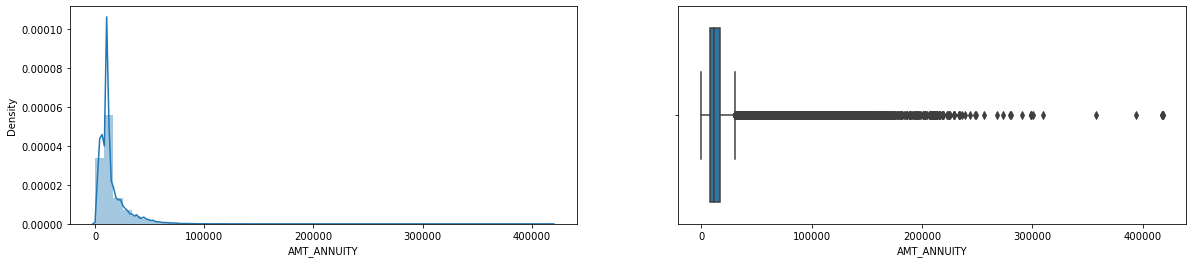

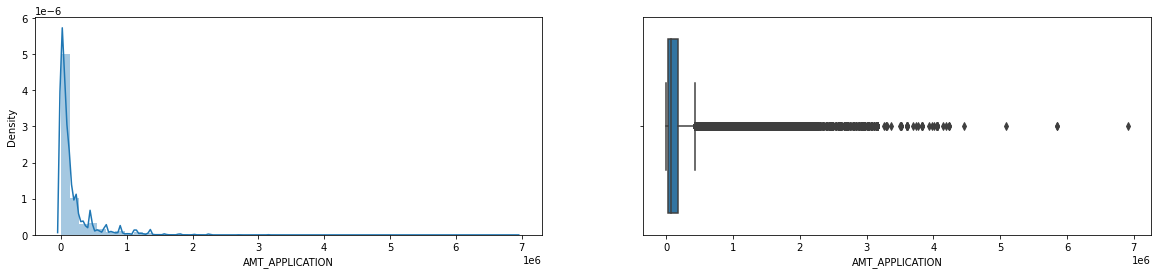

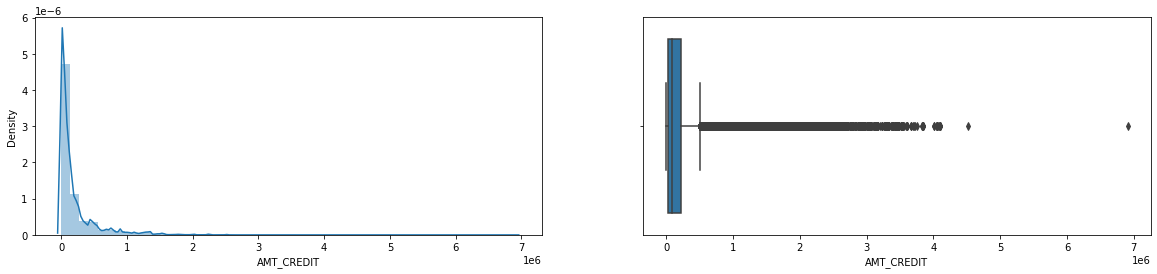

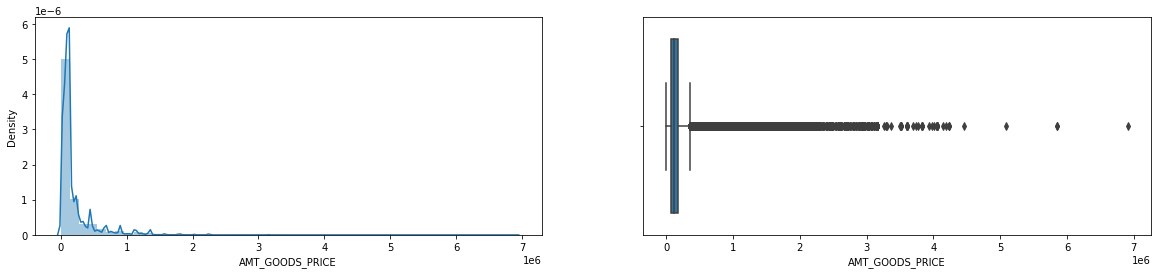

In [324]:
for i in pre_num_var:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.distplot(pre_app_df1[i])
    plt.subplot(1,2,2)
    sns.boxplot(pre_app_df1[i])
    plt.show()

***All above variables showing skewed distribution because of outliers.***

## Univariate Analysis

### Categorical Variables

#### NAME_CONTRACT_TYPE

In [325]:
pre_cat_var = ["NAME_CONTRACT_TYPE","NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE"
               ,"NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_YIELD_GROUP"]

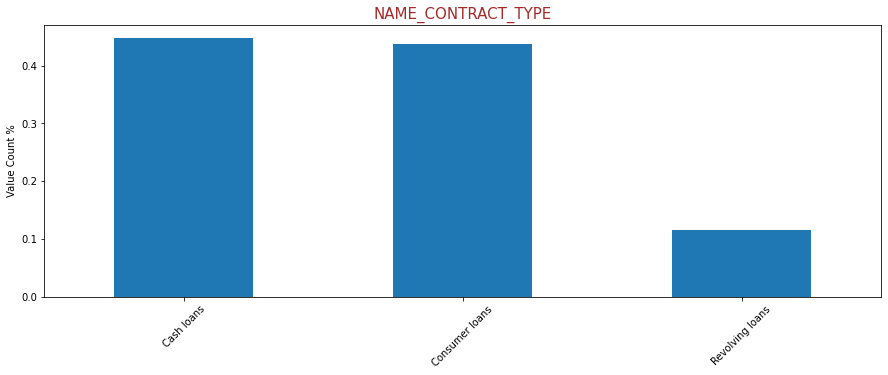

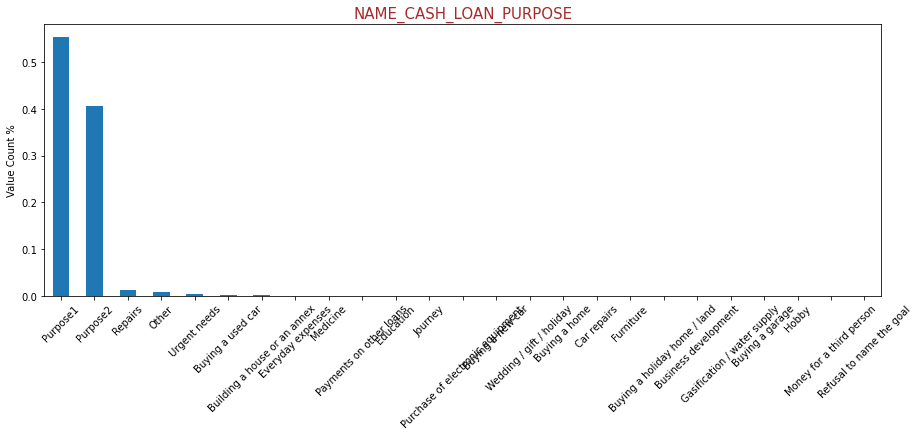

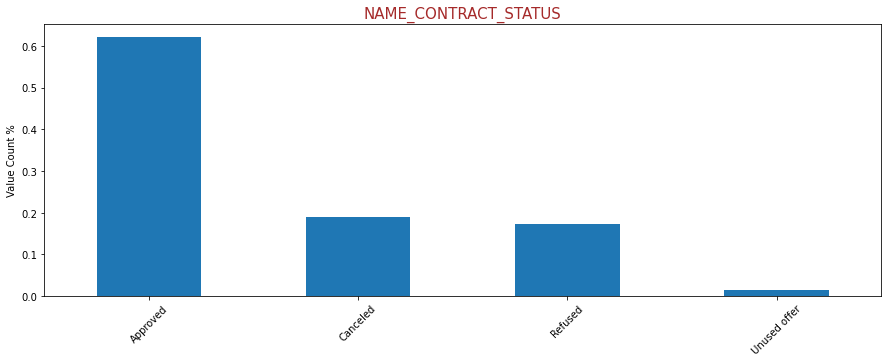

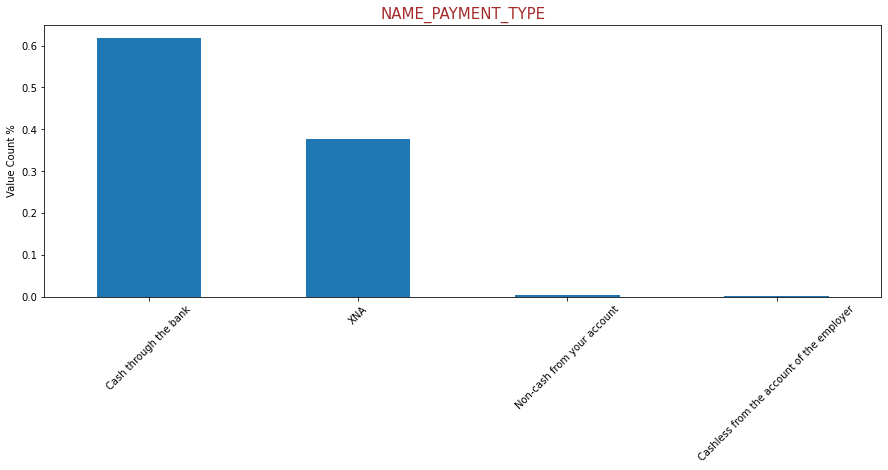

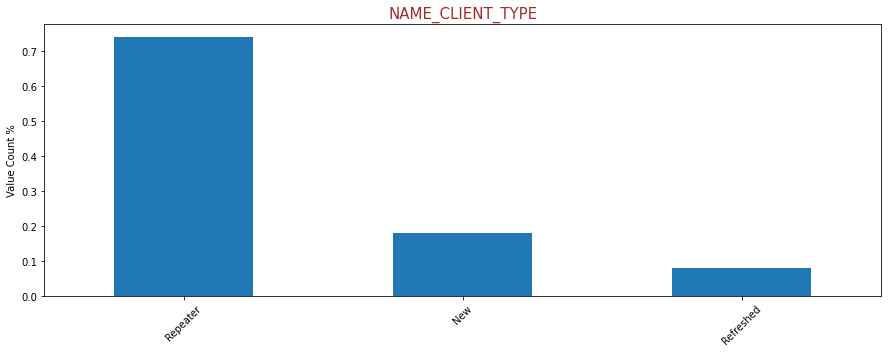

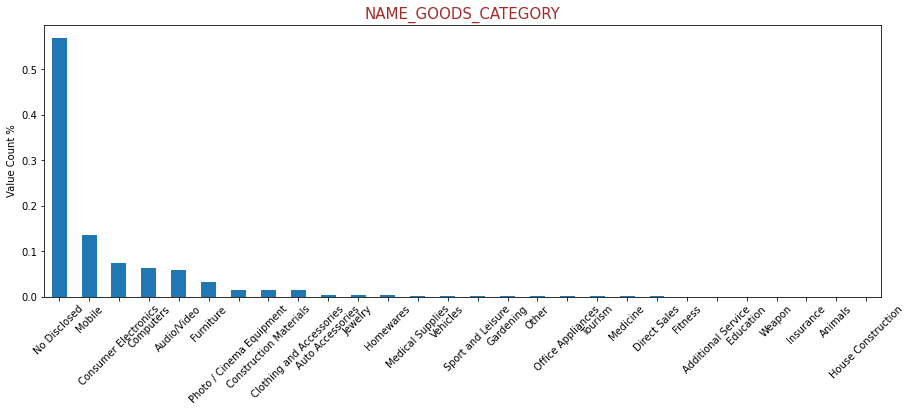

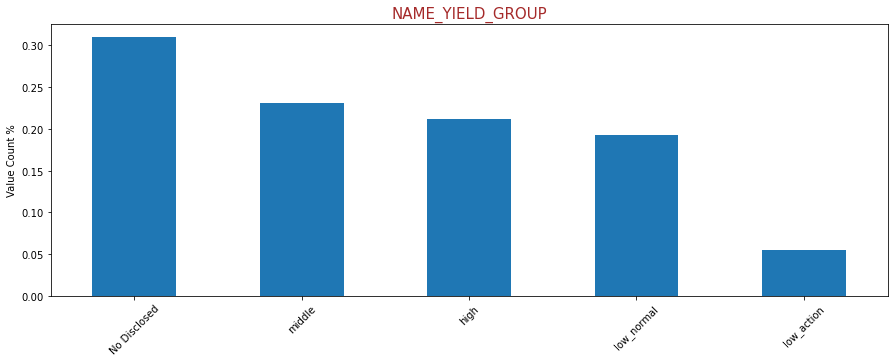

In [327]:
for i in pre_cat_var:
    plt.figure(figsize=(15,5))
    pre_app_df1[i].value_counts(normalize=True).plot.bar()
    plt.ylabel("Value Count %")
    plt.xticks(rotation = 45)
    plt.title(i,fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'brown'})
    plt.show()

***90 % of previous applicants grabbed Cash loans and consumer loans.***

***Unfortunatly 90% of applicants' cash loan purpose is missing from the data.***

***almost 60% of applicants got approval for the loan.  near 19% of applicants cancelled the loan application and nearly 18% of applicants loan rejected***

***almost 60 % of applicants choose repayment methos as cash through the bank, less than 1% applicants choose cash less payment method and that leads to default.  Here XNA (around 38%) is may be because of applicants who either canceled their application or their application got rejected***

***nearly 70% of applicants are old clients 18% of clients are new.***

***nearly 60% of the applicants did not disclose for what purchase he applied for loan. ~ 25% clents need loan for purchasing mobile, computers and consumer electronics***


### Numerical Variables

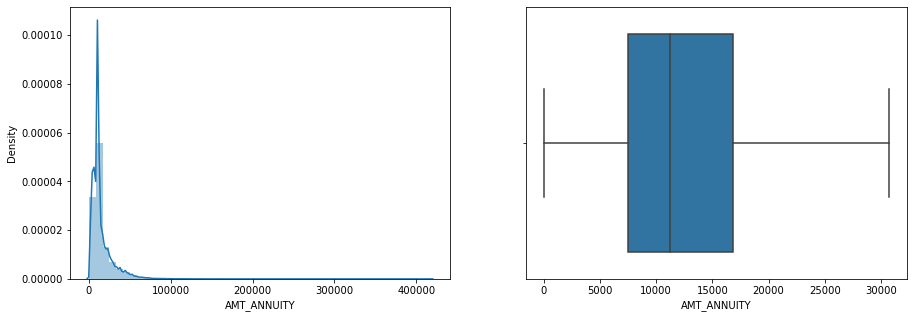

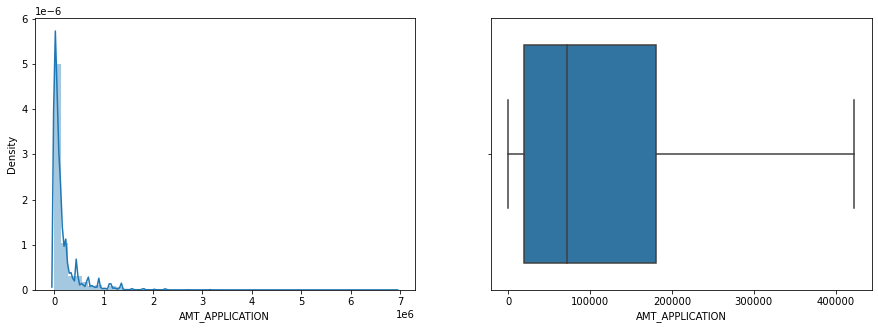

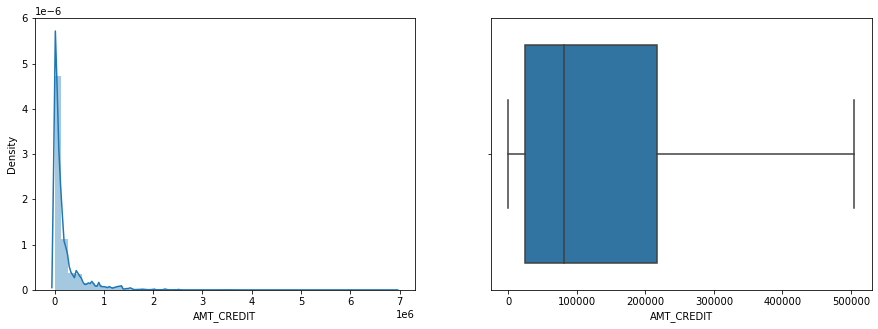

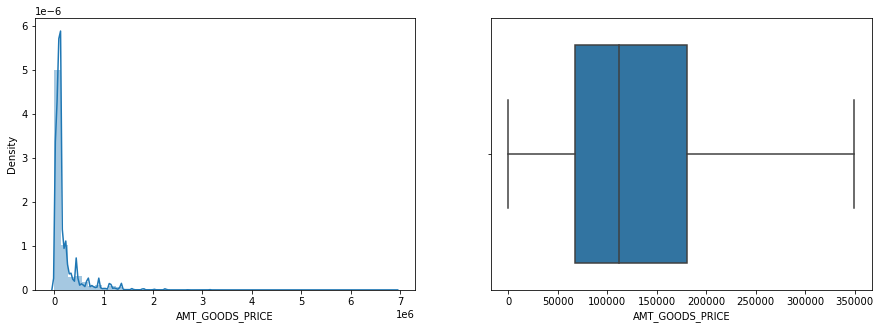

In [328]:
for i in pre_num_var:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(pre_app_df1[i])
    plt.subplot(1,2,2)
    sns.boxplot(pre_app_df1[i],showfliers = False)
    
    plt.show()

***All are above variables shows right skewed distribution.***

***excluding outliers, majority of applicants can repay the loan amount in 0 to 30k installments and 50% of clients lies between 7k to 18k loan annuity***

***excluding outliers, surprizingly, loan application amount is lower than loan credit amount.***

***excluding outliers, amount of goods for what loan is applied ranges from 0 to 350k.***

## Bivariate Analysis

### Numerical vs Numerical Variables

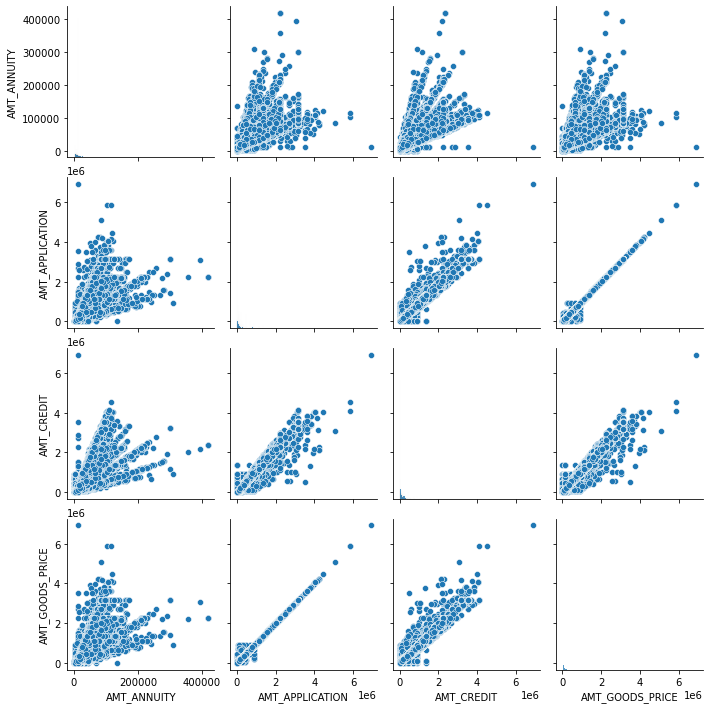

In [445]:
sns.pairplot(data=pre_app_df1,vars=pre_num_var)
plt.show()

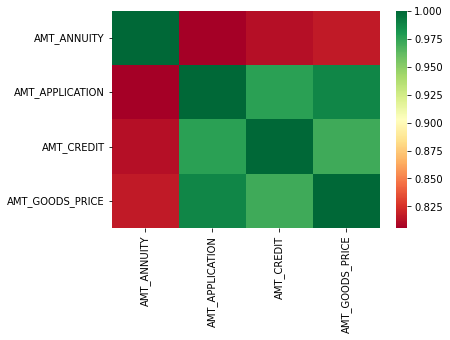

In [447]:
sns.heatmap(pre_app_df1[pre_num_var].corr(),cmap="RdYlGn")
plt.show()

###### all selected numerical variables have high correlation to each other.  loan application amount shows very strong correlation to amount of goods for what loan is applied for.***

### Categorical vs Numerical Variables

#### NAME_CONTRACT_STATUS vs AMT_APPLICATION

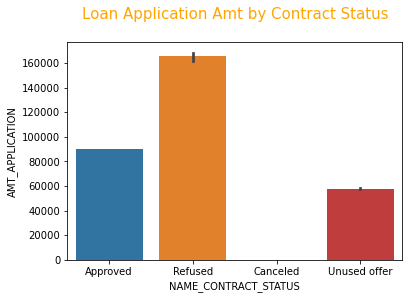

In [452]:
sns.barplot(data=pre_app_df1,x="NAME_CONTRACT_STATUS",y="AMT_APPLICATION",estimator=np.median)
plt.title(f"Loan Application Amt by Contract Status\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

#### NAME_CONTRACT_STATUS vs AMT_CREDIT

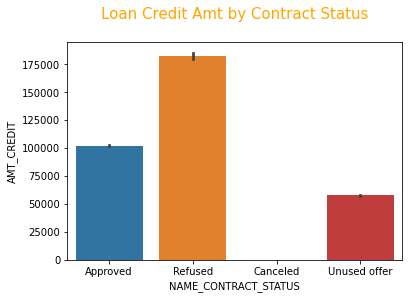

In [461]:
sns.barplot(data=pre_app_df1,x="NAME_CONTRACT_STATUS",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Loan Credit Amt by Contract Status\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

#### NAME_GOODS_CATEGORY vs AMT_GOODS_PRICE

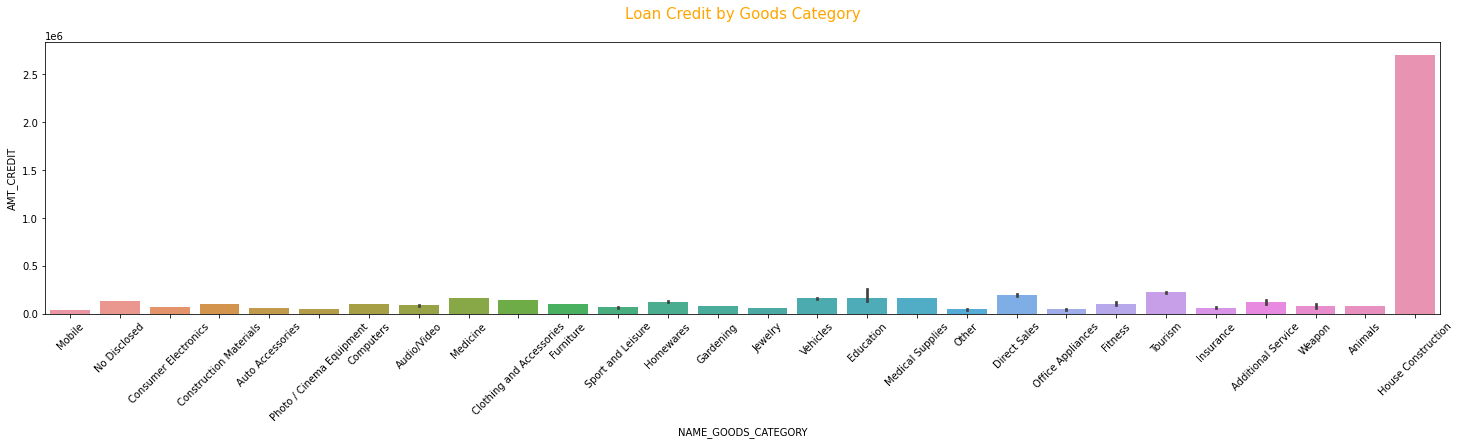

In [892]:
plt.figure(figsize=(25,5))
sns.barplot(data=pre_app_df1,x="NAME_GOODS_CATEGORY",y="AMT_CREDIT",estimator=np.median)
plt.title(f"Loan Credit by Goods Category\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.xticks(rotation = 45)
plt.show()

#### NAME_CONTRACT_TYPE vs AMT_CREDIT

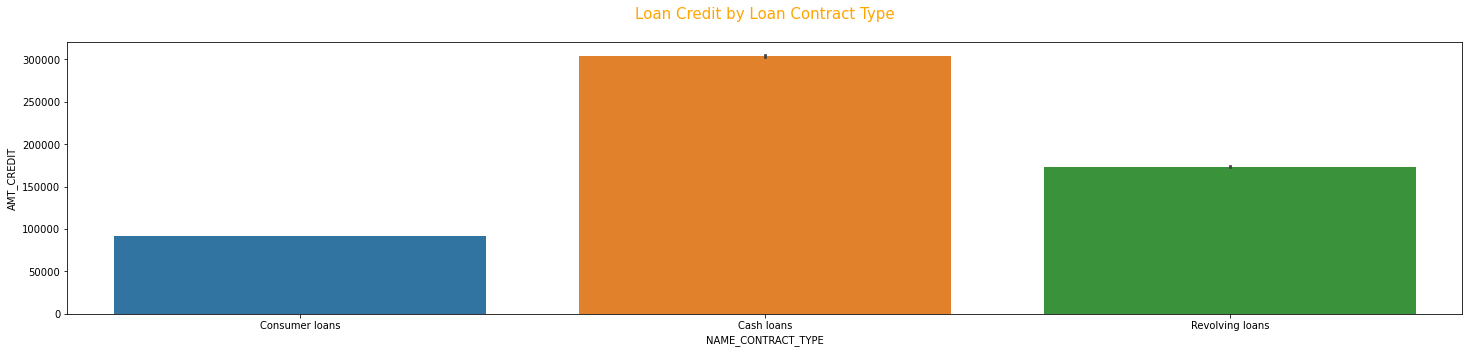

In [459]:
plt.figure(figsize=(10,5))
sns.barplot(data=pre_app_df1,x="NAME_CONTRACT_TYPE",y="AMT_CREDIT",estimator=np.mean)
plt.title(f"Loan Credit by Loan Contract Type\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'orange'})
plt.show()

###### ***high loan application amount and credit amount is mostly refused.***
###### ***house construction category shows highest mount of loan credit.***
###### ***cash loans has high mount of loan credit.***

### Categorical vs Categorical

#### NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE

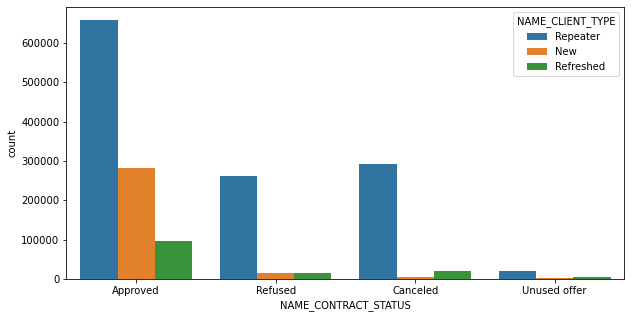

In [462]:
plt.figure(figsize=(10,5))
sns.countplot(data=pre_app_df1,x="NAME_CONTRACT_STATUS",hue="NAME_CLIENT_TYPE")
plt.show()

***loan repeater gets high chances of loan approval.***

## Merge application data frame and previous application dataframe

In [343]:
merged_rpy_df = pd.merge(left=rpy_df,right=pre_app_df1,on="SK_ID_CURR",how='inner',suffixes=("_RPY","_PRE"))

In [344]:
merged_def_df = pd.merge(left=def_df,right=pre_app_df1,on="SK_ID_CURR",how='inner',suffixes=("_DEF","_PRE"))

In [345]:
merged_rpy_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_RPY CODE_GENDER FLAG_OWN_CAR  \
0      100003       0             Cash loans           F            N   
1      100003       0             Cash loans           F            N   
2      100003       0             Cash loans           F            N   
3      100004       0        Revolving loans           M            Y   
4      100006       0             Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_RPY  \
0               N             0      270000.00000   1293502.50000   
1               N             0      270000.00000   1293502.50000   
2               N             0      270000.00000   1293502.50000   
3               Y             0       67500.00000    135000.00000   
4               Y             0      135000.00000    312682.50000   

   AMT_ANNUITY_RPY  AMT_GOODS_PRICE_RPY NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      35698.50000        1129500.00000          Family    State servant   
1      35698.50000        1129500.00000          Family    State servant   
2      35698.50000        1129500.00000          Family    State servant   
3       6750.00000         135000.00000   Unaccompanied          Working   
4      29686.50000         297000.00000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education               Married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0                     0.00354               1186              291           1   
1                     0.00354               1186              291           1   
2                     0.00354               1186              291           1   
3                     0.01003               4260             2531           1   
4                     0.00802               9833             2437           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                0                 1           1           0   
3               1                1                 1           1           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0      Core staff                2                     1   
1      Core staff                2                     1   
2      Core staff                2                     1   
3        Laborers                1                     2   
4        Laborers                2                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_RPY  \
0                            1                         MONDAY   
1                            1                         MONDAY   
2                            1                         MONDAY   
3                            2                         MONDAY   
4                            2                      WEDNESDAY   

   HOUR_APPR_PROCESS_START_RPY  REG_REGION_NOT_LIVE_REGION  \
0                           11                           0   
1                           11                           0   
2                           11                           0   
3                            9                           0   
4                           17                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1           

In [350]:
merged_rpy_df.shape

(1291341, 72)

In [346]:
merged_def_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_DEF CODE_GENDER FLAG_OWN_CAR  \
0      100002       1             Cash loans           M            N   
1      100047       1             Cash loans           M            N   
2      100047       1             Cash loans           M            N   
3      100047       1             Cash loans           M            N   
4      100047       1             Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_DEF  \
0               Y             0      202500.00000    406597.50000   
1               Y             0      202500.00000   1193580.00000   
2               Y             0      202500.00000   1193580.00000   
3               Y             0      202500.00000   1193580.00000   
4               Y             0      202500.00000   1193580.00000   

   AMT_ANNUITY_DEF  AMT_GOODS_PRICE_DEF NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0      24700.50000         351000.00000   Unaccompanied               Working   
1      35028.00000         855000.00000   Unaccompanied  Commercial associate   
2      35028.00000         855000.00000   Unaccompanied  Commercial associate   
3      35028.00000         855000.00000   Unaccompanied  Commercial associate   
4      35028.00000         855000.00000   Unaccompanied  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special               Married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0                     0.01880               3648             2120           1   
1                     0.02516               1182             1029           1   
2                     0.02516               1182             1029           1   
3                     0.02516               1182             1029           1   
4                     0.02516               1182             1029           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           0           0   
2               1                0                 1           0           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers                1                     2   
1        Laborers                2                     2   
2        Laborers                2                     2   
3        Laborers                2                     2   
4        Laborers                2                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_DEF  \
0                            2                      WEDNESDAY   
1                            2                        TUESDAY   
2                            2                        TUESDAY   
3                            2                        TUESDAY   
4                            2                        TUESDAY   

   HOUR_APPR_PROCESS_START_DEF  REG_REGION_NOT_LIVE_REGION  \
0                           10                           0   
1                            9                           0   
2                            9                           0   
3                            9                           0   
4                            9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0               

In [348]:
merged_def_df.shape

(122360, 72)

## Univariate Analysis

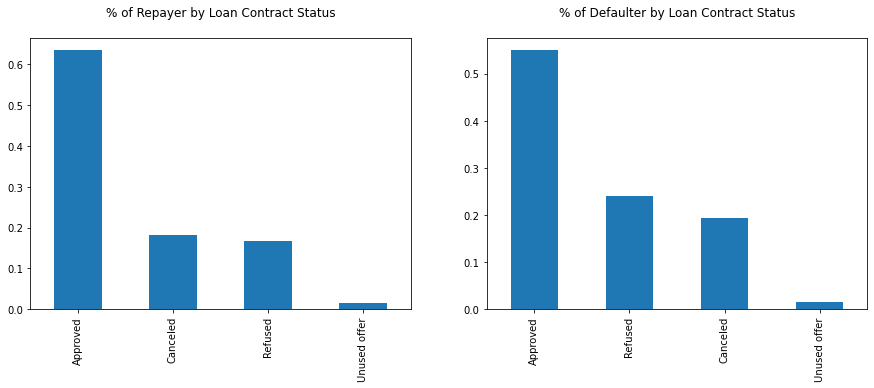

In [360]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
merged_rpy_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.title("% of Repayer by Loan Contract Status\n")
plt.subplot(1,2,2)
merged_def_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.title("% of Defaulter by Loan Contract Status\n")
plt.show()

***% of defaulters are high for previously refused applicants comparatively to others.***


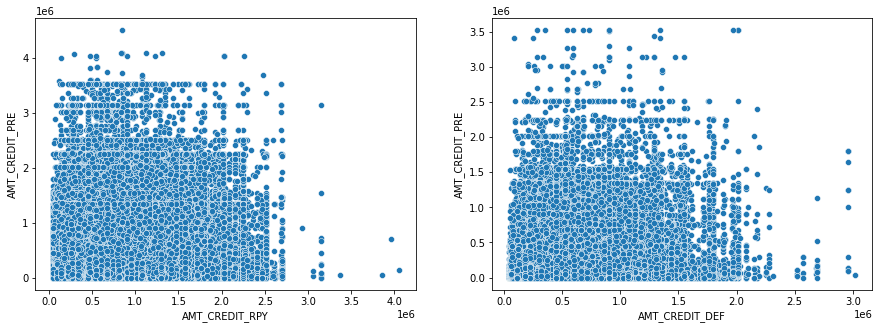

In [369]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=merged_rpy_df,x="AMT_CREDIT_RPY",y="AMT_CREDIT_PRE")
plt.subplot(1,2,2)
sns.scatterplot(data=merged_def_df,x="AMT_CREDIT_DEF",y="AMT_CREDIT_PRE")
plt.show()

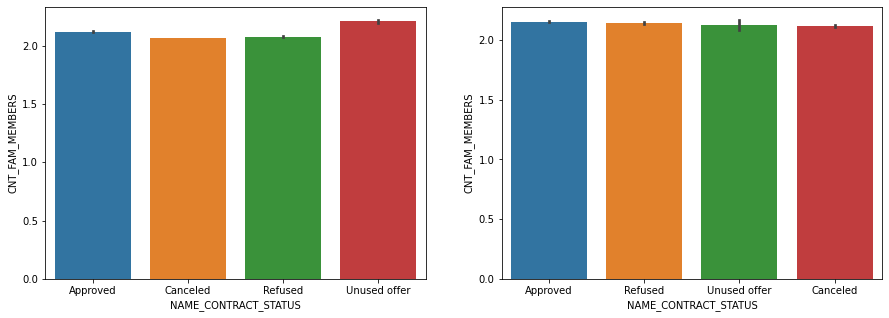

In [374]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=merged_rpy_df,x="NAME_CONTRACT_STATUS",y="CNT_FAM_MEMBERS")
plt.subplot(1,2,2)
sns.barplot(data=merged_def_df,x="NAME_CONTRACT_STATUS",y="CNT_FAM_MEMBERS")
plt.show()